In [ ]:
#Experiment Overview:
#Capsule Net as a function of memory parameter: Capsdim and their corresponding Robustness
#Low Memory Capsnet will not Overfit to NOISE, if will overfit to features. 

In [1]:
import torch
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'/home/gsoc0/Adversarial_CapsNet_Pytorch/')
from model.net import *
from utils.training import *
from data.data import *

In [9]:
base_path = '/home/gsoc0/Adversarial_CapsNet_Pytorch/'
model_path = os.path.join(base_path, "weights")

args = {
    'DATASET_NAME':'mnist',
    'num_classes':10,
    
    
    'USE_CUDA': True if torch.cuda.is_available() else False,
    'BATCH_SIZE': 256,
    'N_EPOCHS': 30,
    'LEARNING_RATE_1': 1e-4,
    'LEARNING_RATE_2': 1e-4,
    'WEIGHTDECAY':5e-6,
    
    #Scheduler
    'USE_SCHEDULER':True,
    'sched_milestones':[20,25,30,50],
    'sched_gamma':0.1,
    
    #Loss Function
    'LAMBDA_recon': 0.5,
    'LAMBDA_class': 1,
    
    #For Decoder'
    'num_features':180,
    'capsdim':18,
    'LReLU_negative_slope':0.1,
    'input_height':28,
    'input_width':28,
    'input_channel':1,
    'type':'CapsNet',
    
}

#Setting Default Cuda Device
torch.cuda.set_device(1)

In [3]:
# Config for 16 1d vectors in Capsule Layer. Set the Softmax Dimension to 1 in this case
class Config:
    def __init__(self, capsdim, dataset='mnist'):
        # CNN (cnn)
        self.cnn_in_channels = 1
        self.cnn_out_channels = 12
        self.cnn_kernel_size = 15

        # Primary Capsule (pc)
        self.pc_num_capsules = 1
        self.pc_in_channels = 12
        self.pc_out_channels = capsdim
        self.pc_kernel_size = 8
        self.pc_num_routes = 1 * 7 * 7

        # Digit Capsule 1 (dc)
        self.dc_num_capsules = 49
        self.dc_num_routes = 7 * 7 
        self.dc_in_channels = capsdim
        self.dc_out_channels = capsdim
        
        # Digit Capsule 2 (dc)
        self.dc_2_num_capsules = 10
        self.dc_2_num_routes = 7 * 7
        self.dc_2_in_channels = capsdim
        self.dc_2_out_channels = capsdim


torch.manual_seed(2)
config = Config(args['capsdim'])
net = CapsNet(args, config)    
if args['USE_CUDA']:
    net = net.cuda()
    

In [4]:
dataloader = {}
dataloader['train'], dataloader['val'] = dataset(args)

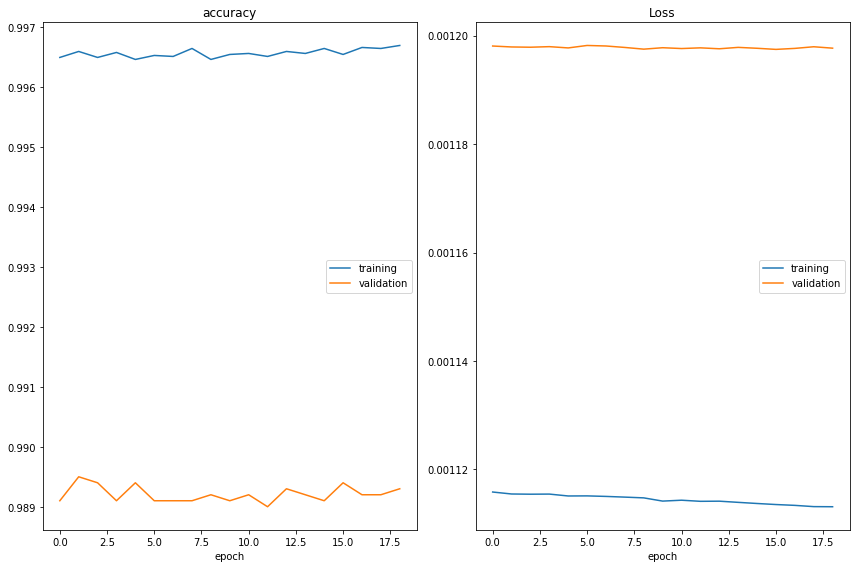

accuracy
	training         	 (min:    0.996, max:    0.997, cur:    0.997)
	validation       	 (min:    0.989, max:    0.990, cur:    0.989)
Loss
	training         	 (min:    0.001, max:    0.001, cur:    0.001)
	validation       	 (min:    0.001, max:    0.001, cur:    0.001)


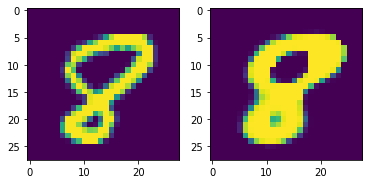





  0%|          | 0/235 [00:00<?, ?it/s]

Weights of Reconstruction Layer: tensor([6.6184e-09, 3.6495e-09, 6.1839e-09], device='cuda:1',
       grad_fn=<AsStridedBackward>)
Grads of Reconstruction Layer: tensor([1.1435e-13, 1.2142e-13, 6.5543e-14], device='cuda:1')






  0%|          | 1/235 [00:00<02:09,  1.80it/s]



  1%|          | 2/235 [00:01<02:01,  1.91it/s]



  1%|▏         | 3/235 [00:01<01:56,  1.99it/s]



  2%|▏         | 4/235 [00:01<01:52,  2.06it/s]



  2%|▏         | 5/235 [00:02<01:49,  2.11it/s]



  3%|▎         | 6/235 [00:02<01:46,  2.14it/s]



  3%|▎         | 7/235 [00:03<01:45,  2.17it/s]



  3%|▎         | 8/235 [00:03<01:43,  2.19it/s]



  4%|▍         | 9/235 [00:04<01:42,  2.20it/s]



  4%|▍         | 10/235 [00:04<01:42,  2.20it/s]



  5%|▍         | 11/235 [00:05<01:41,  2.21it/s]



  5%|▌         | 12/235 [00:05<01:40,  2.21it/s]



  6%|▌         | 13/235 [00:05<01:40,  2.21it/s]



  6%|▌         | 14/235 [00:06<01:39,  2.22it/s]



  6%|▋         | 15/235 [00:06<01:39,  2.22it/s]



  7%|▋         | 16/235 [00:07<01:38,  2.22it/s]



  7%|▋         | 17/235 [00:07<01:38,  2.22it/s]



  8%|▊         | 18/235 [00:08<01:37,  2.22it/s]



  8%|▊         | 19/235 [00:08<01:37,  2.21it/s]



  9%|▊         | 

 54%|█████▍    | 128/235 [00:57<00:48,  2.22it/s]



 55%|█████▍    | 129/235 [00:58<00:47,  2.22it/s]



 55%|█████▌    | 130/235 [00:58<00:47,  2.22it/s]



 56%|█████▌    | 131/235 [00:59<00:46,  2.21it/s]



 56%|█████▌    | 132/235 [00:59<00:46,  2.22it/s]



 57%|█████▋    | 133/235 [01:00<00:46,  2.22it/s]



 57%|█████▋    | 134/235 [01:00<00:45,  2.21it/s]



 57%|█████▋    | 135/235 [01:00<00:45,  2.21it/s]



 58%|█████▊    | 136/235 [01:01<00:44,  2.21it/s]



 58%|█████▊    | 137/235 [01:01<00:44,  2.21it/s]



 59%|█████▊    | 138/235 [01:02<00:43,  2.21it/s]



 59%|█████▉    | 139/235 [01:02<00:43,  2.21it/s]



 60%|█████▉    | 140/235 [01:03<00:42,  2.21it/s]



 60%|██████    | 141/235 [01:03<00:42,  2.22it/s]



 60%|██████    | 142/235 [01:04<00:41,  2.22it/s]



 61%|██████    | 143/235 [01:04<00:41,  2.21it/s]



 61%|██████▏   | 144/235 [01:04<00:41,  2.22it/s]



 62%|██████▏   | 145/235 [01:05<00:40,  2.22it/s]



 62%|██████▏   | 146/235 [01:05<00:40,  2.22it

In [ ]:
optimizer = torch.optim.Adam([
                {'params':net.decoder.parameters(), 'lr':args['LEARNING_RATE_2'], 'weight_decay':args['WEIGHTDECAY']},
                {'params': net.conv_layer.parameters()},
                {'params': net.primary_capsules.parameters()},
                {'params': net.digit_capsules_1.parameters()},
                {'params': net.digit_capsules_2.parameters()},
            ], lr=args['LEARNING_RATE_1'])

train_clean(net, optimizer, dataloader, args)

In [6]:
import matplotlib.pyplot as plt
from advertorch.attacks import LinfPGDAttack, GradientSignAttack, CarliniWagnerL2Attack, LinfBasicIterativeAttack

class Model_for_Adversary(nn.Module):
    def __init__(self, net):
        super(Model_for_Adversary, self).__init__()
        self.net = net
        
    def forward(self, x):
        output, recons, masked = self.net(x)
        classes = torch.sqrt((output ** 2).sum(2)).squeeze()
        return classes
    
def WhiteBox_Attacks_Targeted(net, dataloader, adversary_dict, args, theta):
    net.eval()
    n_batch = len(dataloader)
    for adversary in adversary_dict.keys():
        for batch_id, (data, labels) in enumerate(tqdm(dataloader)):
            target = torch.randint(0,10,size=(labels.size(0),), dtype=labels.dtype).cuda()
            if(args['USE_CUDA']):
                data, labels = data.cuda(), labels.cuda()
            adv_data = adversary_dict[adversary].perturb(data, target)
            with torch.no_grad():
                output, reconstructions, max_length_indices = net(adv_data)
                target_reconstructions = net.decoder.target_recon(output, target)
                label_reconstructions = net.decoder.target_recon(output, labels)
                unnormalized_data_adv = net.decoder.unnormalize(adv_data)
                unnormalized_data_clean = net.decoder.unnormalize(data)
                l2_distances = ((reconstructions.view(adv_data.size(0),-1)-unnormalized_data_adv.view(adv_data.size(0), -1))**2).sum(1).squeeze().detach()
                perturbations = unnormalized_data_adv - unnormalized_data_clean 
            for i in range(args['BATCH_SIZE']):
                clean_image = unnormalized_data_clean[i].reshape(28,28).detach().cpu().numpy()
                recon_image = reconstructions[i].reshape(28, 28).detach().cpu().numpy()
                target_recon_image = target_reconstructions[i].reshape(28, 28).detach().cpu().numpy()
                label_recon_image = label_reconstructions[i].reshape(28, 28).detach().cpu().numpy()
                adv_image = unnormalized_data_adv[i].reshape(28,28).detach().cpu().numpy()
                perturb_image = perturbations[i].reshape(28,28).detach().cpu().numpy()
                f, axarr = plt.subplots(1,6)
                f.set_size_inches(18.5, 10.5)
                axarr[0].imshow(clean_image)
                axarr[0].set_title('Clean_Image')
                axarr[1].imshow(perturb_image, vmin= 0.0, vmax= 0.3)
                axarr[1].set_title('Perturb')
                axarr[2].imshow(adv_image)
                axarr[2].set_title('Adv_Image')
                axarr[3].imshow(recon_image)
                axarr[3].set_title('MP_recon')
                axarr[4].imshow(target_recon_image)
                axarr[4].set_title('target_recon')
                axarr[5].imshow(label_recon_image)
                axarr[5].set_title('label_recon')
                plt.show()
                print("L2_distance:", l2_distances[i].item(),"Target: ", target[i].item() , "Model_fooled :", (target[i]==max_length_indices[i]).item(), ": d <= theta", (l2_distances[i]<=theta).item())
            break

def WhiteBox_Attacks_Untargeted(net, dataloader, adversary_dict, args, theta):
    net.eval()
    n_batch = len(dataloader)
    for adversary in adversary_dict.keys():
        print("THE ADVERSARY IS :", adversary)
        for batch_id, (data, labels) in enumerate(tqdm(dataloader)):
            if(args['USE_CUDA']):
                data, labels = data.cuda(), labels.cuda()
            adv_data = adversary_dict[adversary].perturb(data)
            with torch.no_grad():
                output, reconstructions, max_length_indices = net(adv_data)
                label_reconstructions = net.decoder.target_recon(output, labels)
                unnormalized_data_adv = net.decoder.unnormalize(adv_data)
                unnormalized_data_clean = net.decoder.unnormalize(data)
                l2_distances = ((reconstructions.view(adv_data.size(0),-1)-unnormalized_data_adv.view(adv_data.size(0), -1))**2).sum(1).squeeze().detach()
                perturbations = unnormalized_data_adv - unnormalized_data_clean 
            for i in range(args['BATCH_SIZE']):
                clean_image = unnormalized_data_clean[i].reshape(28,28).detach().cpu().numpy()
                recon_image = reconstructions[i].reshape(28, 28).detach().cpu().numpy()
                label_recon_image = label_reconstructions[i].reshape(28, 28).detach().cpu().numpy()
                adv_image = unnormalized_data_adv[i].reshape(28,28).detach().cpu().numpy()
                perturb_image = perturbations[i].reshape(28,28).detach().cpu().numpy()
                f, axarr = plt.subplots(1,5)
                f.set_size_inches(18.5, 10.5)
                axarr[0].imshow(clean_image)
                axarr[1].imshow(perturb_image, vmin= 0.0, vmax= 0.3)
                axarr[2].imshow(adv_image)
                axarr[3].imshow(recon_image)
                axarr[4].imshow(label_recon_image)
                axarr[4].set_title('Label_recon')
                plt.show()
                print("L2_distance:", l2_distances[i].item(), " Model_fooled :", (labels[i]!=max_length_indices[i]).item(), " d<=theta", (l2_distances[i]<=theta).item())
            break

In [7]:
from advertorch.attacks.base import Attack, LabelMixin
from advertorch.utils import clamp

class CleanAttack(Attack, LabelMixin):
    def __init__(self, clip_min=0., clip_max=1.):
        super(CleanAttack, self).__init__(None,None,clip_min, clip_max)

    def perturb(self, x, y=None):
#         xadv = x.requires_grad_()
#         xadv = clamp(xadv, self.clip_min, self.clip_max)
#         return xadv.detach()
        return x

  0%|          | 0/40 [00:00<?, ?it/s]

THE ADVERSARY IS : Clean


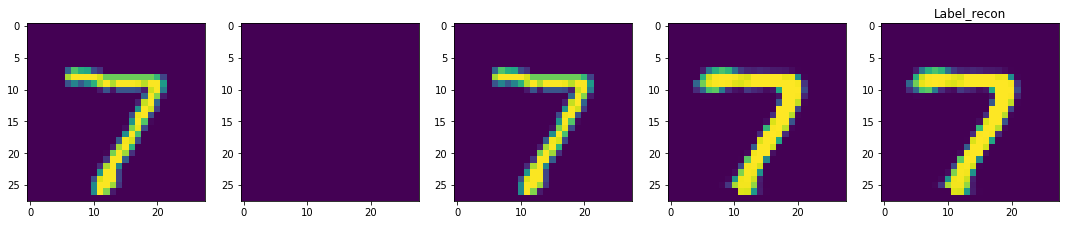

L2_distance: 11.555426597595215  Model_fooled : False  d<=theta True


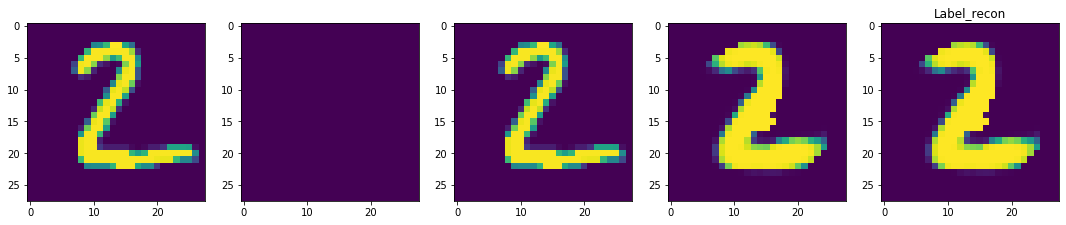

L2_distance: 47.868621826171875  Model_fooled : False  d<=theta False


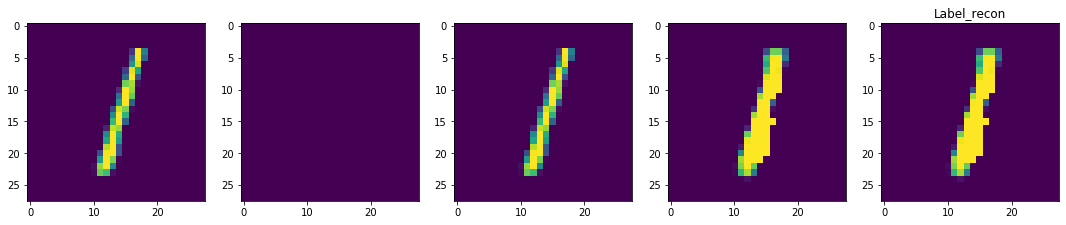

L2_distance: 15.949254035949707  Model_fooled : False  d<=theta True


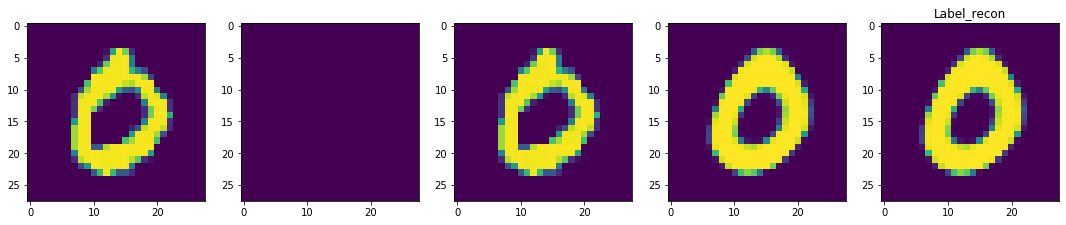

L2_distance: 19.65555191040039  Model_fooled : False  d<=theta True


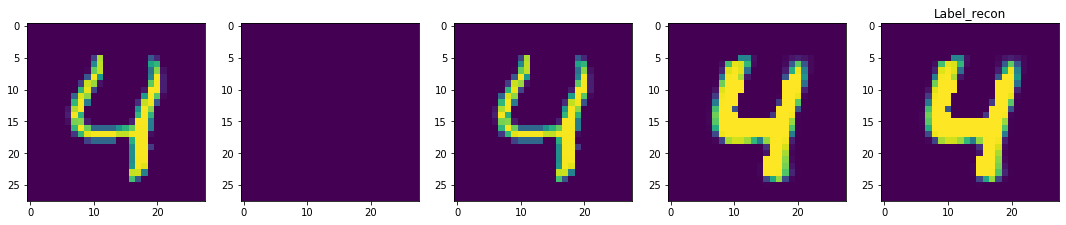

L2_distance: 34.156494140625  Model_fooled : False  d<=theta True


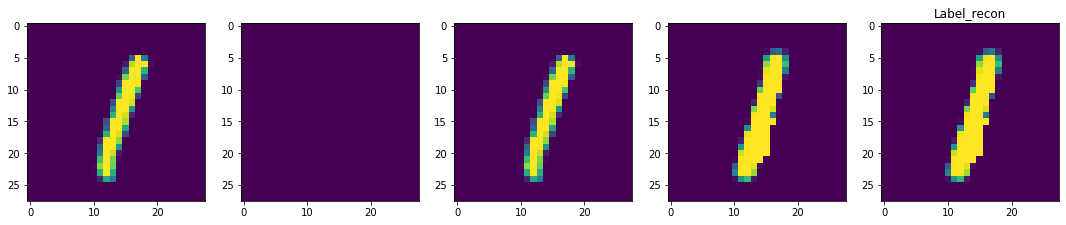

L2_distance: 11.367510795593262  Model_fooled : False  d<=theta True


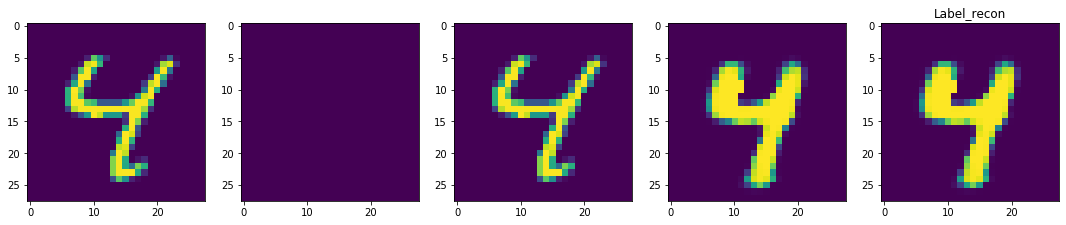

L2_distance: 41.178279876708984  Model_fooled : False  d<=theta True


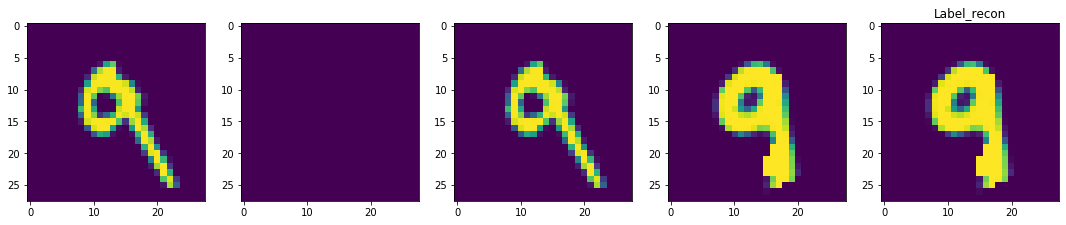

L2_distance: 52.58580017089844  Model_fooled : False  d<=theta False


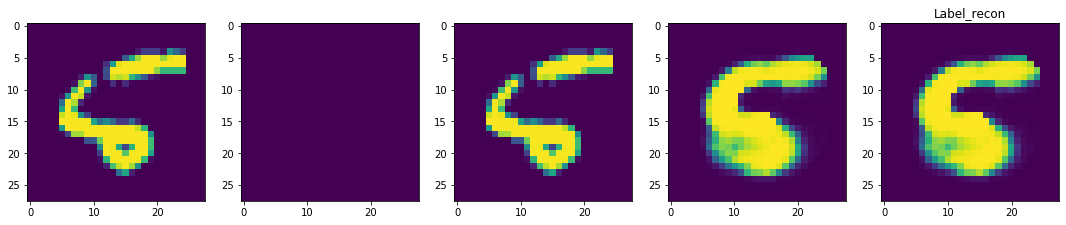

L2_distance: 64.85646057128906  Model_fooled : False  d<=theta False


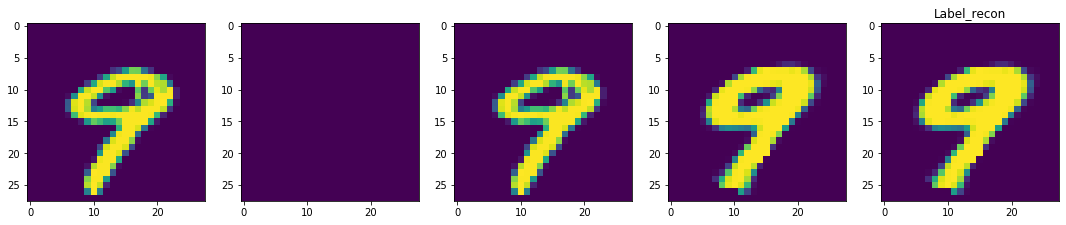

L2_distance: 22.79474449157715  Model_fooled : False  d<=theta True


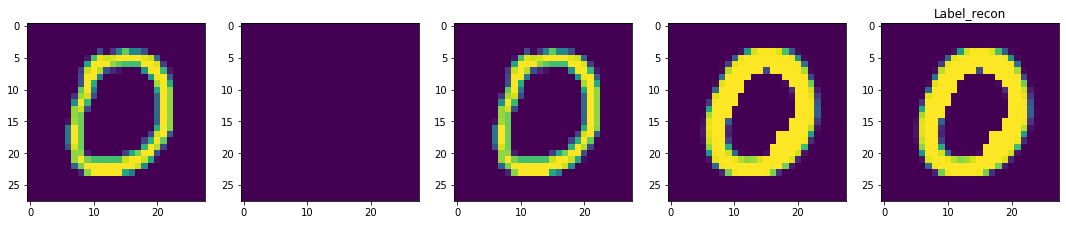

L2_distance: 37.287620544433594  Model_fooled : False  d<=theta True


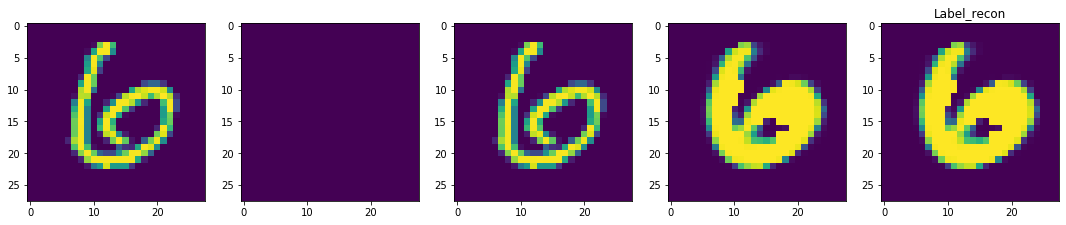

L2_distance: 67.03278350830078  Model_fooled : False  d<=theta False


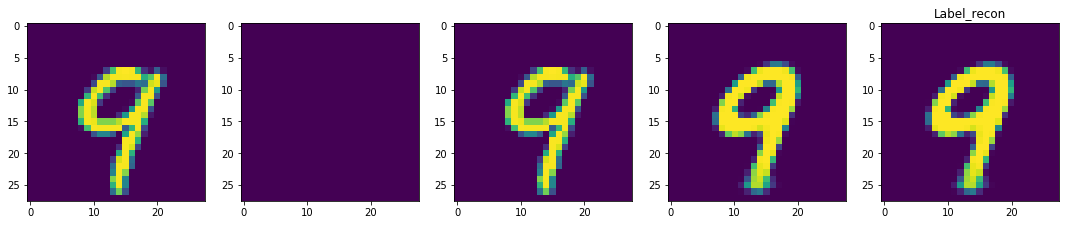

L2_distance: 12.362425804138184  Model_fooled : False  d<=theta True


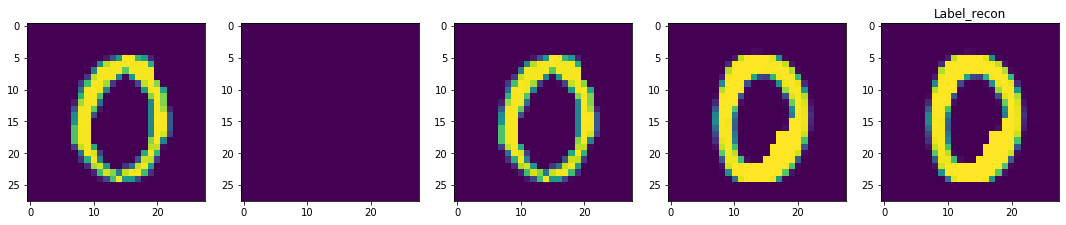

L2_distance: 31.346054077148438  Model_fooled : False  d<=theta True


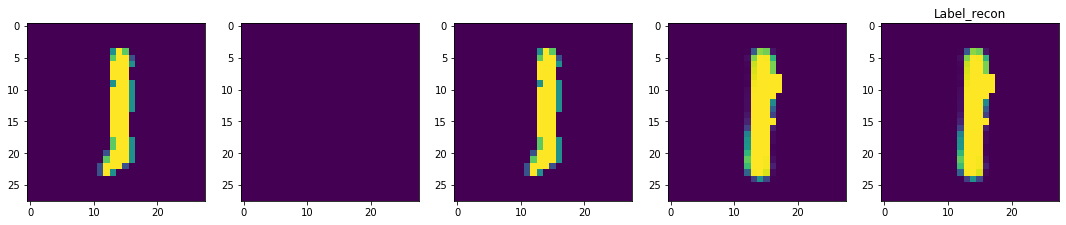

L2_distance: 12.769458770751953  Model_fooled : False  d<=theta True


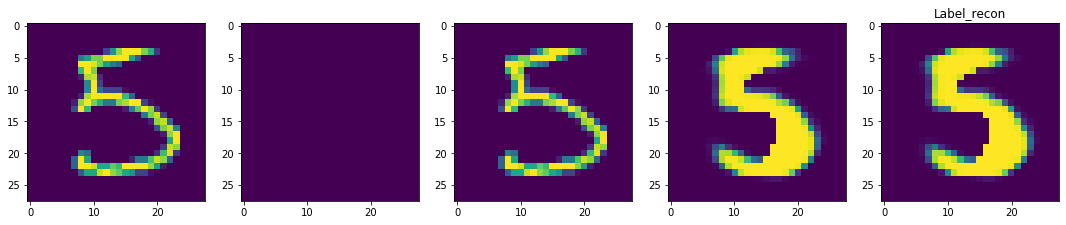

L2_distance: 68.74430847167969  Model_fooled : False  d<=theta False


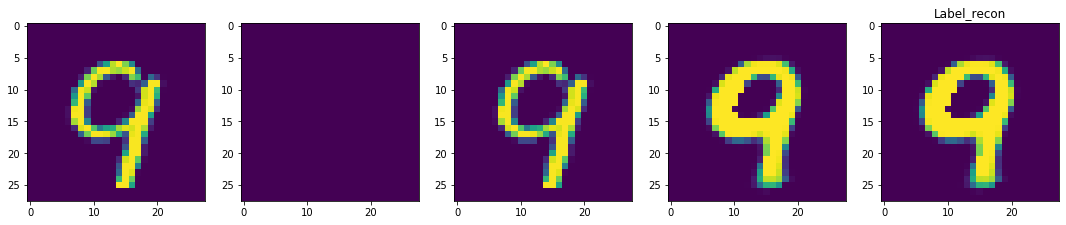

L2_distance: 30.599929809570312  Model_fooled : False  d<=theta True


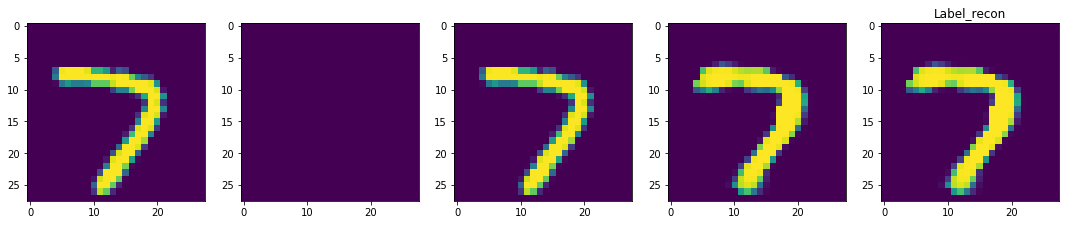

L2_distance: 10.979222297668457  Model_fooled : False  d<=theta True


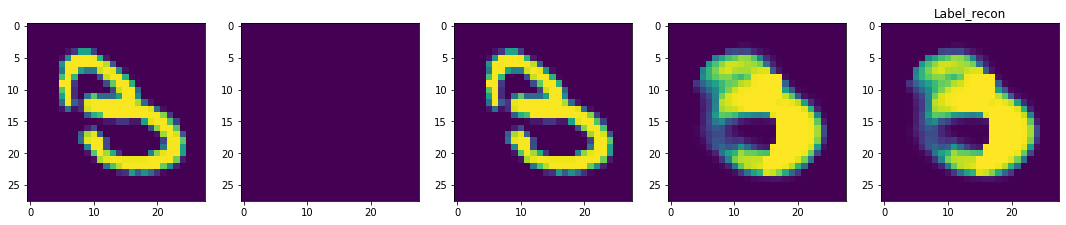

L2_distance: 71.86563110351562  Model_fooled : False  d<=theta False


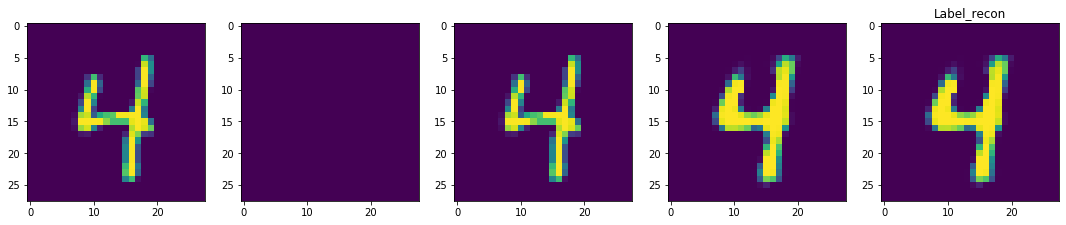

L2_distance: 14.382758140563965  Model_fooled : False  d<=theta True


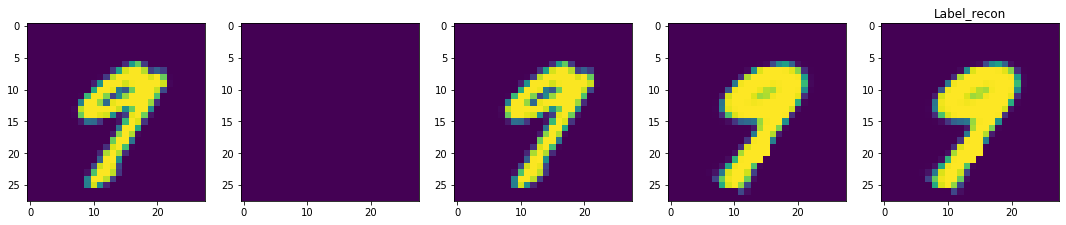

L2_distance: 17.864717483520508  Model_fooled : False  d<=theta True


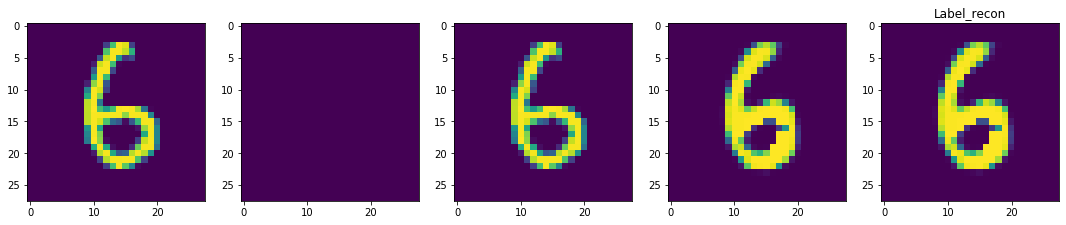

L2_distance: 15.598299980163574  Model_fooled : False  d<=theta True


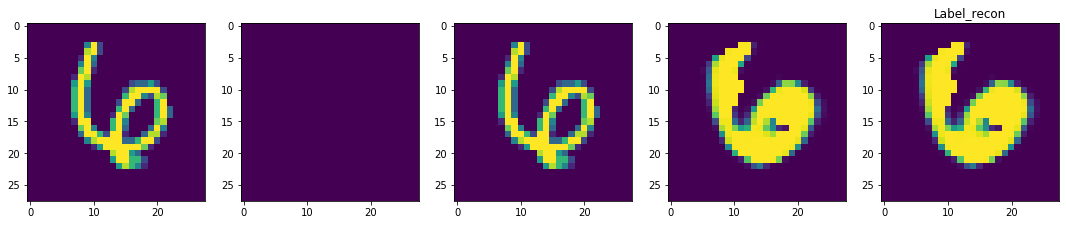

L2_distance: 58.80234909057617  Model_fooled : False  d<=theta False


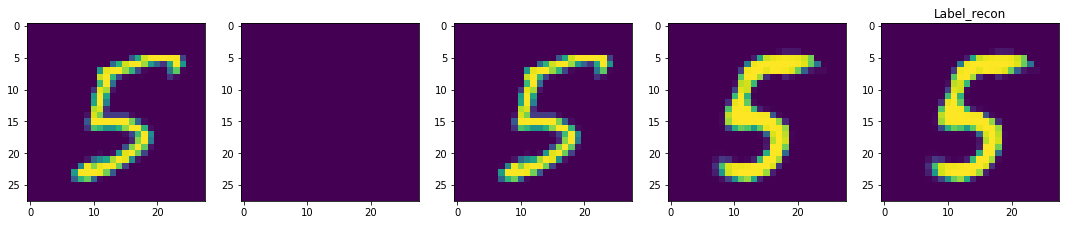

L2_distance: 28.22871208190918  Model_fooled : False  d<=theta True


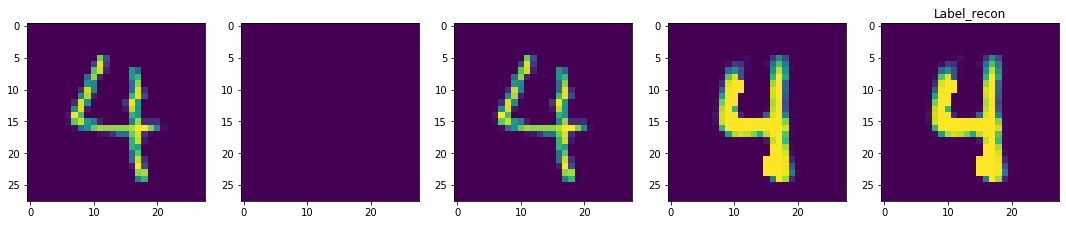

L2_distance: 38.09132385253906  Model_fooled : False  d<=theta True


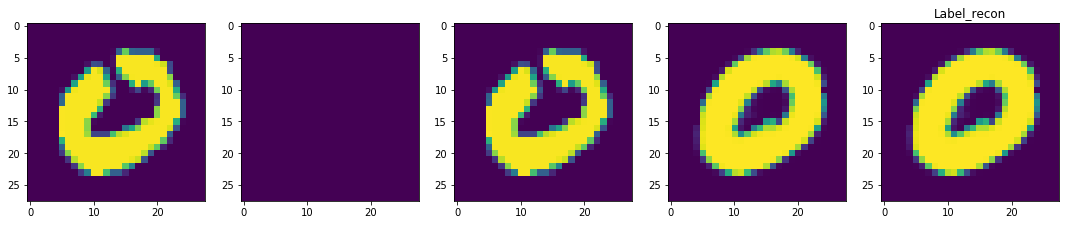

L2_distance: 28.16231918334961  Model_fooled : False  d<=theta True


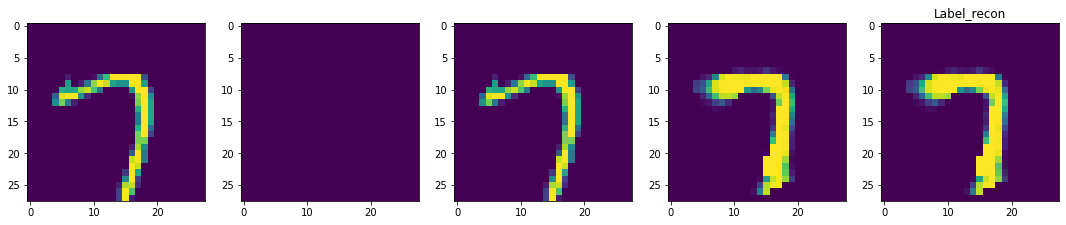

L2_distance: 24.510051727294922  Model_fooled : False  d<=theta True


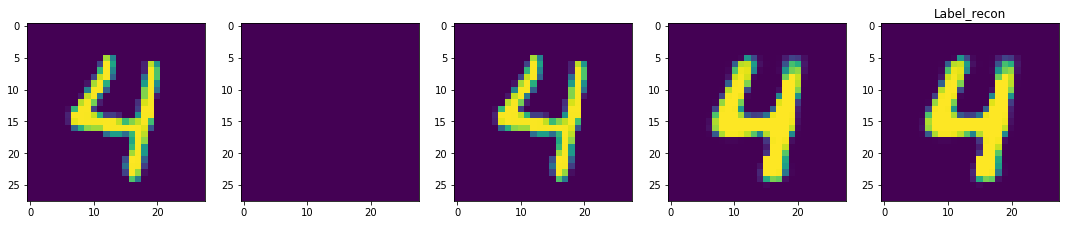

L2_distance: 17.99639320373535  Model_fooled : False  d<=theta True


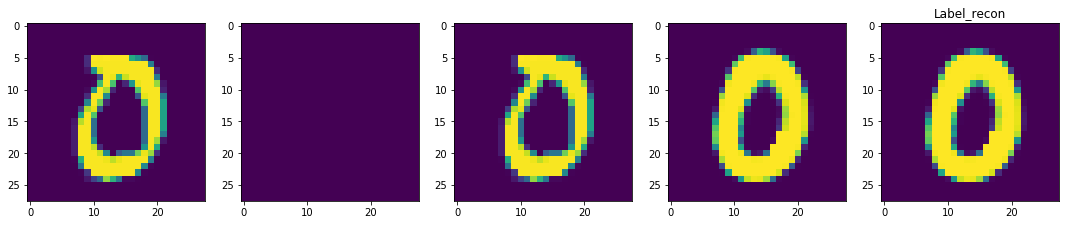

L2_distance: 31.242076873779297  Model_fooled : False  d<=theta True


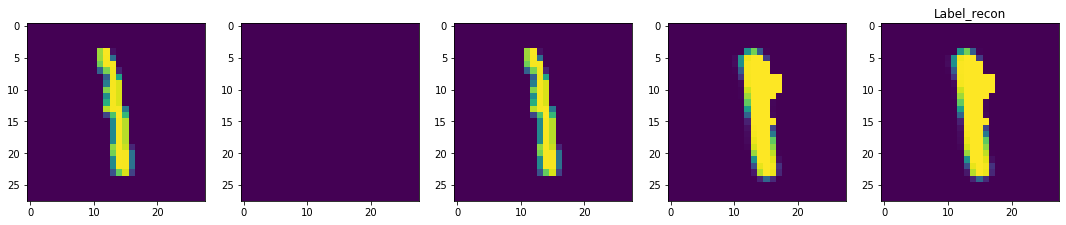

L2_distance: 26.21269416809082  Model_fooled : False  d<=theta True


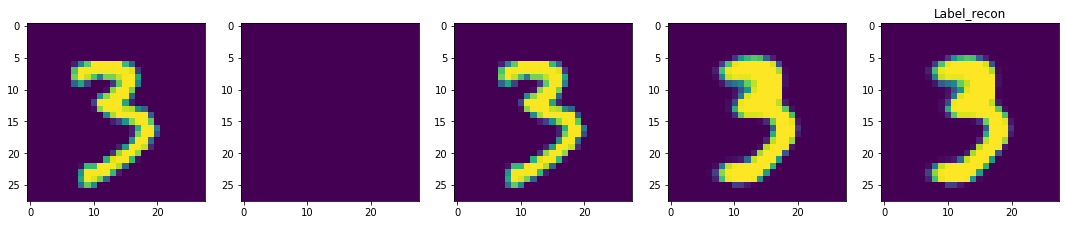

L2_distance: 20.83481216430664  Model_fooled : False  d<=theta True


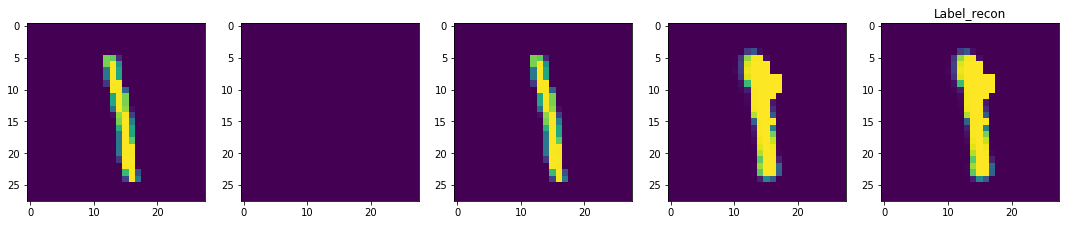


  0%|          | 0/40 [00:00<?, ?it/s]

L2_distance: 20.08330535888672  Model_fooled : False  d<=theta True
THE ADVERSARY IS : PGD


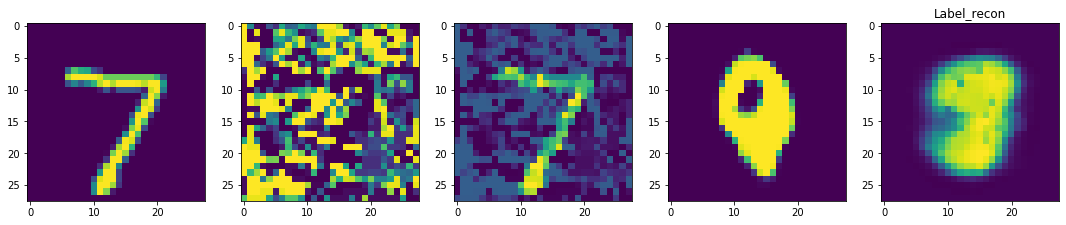

L2_distance: 114.17840576171875  Model_fooled : True  d<=theta False


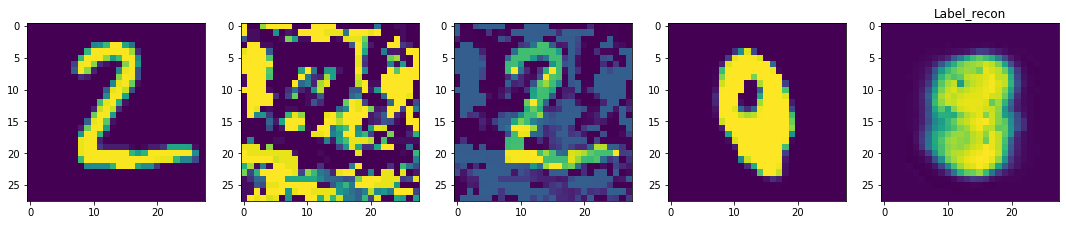

L2_distance: 124.96243286132812  Model_fooled : True  d<=theta False


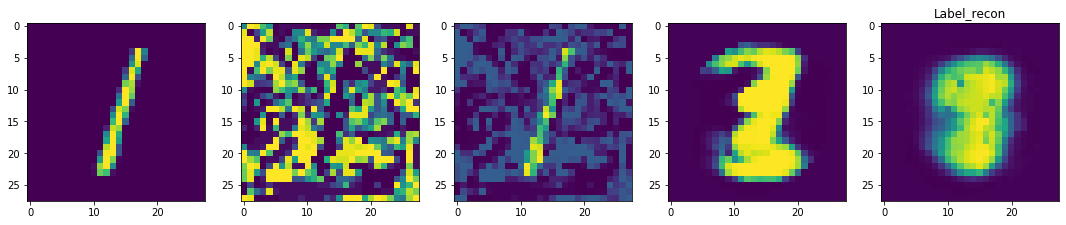

L2_distance: 101.98680114746094  Model_fooled : True  d<=theta False


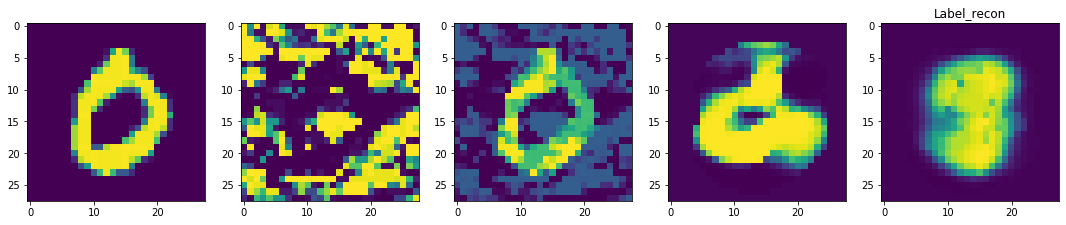

L2_distance: 101.8072738647461  Model_fooled : True  d<=theta False


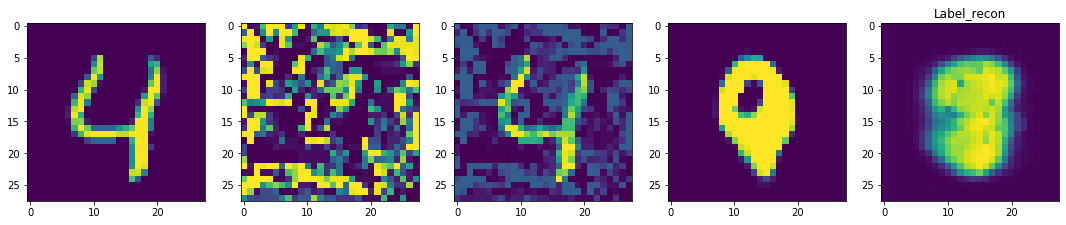

L2_distance: 100.00345611572266  Model_fooled : True  d<=theta False


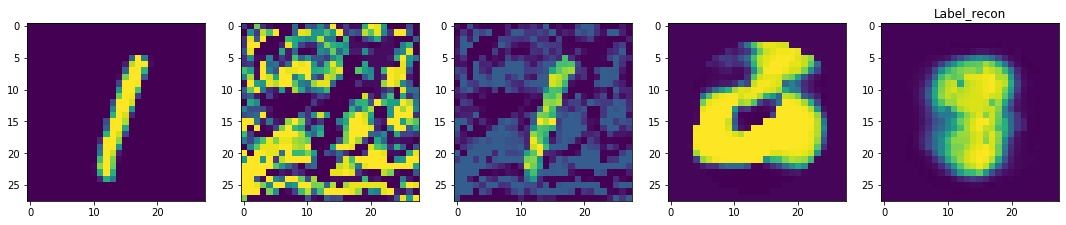

L2_distance: 157.6604461669922  Model_fooled : True  d<=theta False


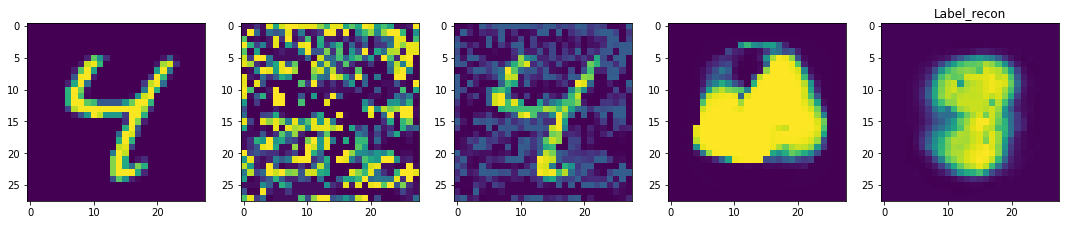

L2_distance: 161.23220825195312  Model_fooled : True  d<=theta False


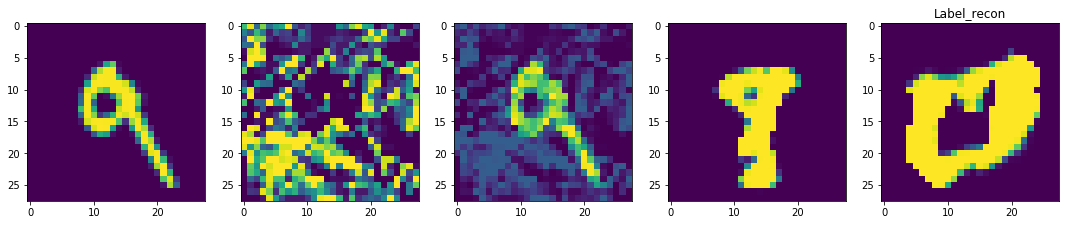

L2_distance: 97.8239974975586  Model_fooled : True  d<=theta False


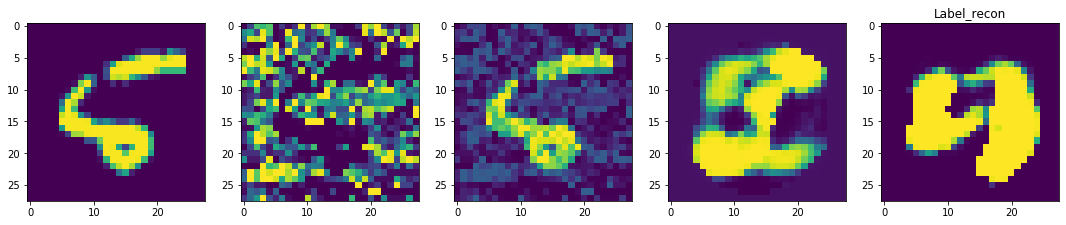

L2_distance: 129.40545654296875  Model_fooled : True  d<=theta False


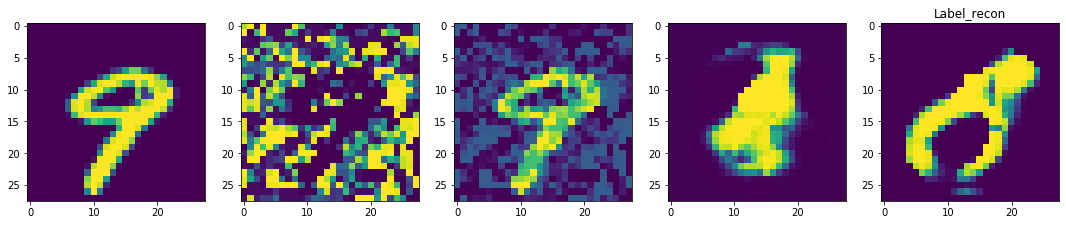

L2_distance: 100.431640625  Model_fooled : True  d<=theta False


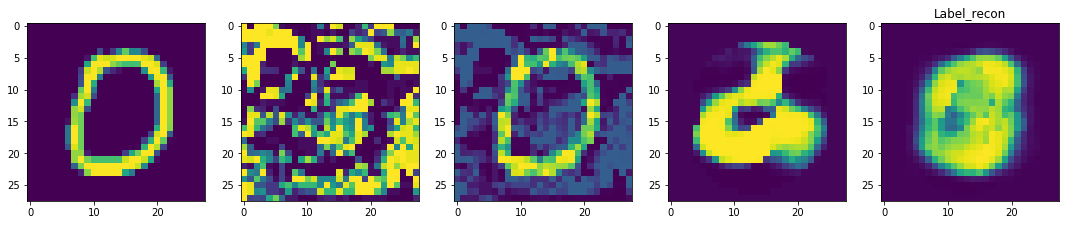

L2_distance: 139.168212890625  Model_fooled : True  d<=theta False


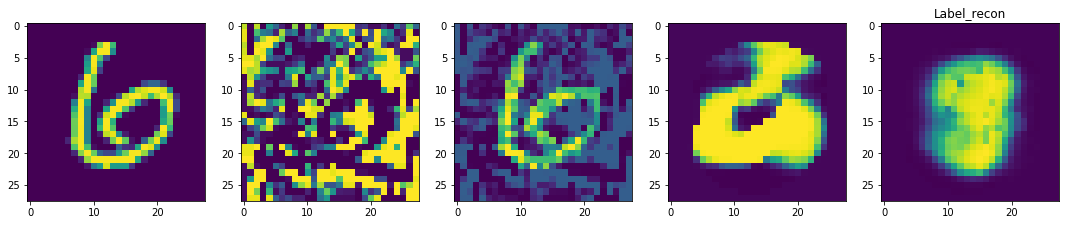

L2_distance: 146.9554443359375  Model_fooled : True  d<=theta False


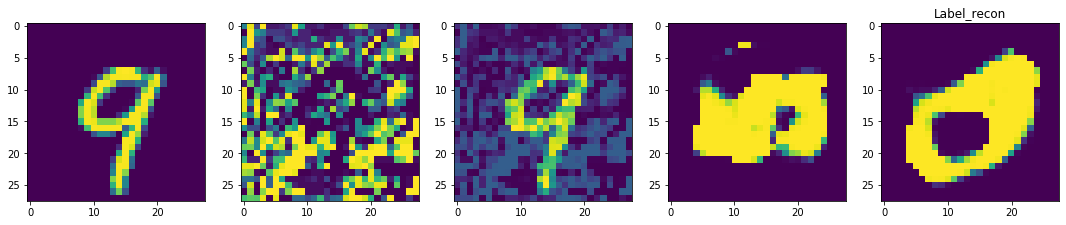

L2_distance: 152.17193603515625  Model_fooled : True  d<=theta False


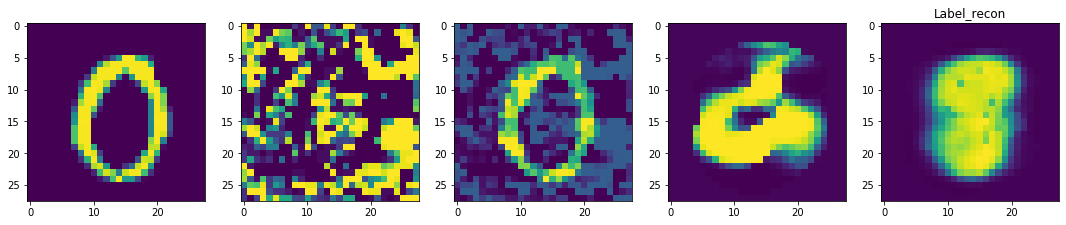

L2_distance: 122.36700439453125  Model_fooled : True  d<=theta False


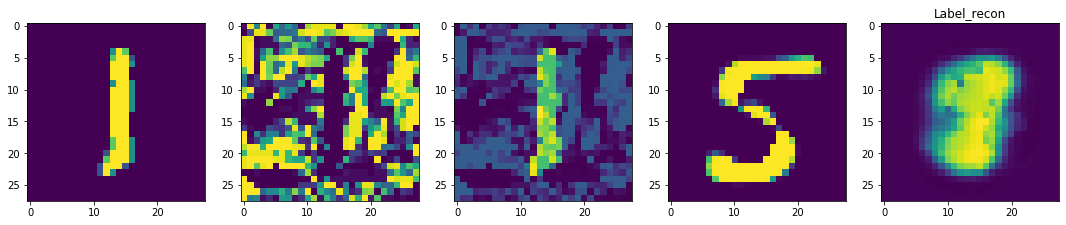

L2_distance: 116.59774017333984  Model_fooled : True  d<=theta False


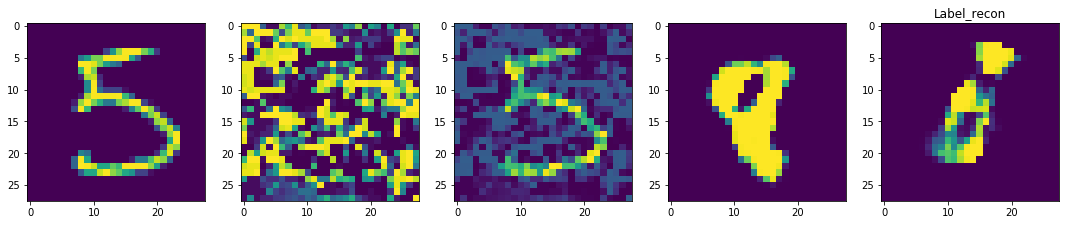

L2_distance: 127.021484375  Model_fooled : True  d<=theta False


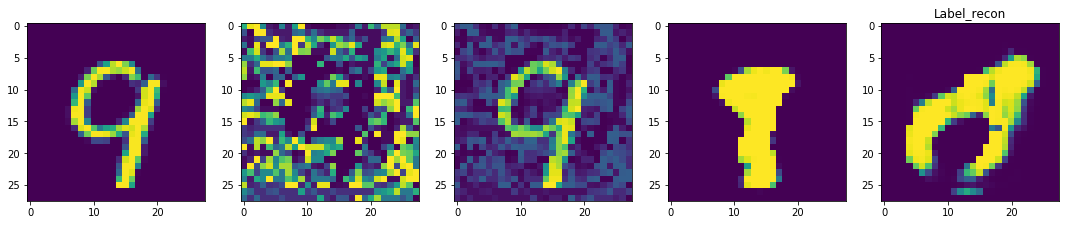

L2_distance: 113.89704895019531  Model_fooled : True  d<=theta False


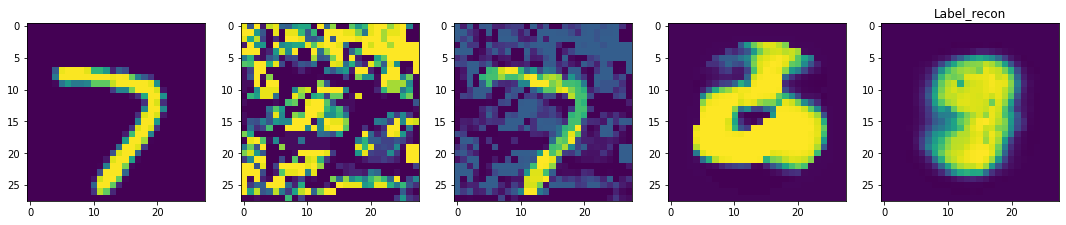

L2_distance: 180.92764282226562  Model_fooled : True  d<=theta False


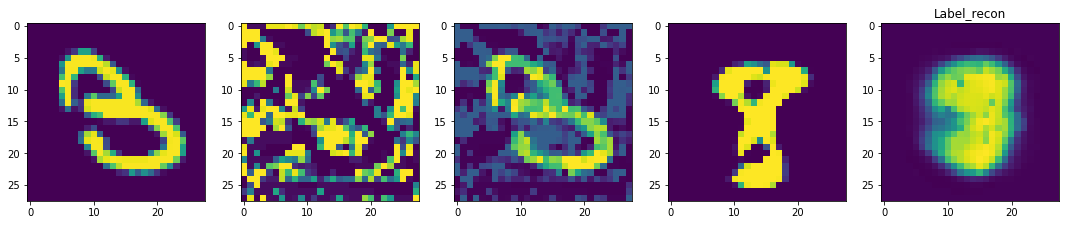

L2_distance: 144.1431884765625  Model_fooled : True  d<=theta False


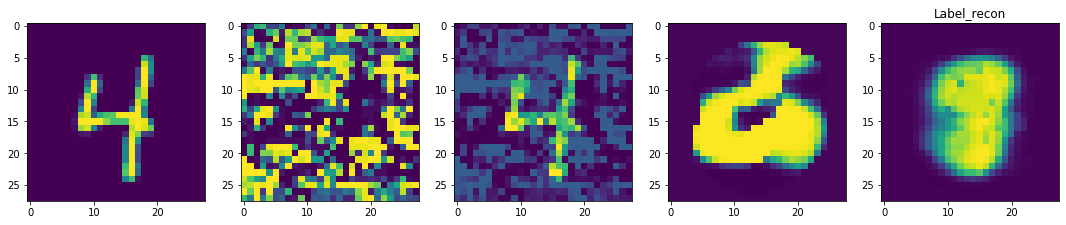

L2_distance: 156.61199951171875  Model_fooled : True  d<=theta False


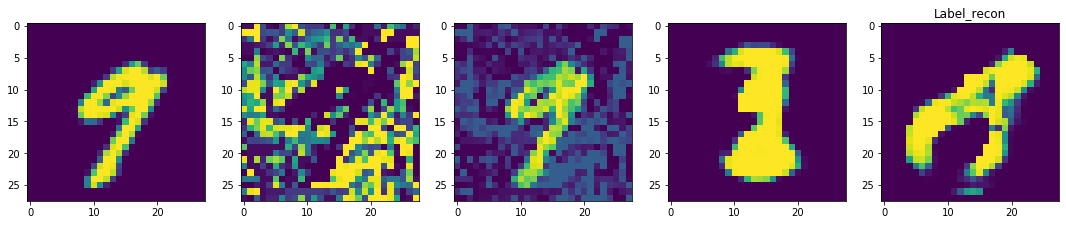

L2_distance: 98.09347534179688  Model_fooled : True  d<=theta False


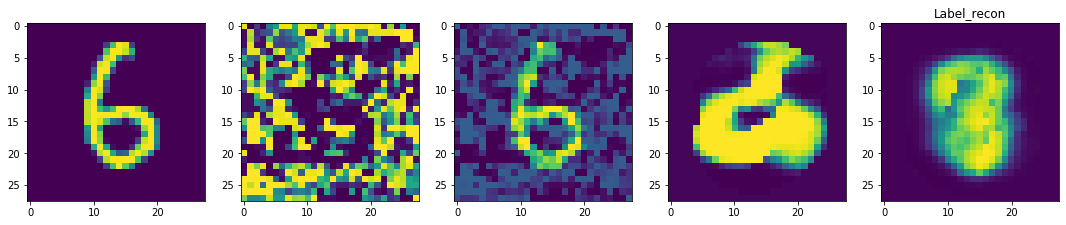

L2_distance: 146.410400390625  Model_fooled : True  d<=theta False


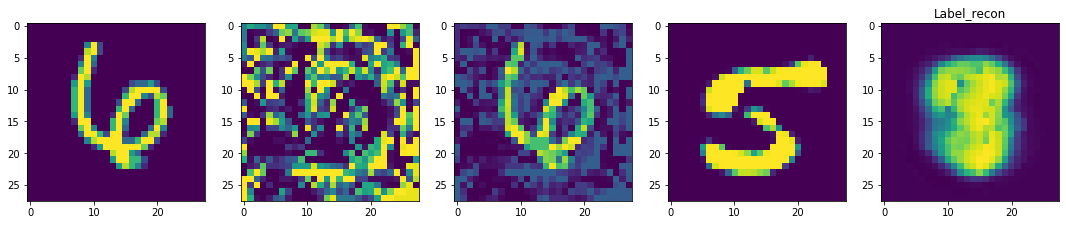

L2_distance: 123.13050842285156  Model_fooled : True  d<=theta False


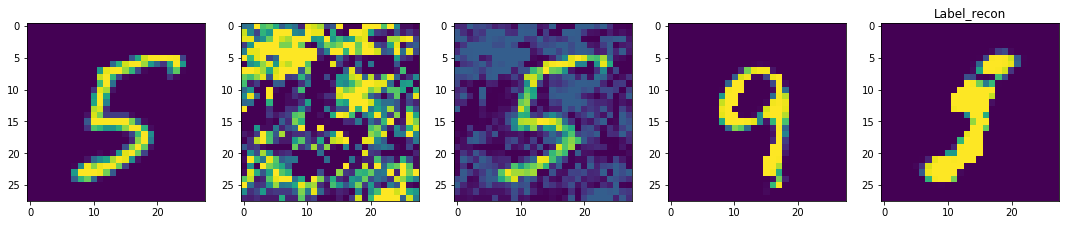

L2_distance: 81.04785919189453  Model_fooled : True  d<=theta False


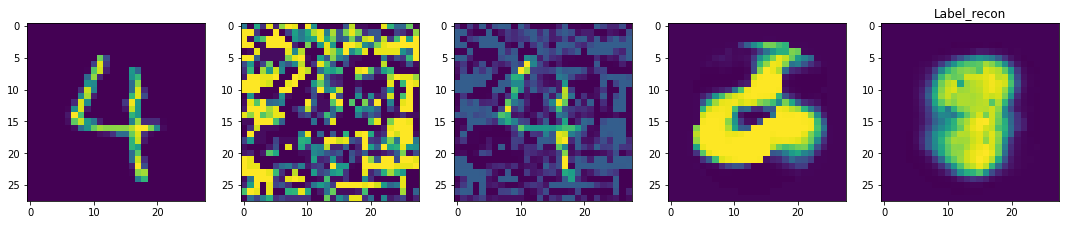

L2_distance: 139.7645263671875  Model_fooled : True  d<=theta False


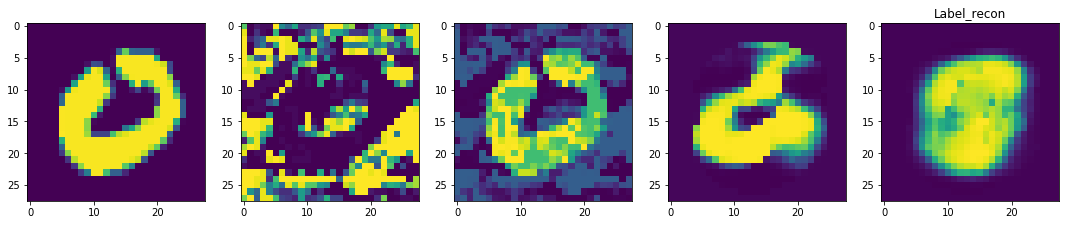

L2_distance: 90.12173461914062  Model_fooled : True  d<=theta False


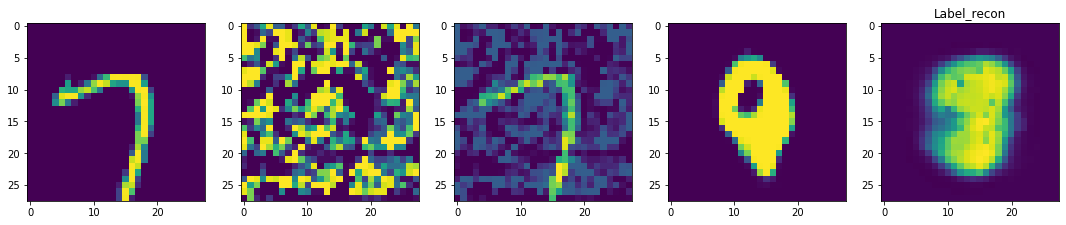

L2_distance: 100.55318450927734  Model_fooled : True  d<=theta False


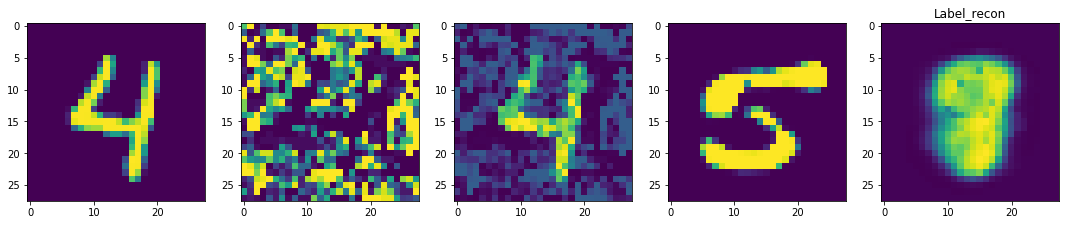

L2_distance: 115.58964538574219  Model_fooled : True  d<=theta False


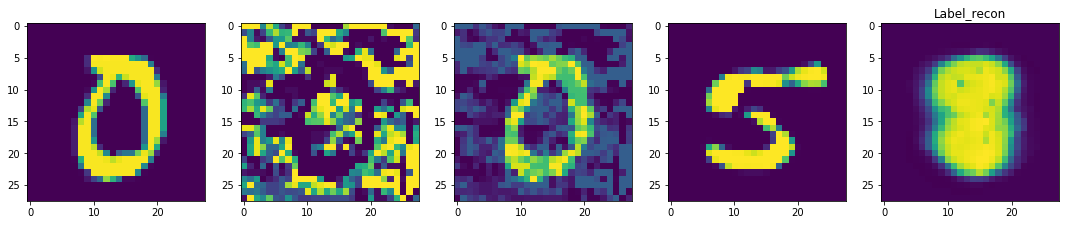

L2_distance: 117.77347564697266  Model_fooled : True  d<=theta False


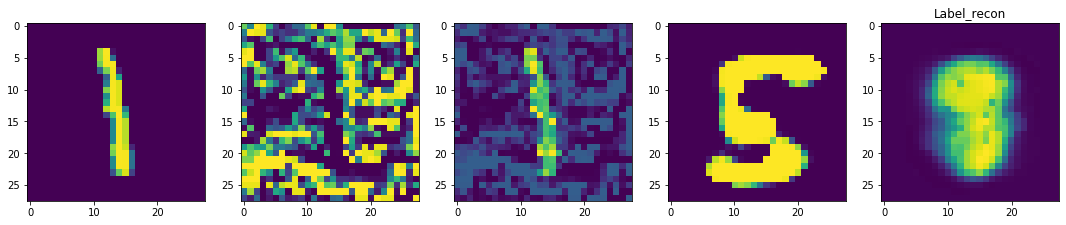

L2_distance: 146.02731323242188  Model_fooled : True  d<=theta False


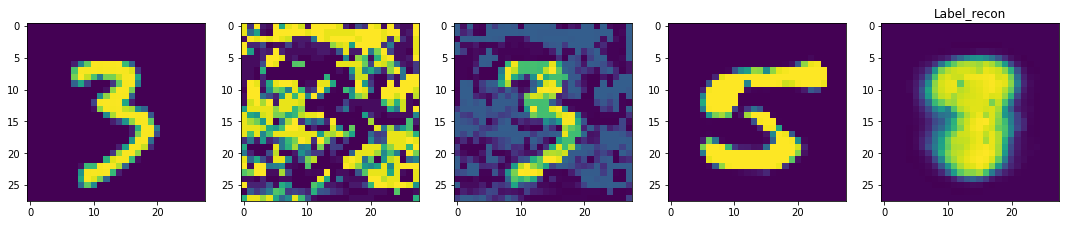

L2_distance: 118.44931030273438  Model_fooled : True  d<=theta False


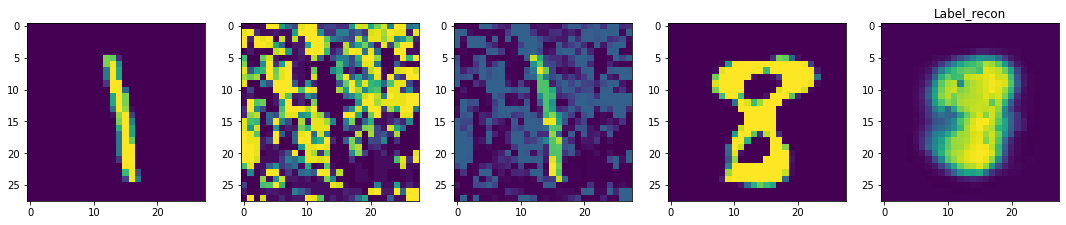



  0%|          | 0/40 [00:00<?, ?it/s]

L2_distance: 112.77168273925781  Model_fooled : True  d<=theta False
THE ADVERSARY IS : FGSM


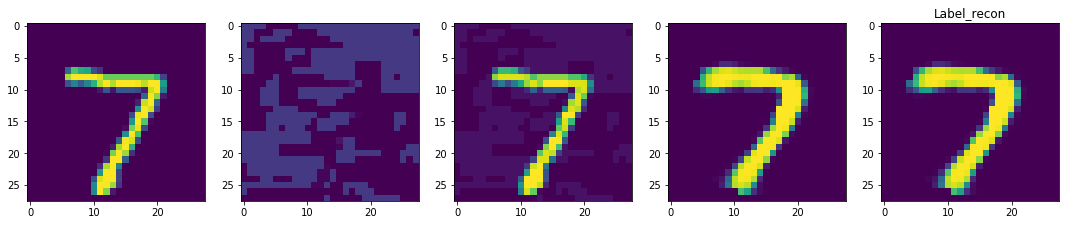

L2_distance: 20.893260955810547  Model_fooled : False  d<=theta True


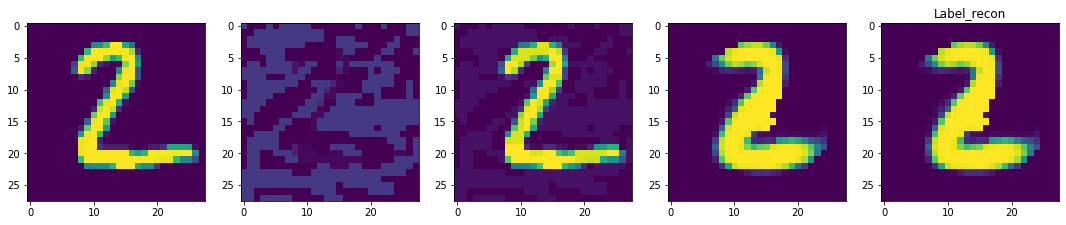

L2_distance: 44.52440643310547  Model_fooled : False  d<=theta False


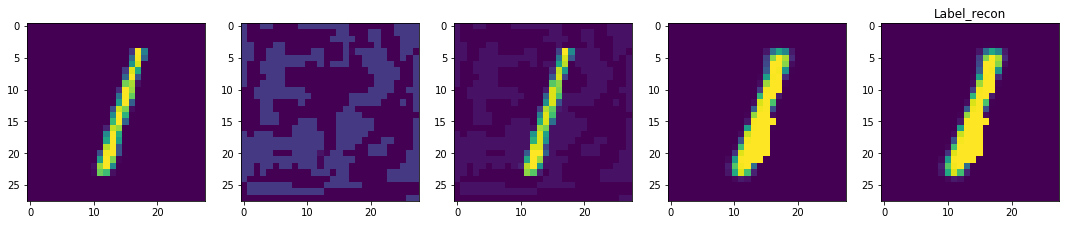

L2_distance: 17.936155319213867  Model_fooled : False  d<=theta True


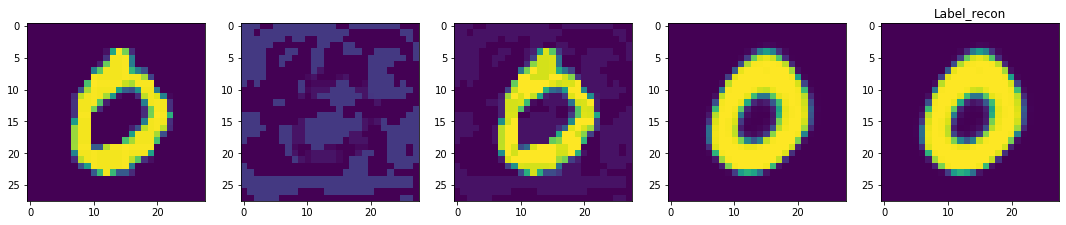

L2_distance: 25.769603729248047  Model_fooled : False  d<=theta True


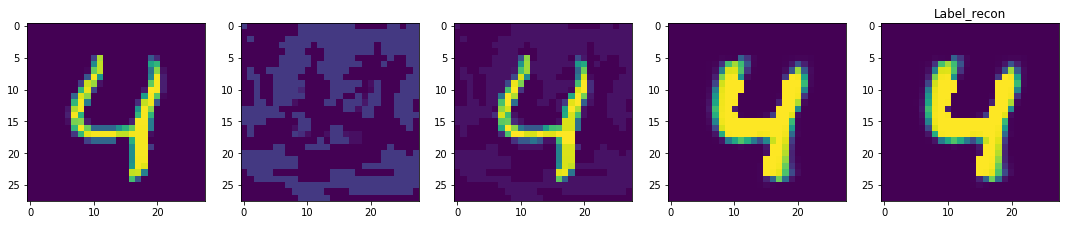

L2_distance: 33.64974594116211  Model_fooled : False  d<=theta True


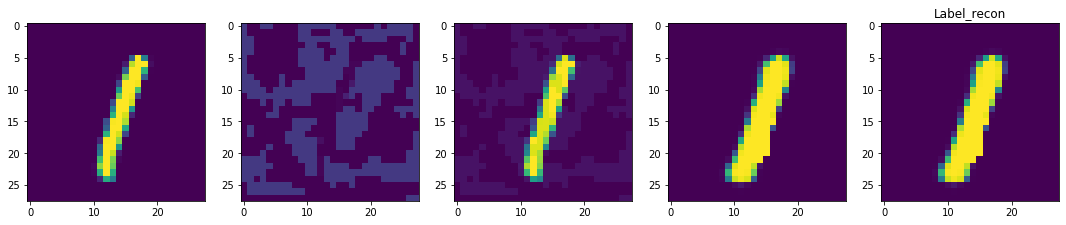

L2_distance: 19.289228439331055  Model_fooled : False  d<=theta True


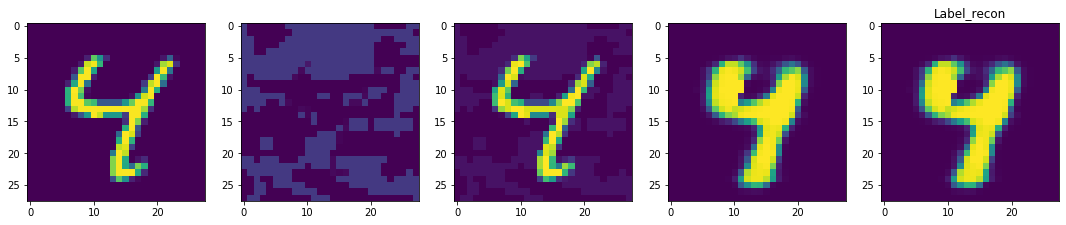

L2_distance: 45.39105224609375  Model_fooled : False  d<=theta False


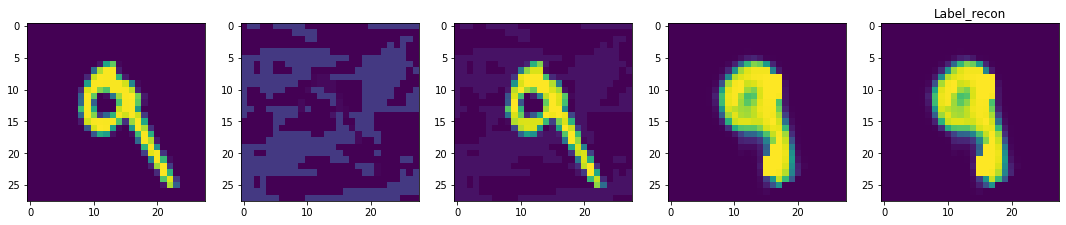

L2_distance: 49.75679016113281  Model_fooled : False  d<=theta False


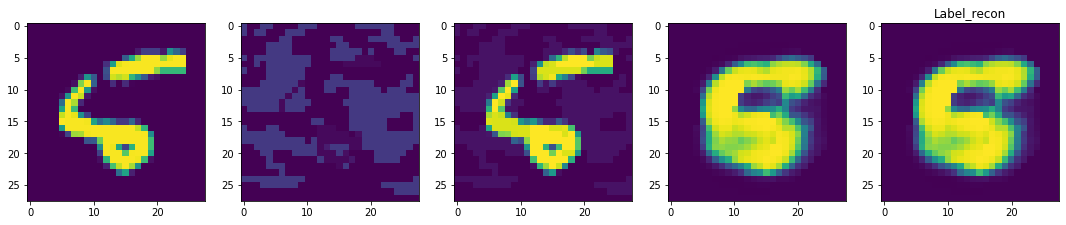

L2_distance: 77.50660705566406  Model_fooled : False  d<=theta False


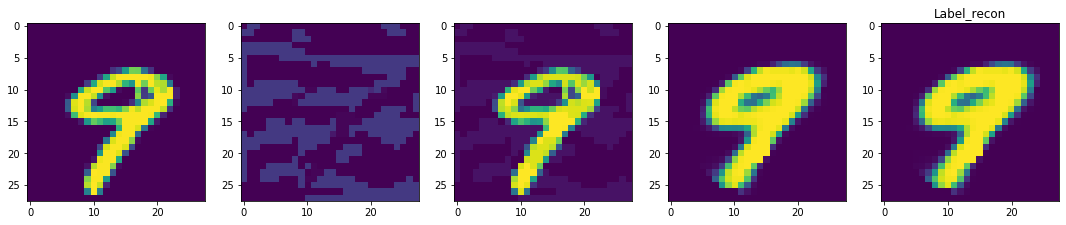

L2_distance: 27.946022033691406  Model_fooled : False  d<=theta True


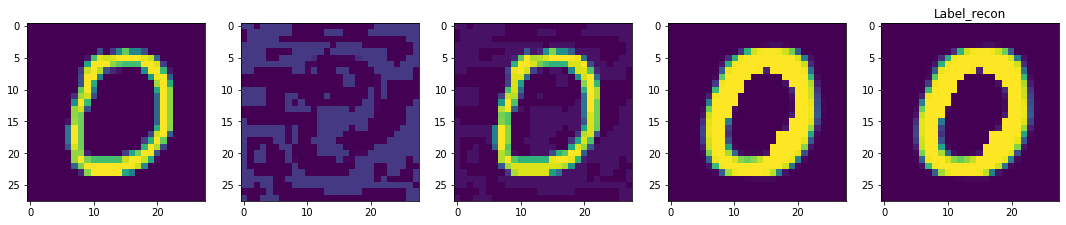

L2_distance: 42.72093963623047  Model_fooled : False  d<=theta True


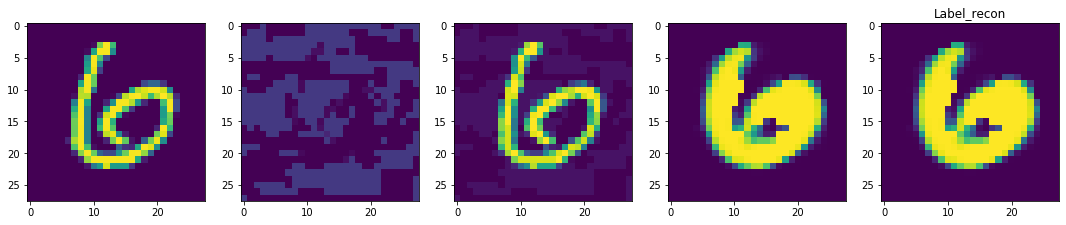

L2_distance: 74.91743469238281  Model_fooled : False  d<=theta False


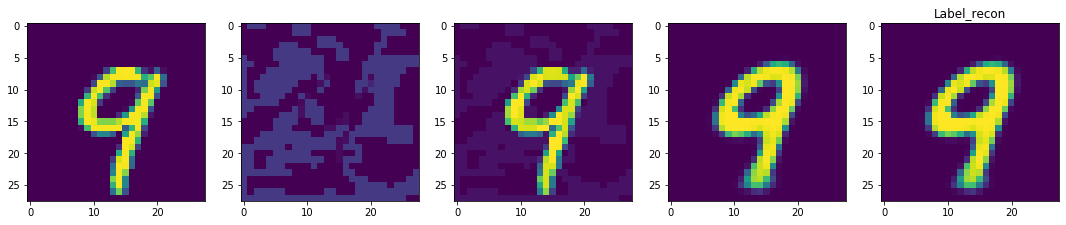

L2_distance: 12.433164596557617  Model_fooled : False  d<=theta True


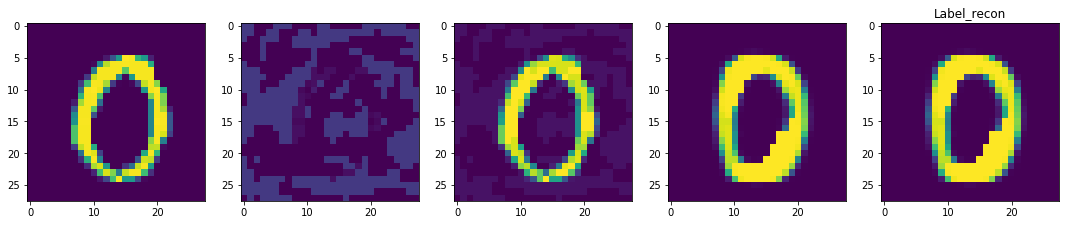

L2_distance: 35.517982482910156  Model_fooled : False  d<=theta True


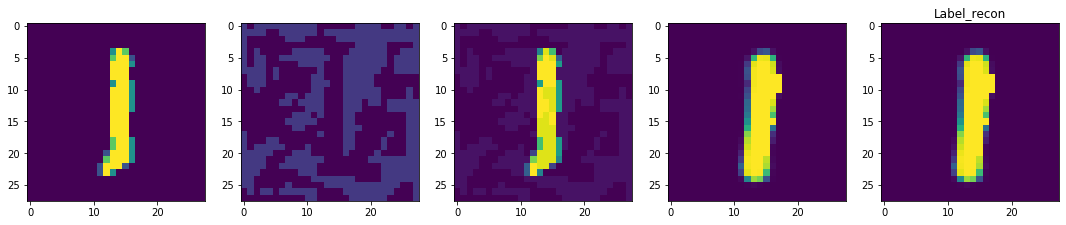

L2_distance: 17.754364013671875  Model_fooled : False  d<=theta True


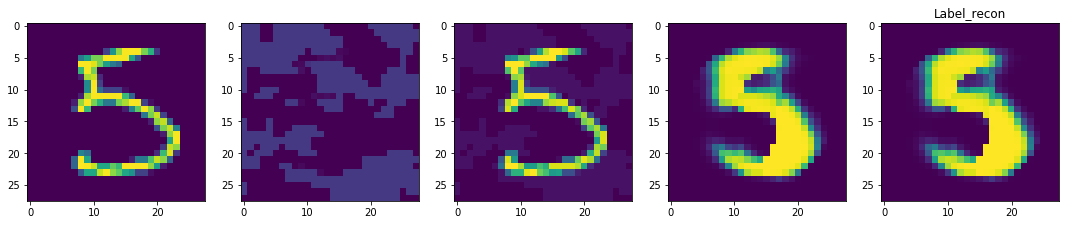

L2_distance: 74.07652282714844  Model_fooled : False  d<=theta False


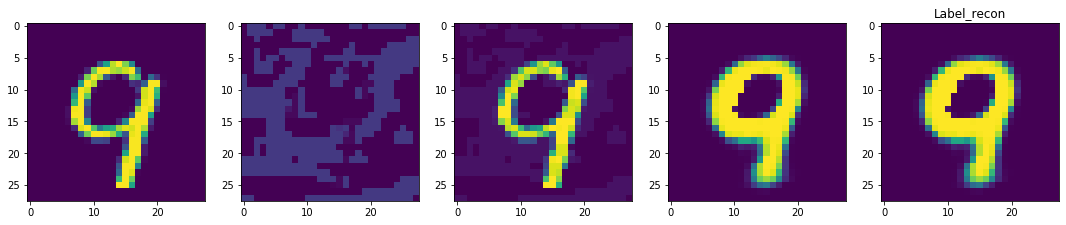

L2_distance: 33.95087432861328  Model_fooled : False  d<=theta True


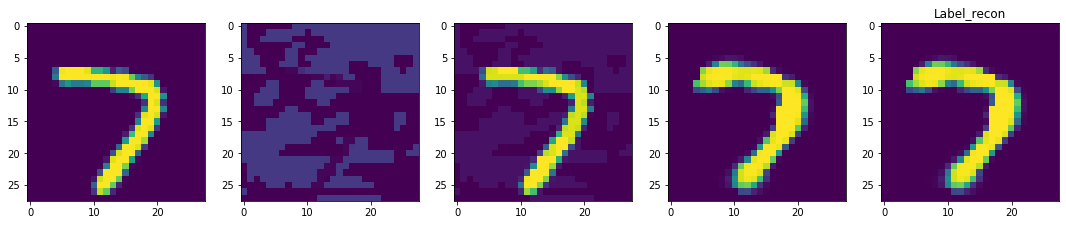

L2_distance: 15.89561653137207  Model_fooled : False  d<=theta True


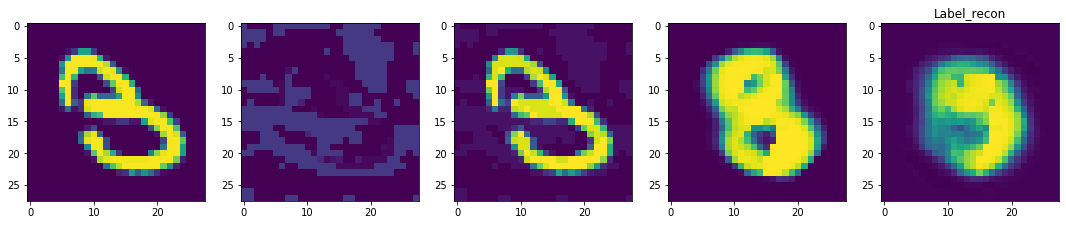

L2_distance: 86.32638549804688  Model_fooled : True  d<=theta False


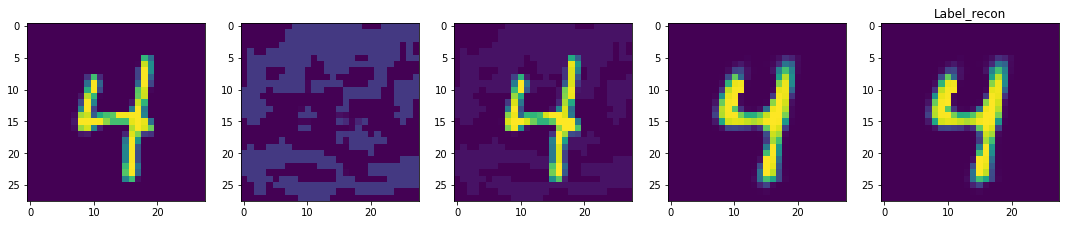

L2_distance: 12.494202613830566  Model_fooled : False  d<=theta True


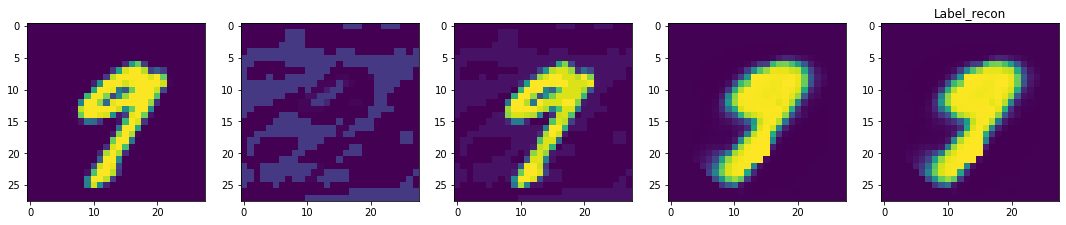

L2_distance: 28.40610122680664  Model_fooled : False  d<=theta True


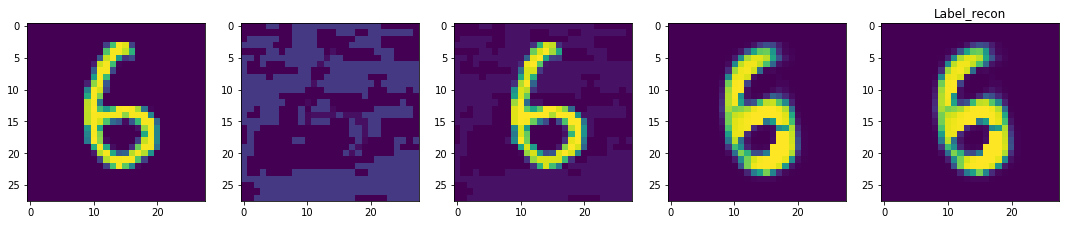

L2_distance: 22.817344665527344  Model_fooled : False  d<=theta True


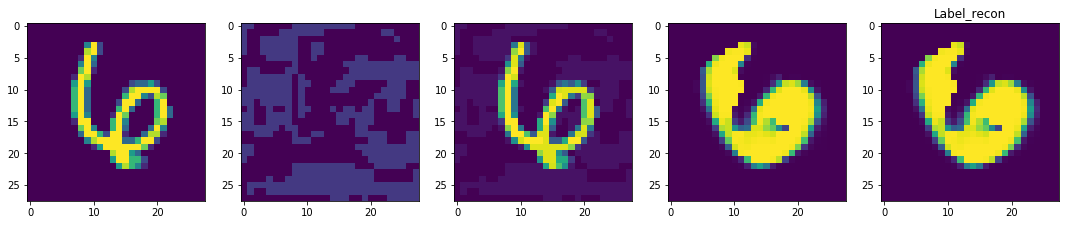

L2_distance: 64.62692260742188  Model_fooled : False  d<=theta False


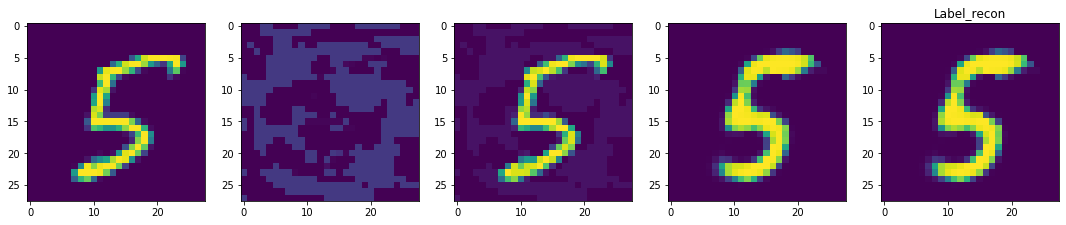

L2_distance: 29.51009178161621  Model_fooled : False  d<=theta True


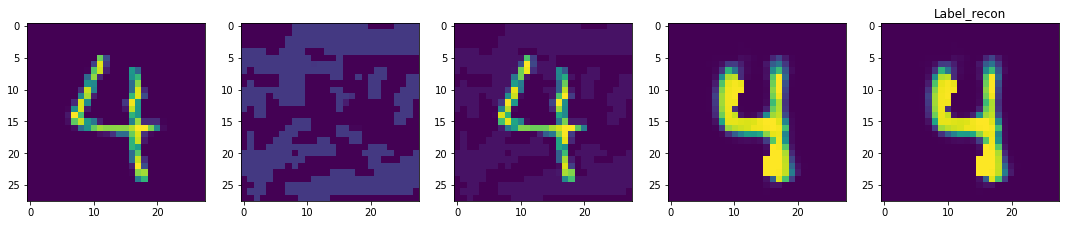

L2_distance: 33.834999084472656  Model_fooled : False  d<=theta True


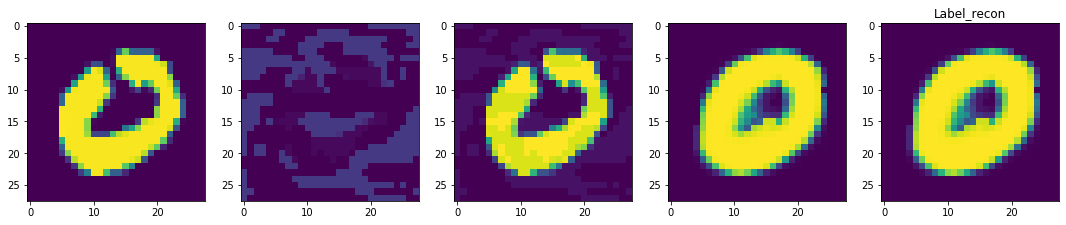

L2_distance: 35.60586166381836  Model_fooled : False  d<=theta True


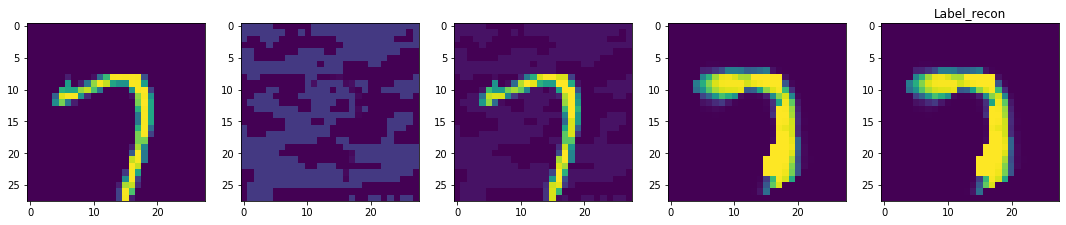

L2_distance: 33.269798278808594  Model_fooled : False  d<=theta True


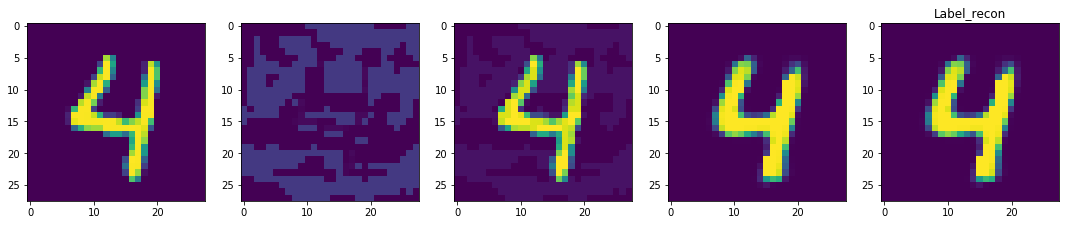

L2_distance: 15.565423965454102  Model_fooled : False  d<=theta True


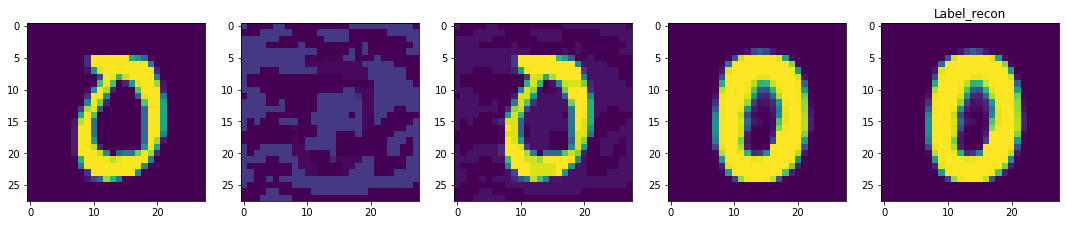

L2_distance: 41.724082946777344  Model_fooled : False  d<=theta True


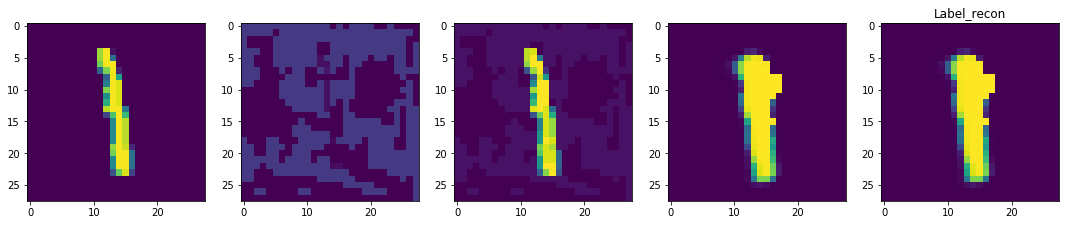

L2_distance: 27.901784896850586  Model_fooled : False  d<=theta True


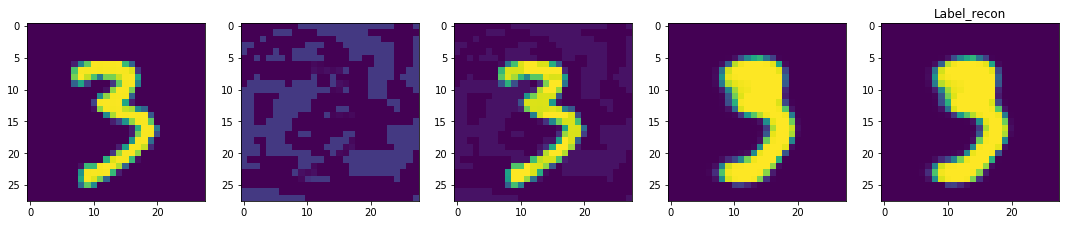

L2_distance: 29.318864822387695  Model_fooled : False  d<=theta True


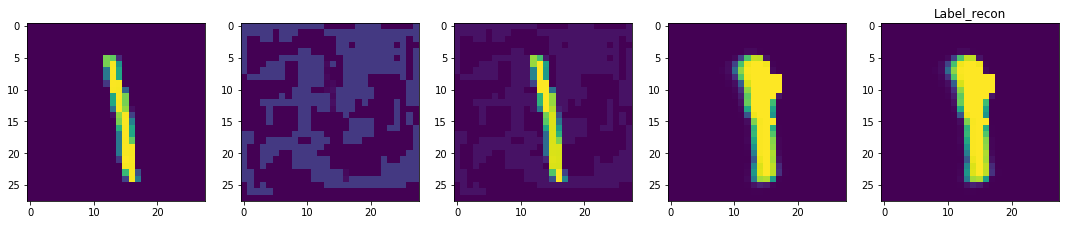




  0%|          | 0/40 [00:00<?, ?it/s]

L2_distance: 29.349971771240234  Model_fooled : False  d<=theta True
THE ADVERSARY IS : BIM


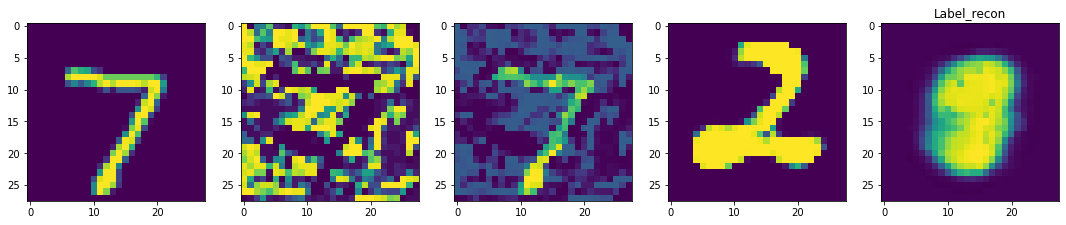

L2_distance: 156.43557739257812  Model_fooled : True  d<=theta False


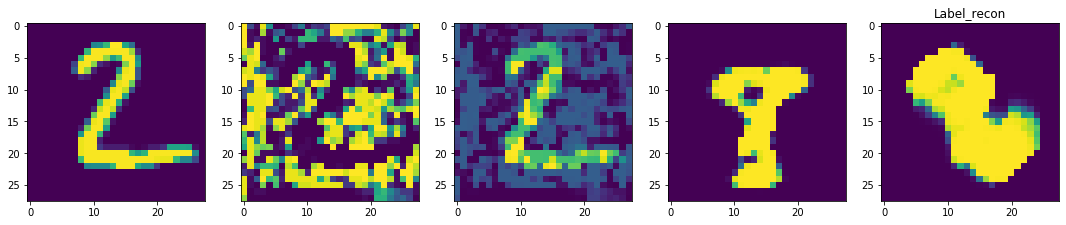

L2_distance: 136.2852783203125  Model_fooled : True  d<=theta False


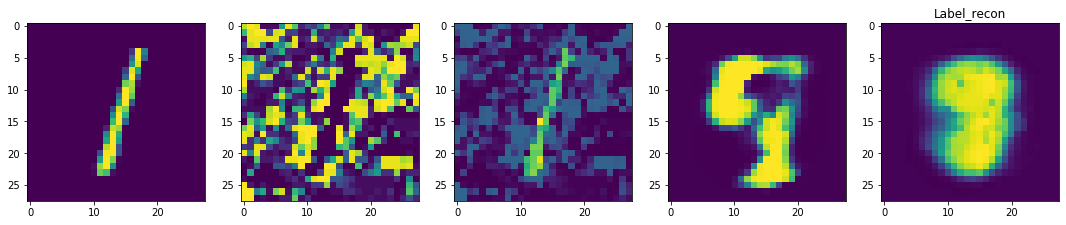

L2_distance: 110.46250915527344  Model_fooled : True  d<=theta False


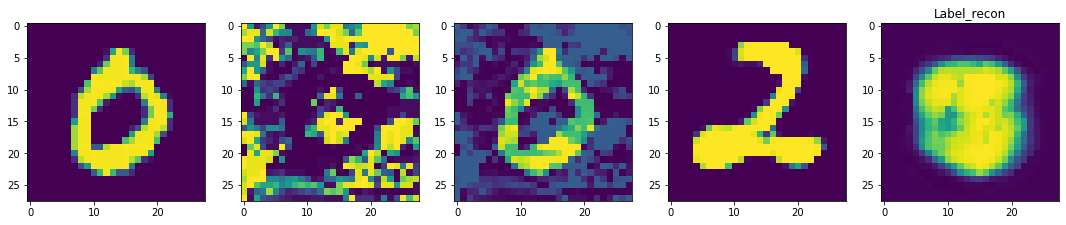

L2_distance: 142.68264770507812  Model_fooled : True  d<=theta False


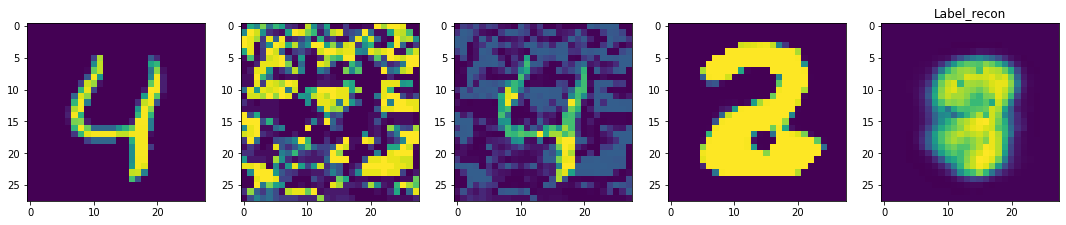

L2_distance: 170.09799194335938  Model_fooled : True  d<=theta False


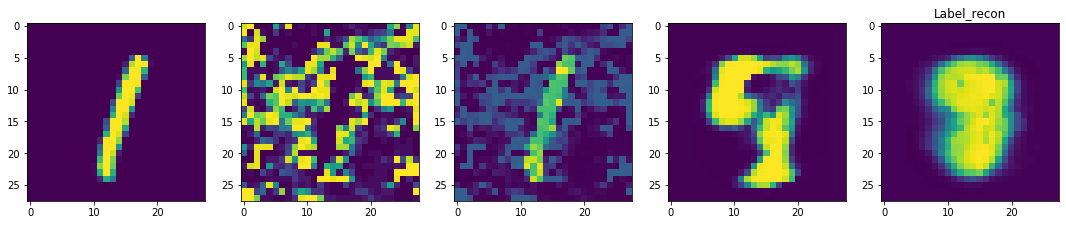

L2_distance: 108.63299560546875  Model_fooled : True  d<=theta False


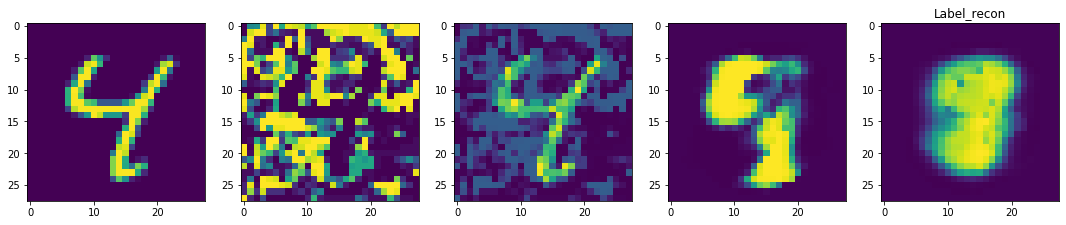

L2_distance: 75.94120025634766  Model_fooled : True  d<=theta False


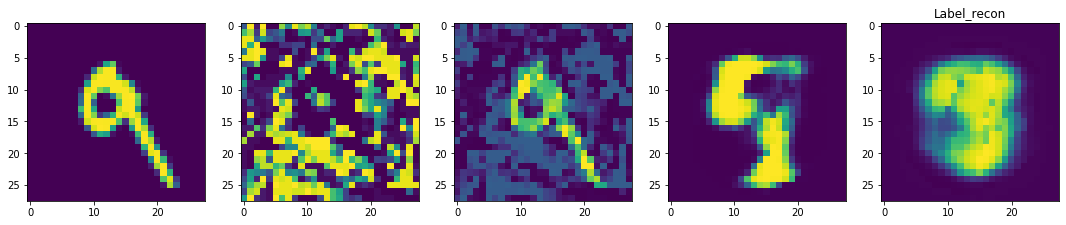

L2_distance: 95.20154571533203  Model_fooled : True  d<=theta False


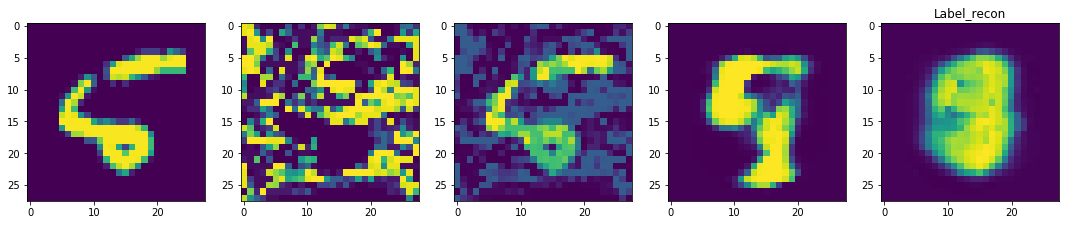

L2_distance: 91.03599548339844  Model_fooled : True  d<=theta False


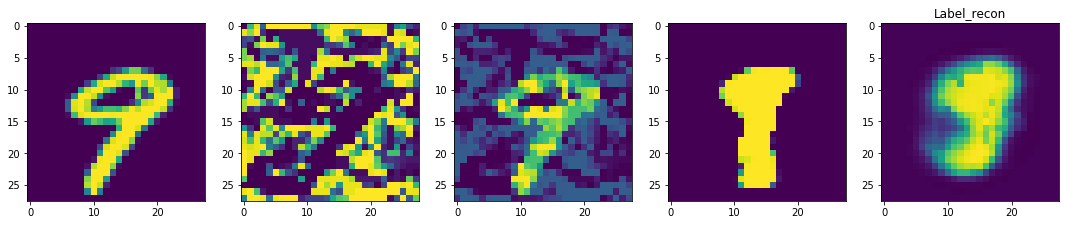

L2_distance: 91.17633056640625  Model_fooled : True  d<=theta False


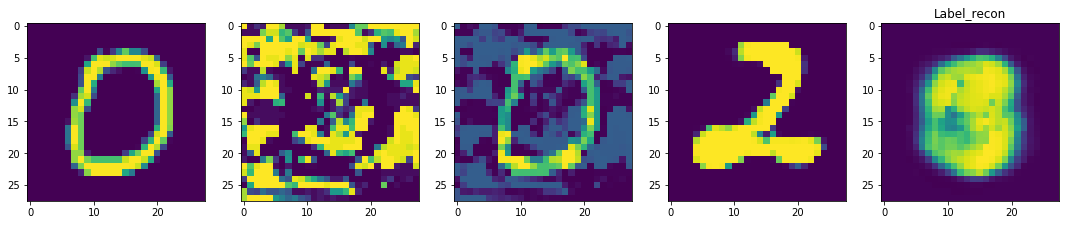

L2_distance: 136.52728271484375  Model_fooled : True  d<=theta False


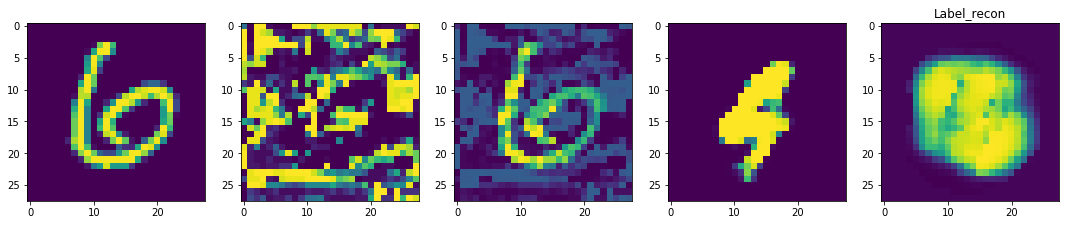

L2_distance: 106.62982177734375  Model_fooled : True  d<=theta False


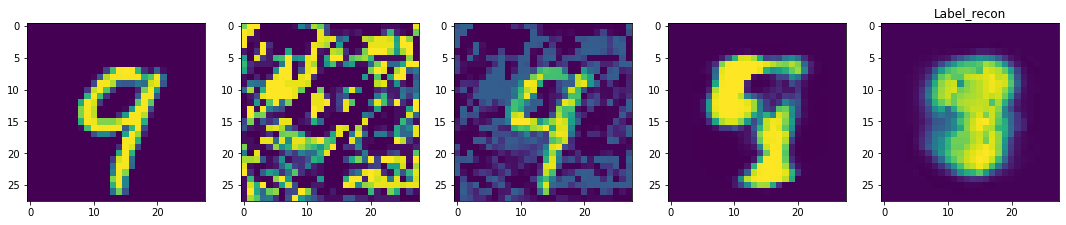

L2_distance: 75.50445556640625  Model_fooled : True  d<=theta False


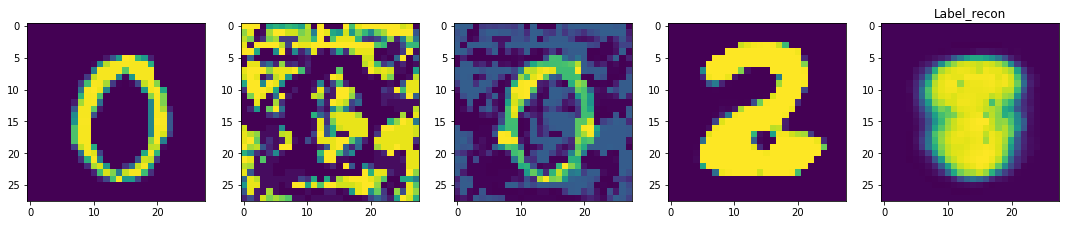

L2_distance: 180.7104949951172  Model_fooled : True  d<=theta False


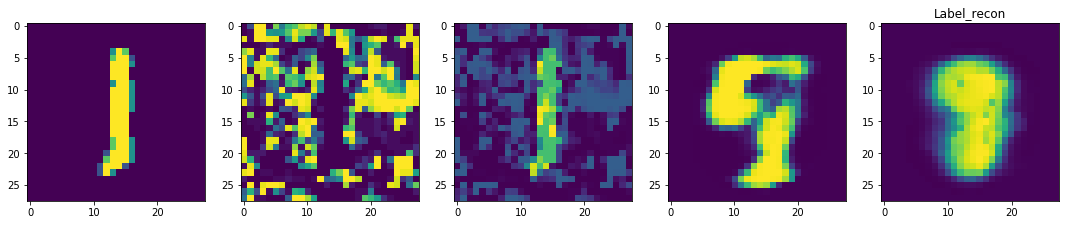

L2_distance: 104.96978759765625  Model_fooled : True  d<=theta False


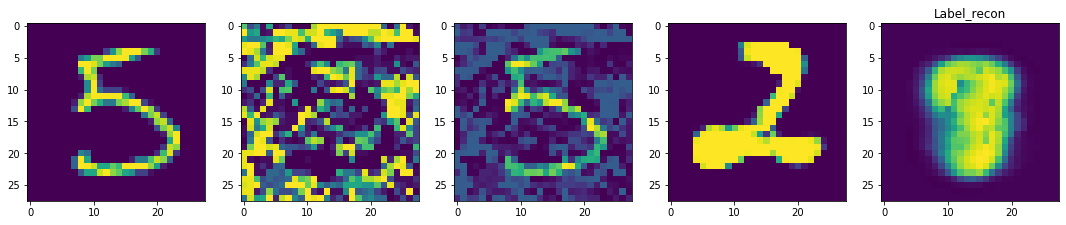

L2_distance: 162.14031982421875  Model_fooled : True  d<=theta False


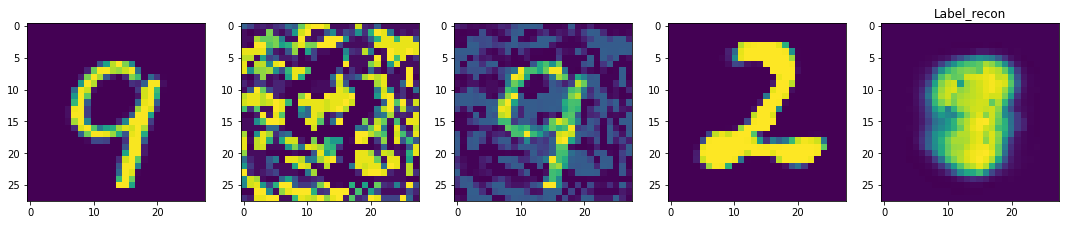

L2_distance: 143.427490234375  Model_fooled : True  d<=theta False


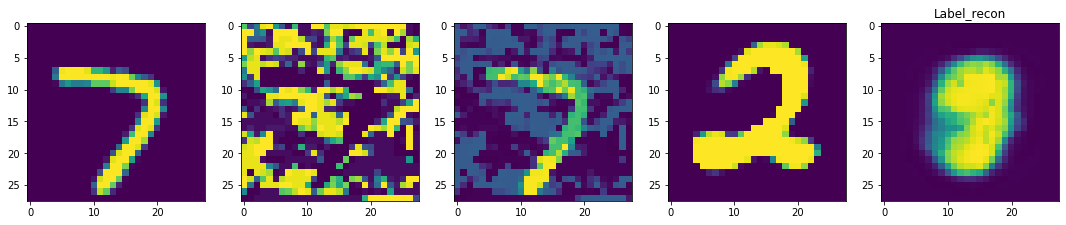

L2_distance: 171.75770568847656  Model_fooled : True  d<=theta False


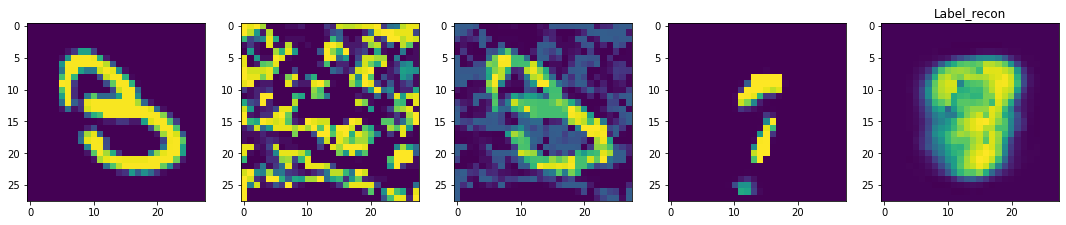

L2_distance: 115.51825714111328  Model_fooled : True  d<=theta False


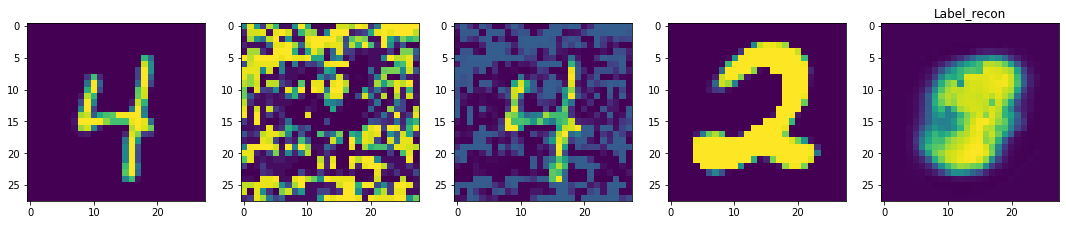

L2_distance: 164.77084350585938  Model_fooled : True  d<=theta False


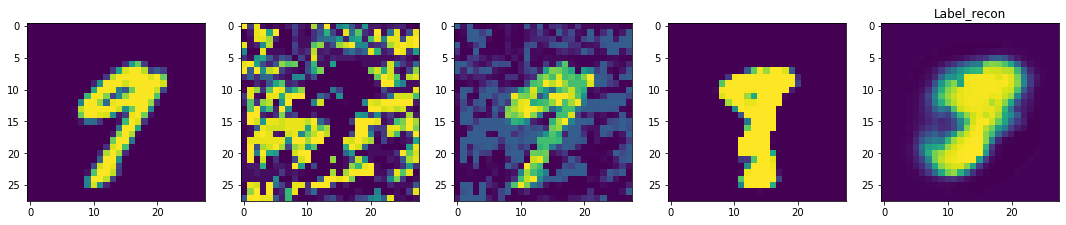

L2_distance: 77.61550903320312  Model_fooled : True  d<=theta False


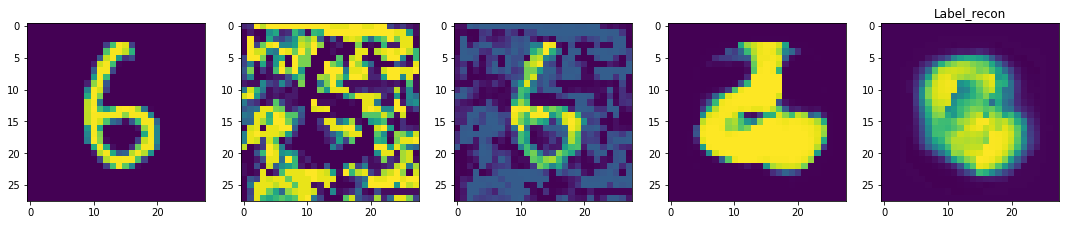

L2_distance: 134.46766662597656  Model_fooled : True  d<=theta False


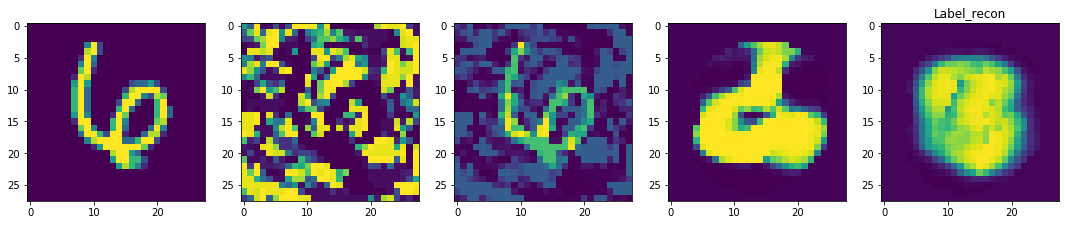

L2_distance: 132.8159637451172  Model_fooled : True  d<=theta False


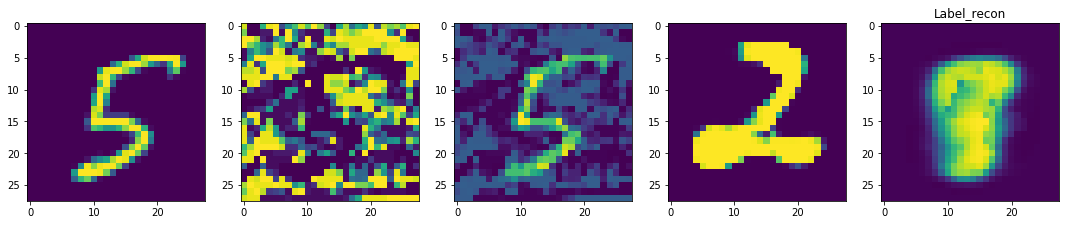

L2_distance: 149.66946411132812  Model_fooled : True  d<=theta False


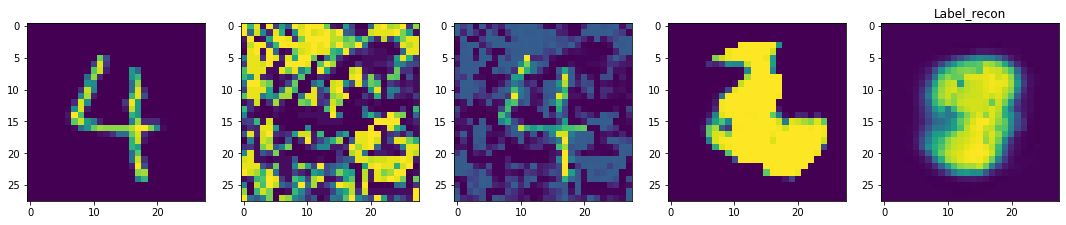

L2_distance: 147.27908325195312  Model_fooled : True  d<=theta False


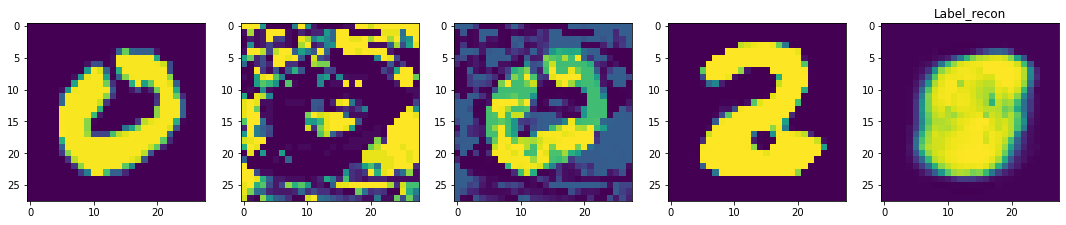

L2_distance: 160.3264923095703  Model_fooled : True  d<=theta False


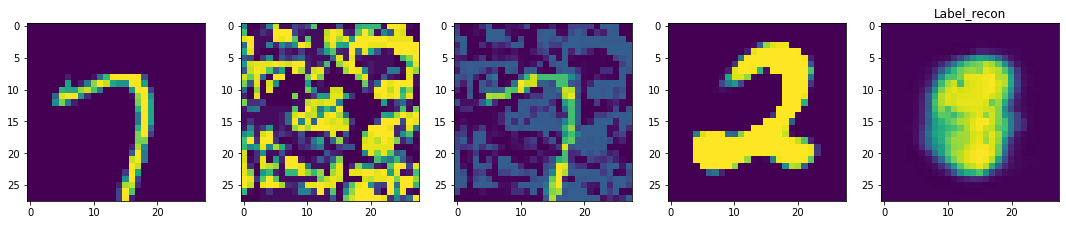

L2_distance: 162.75637817382812  Model_fooled : True  d<=theta False


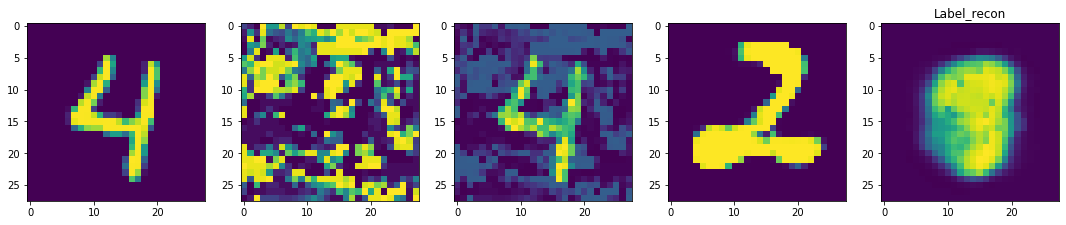

L2_distance: 142.44256591796875  Model_fooled : True  d<=theta False


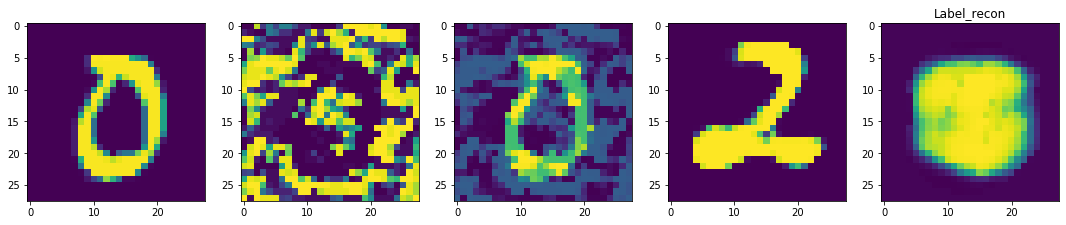

L2_distance: 150.7164764404297  Model_fooled : True  d<=theta False


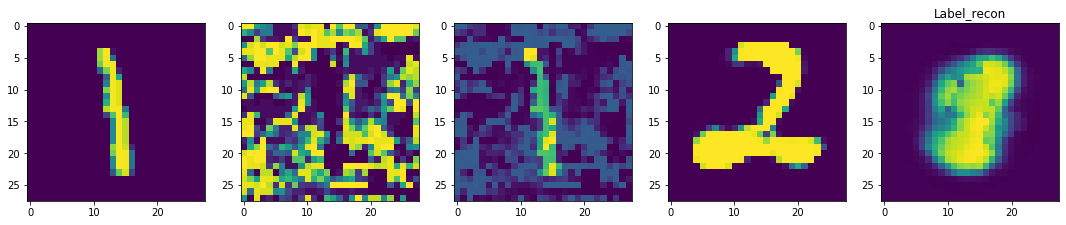

L2_distance: 137.95071411132812  Model_fooled : True  d<=theta False


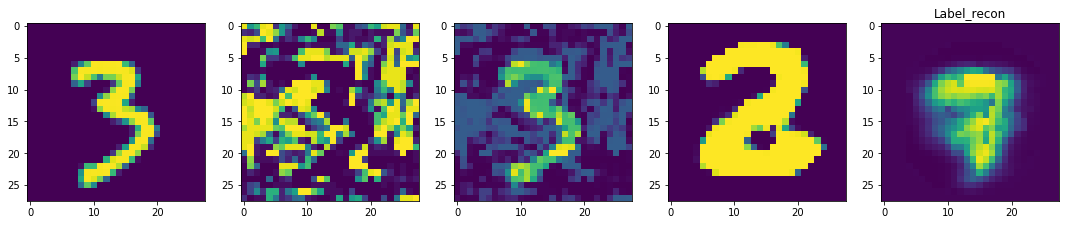

L2_distance: 164.9830322265625  Model_fooled : True  d<=theta False


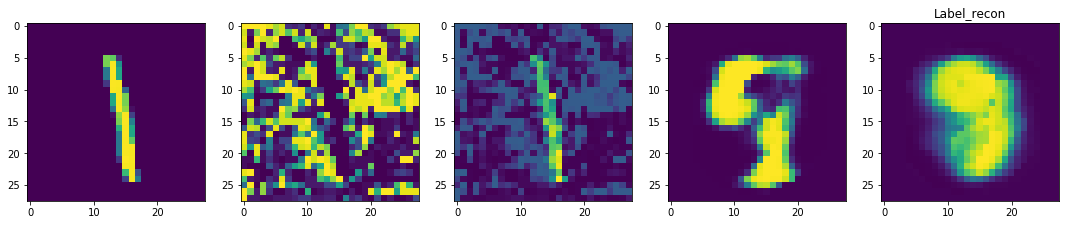

L2_distance: 86.33624267578125  Model_fooled : True  d<=theta False


In [8]:
args['BATCH_SIZE']=32
model_for_adversary = Model_for_Adversary(net)

linf_eps = 0.3
fgsm_step = 0.05
bim_pgd_step = 0.01

adversary_dict = {}
adversary_dict['Clean'] = CleanAttack(clip_min=-0.4242, clip_max=2.8215)
adversary_dict['PGD'] = LinfPGDAttack(
    model_for_adversary, loss_fn=nn.CrossEntropyLoss(reduction="sum"), eps=(linf_eps/0.3081),
    nb_iter=1000, eps_iter=(bim_pgd_step/0.3081), rand_init=True, clip_min=-0.4242, clip_max=2.8215,
    targeted=False)

adversary_dict['FGSM'] = GradientSignAttack(model_for_adversary, loss_fn=nn.CrossEntropyLoss(reduction="sum"), eps=(fgsm_step/0.3081), clip_min=-0.4242, clip_max=2.8215, targeted=False)
adversary_dict['BIM'] = LinfBasicIterativeAttack(model_for_adversary, loss_fn=nn.CrossEntropyLoss(reduction="sum"), eps=(linf_eps/0.3081), nb_iter=1000, eps_iter=(bim_pgd_step/0.3081), clip_min=-0.4242, clip_max=2.8215, targeted=False)
# adversary_dict['CW'] = CarliniWagnerL2Attack(model_for_adversary, num_classes=args['num_classes'], confidence=0, targeted=False, learning_rate=0.01, binary_search_steps=9, max_iterations=1000, abort_early=True, initial_const=0.001, clip_min=-0.4242, clip_max=2.8215, loss_fn=None)

WhiteBox_Attacks_Untargeted(net, dataloader['val'], adversary_dict, args, 44)






  0%|          | 0/40 [00:00<?, ?it/s]

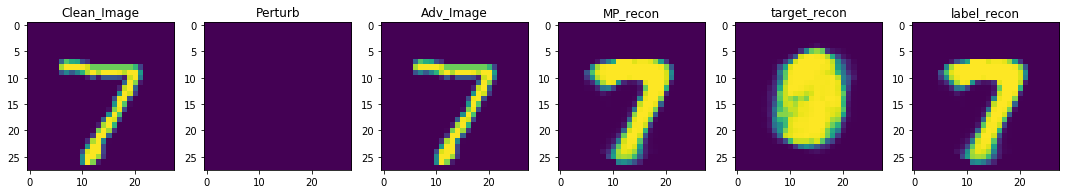

L2_distance: 40.05457305908203 Target:  4 Model_fooled : False : d <= theta True


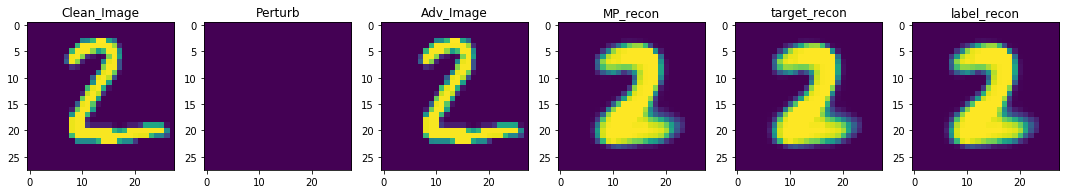

L2_distance: 91.64342498779297 Target:  2 Model_fooled : True : d <= theta False


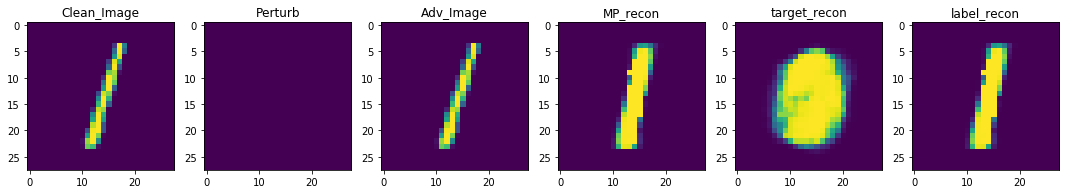

L2_distance: 23.095054626464844 Target:  8 Model_fooled : False : d <= theta True


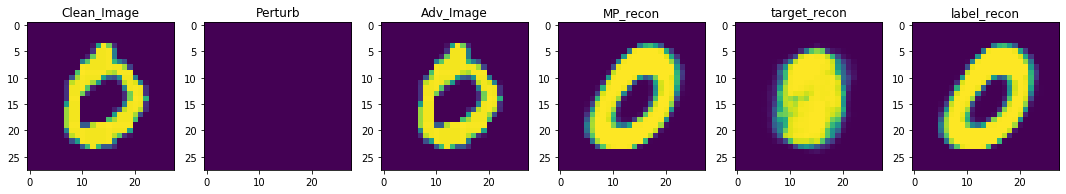

L2_distance: 45.405967712402344 Target:  1 Model_fooled : False : d <= theta False


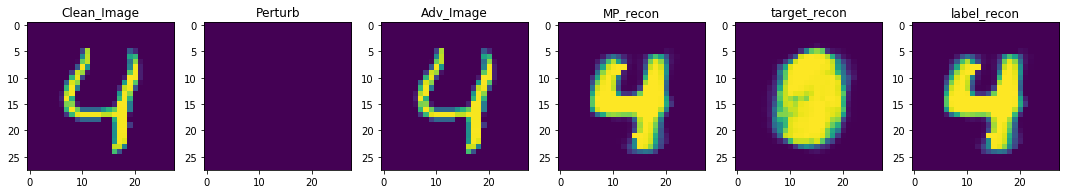

L2_distance: 59.84595489501953 Target:  2 Model_fooled : False : d <= theta False


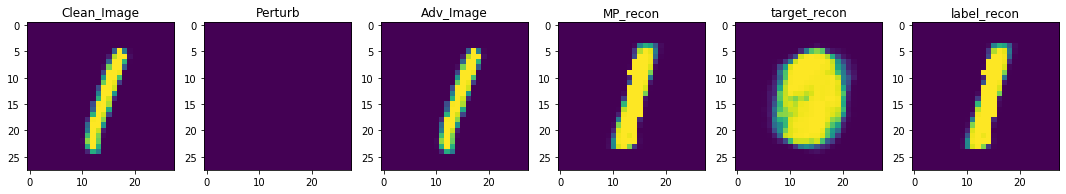

L2_distance: 16.31362533569336 Target:  5 Model_fooled : False : d <= theta True


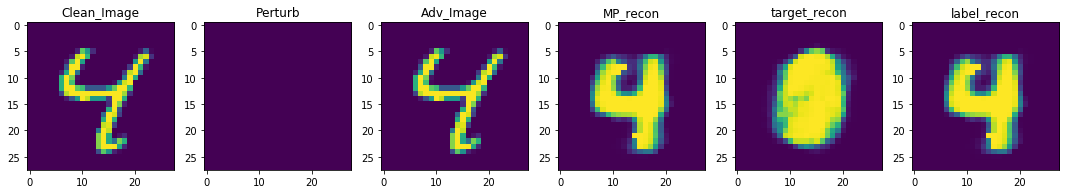

L2_distance: 77.53348541259766 Target:  6 Model_fooled : False : d <= theta False


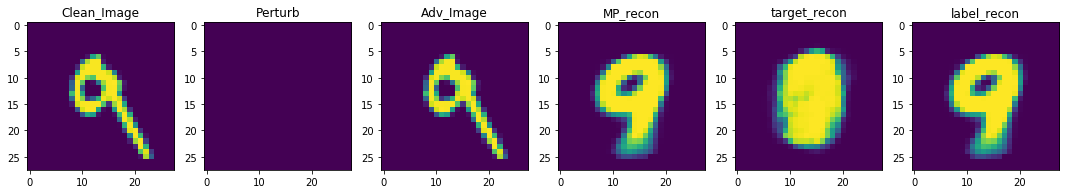

L2_distance: 80.51968383789062 Target:  3 Model_fooled : False : d <= theta False


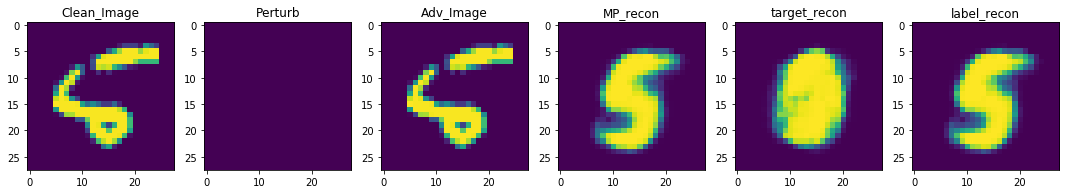

L2_distance: 100.66082763671875 Target:  8 Model_fooled : False : d <= theta False


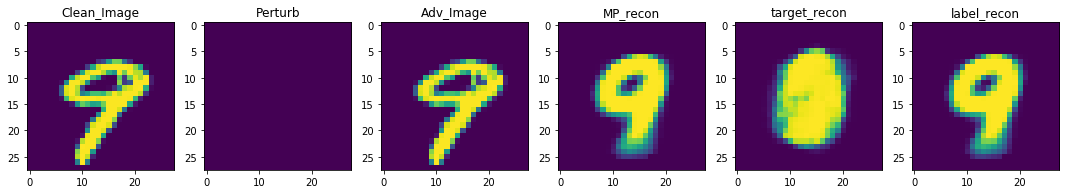

L2_distance: 58.66487121582031 Target:  0 Model_fooled : False : d <= theta False


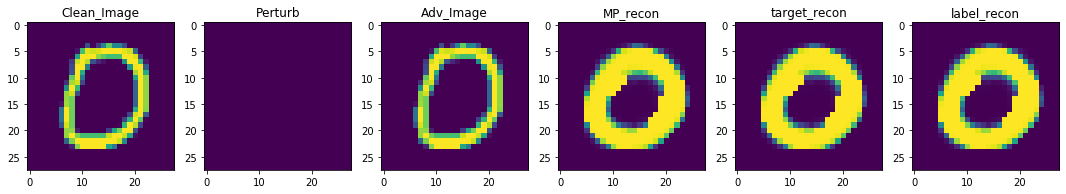

L2_distance: 83.90115356445312 Target:  0 Model_fooled : True : d <= theta False


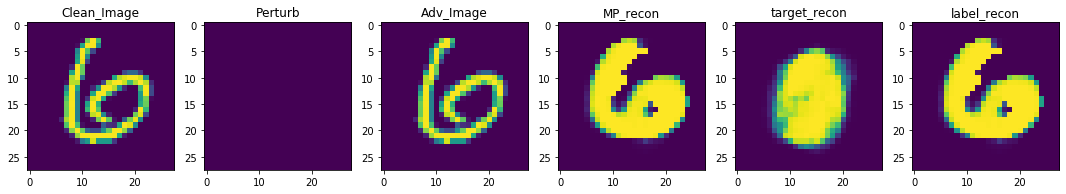

L2_distance: 104.77658081054688 Target:  2 Model_fooled : False : d <= theta False


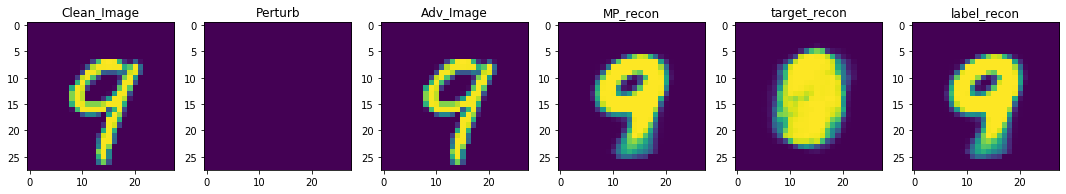

L2_distance: 41.28518295288086 Target:  0 Model_fooled : False : d <= theta True


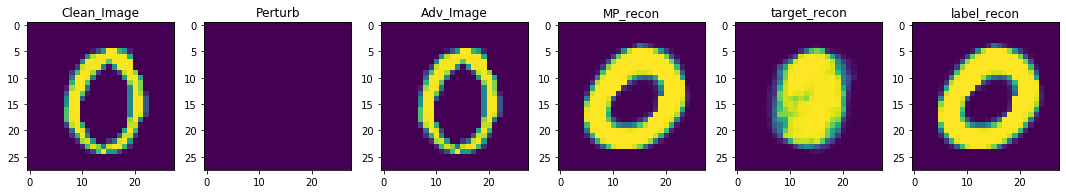

L2_distance: 84.22480773925781 Target:  9 Model_fooled : False : d <= theta False


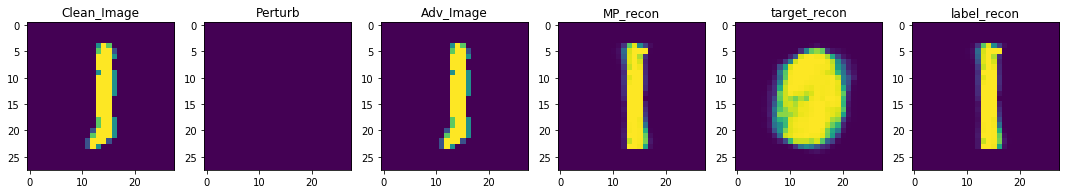

L2_distance: 8.930625915527344 Target:  8 Model_fooled : False : d <= theta True


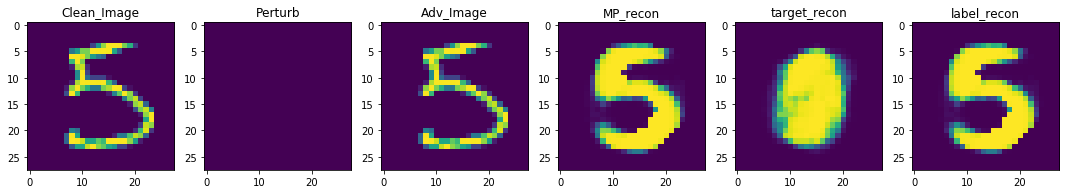

L2_distance: 83.25933837890625 Target:  2 Model_fooled : False : d <= theta False


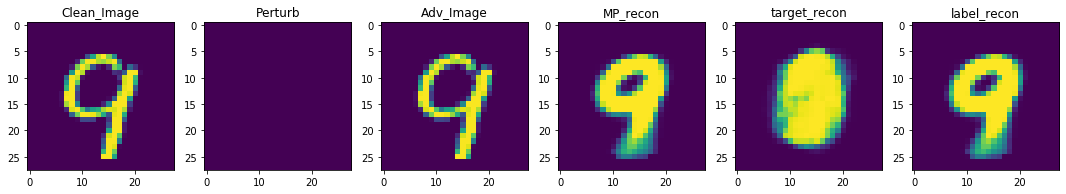

L2_distance: 59.99452209472656 Target:  4 Model_fooled : False : d <= theta False


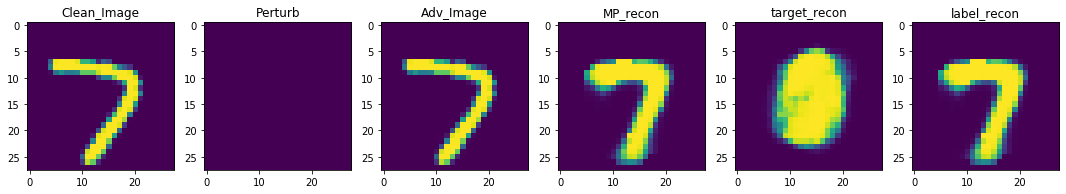

L2_distance: 45.779991149902344 Target:  3 Model_fooled : False : d <= theta False


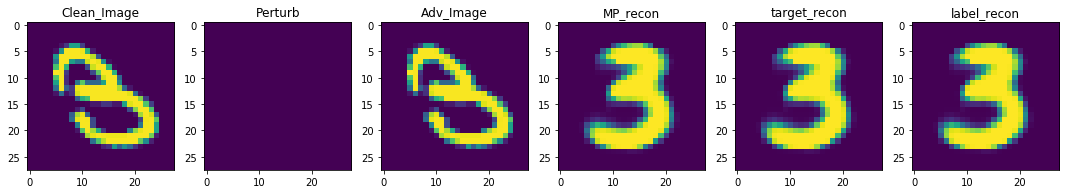

L2_distance: 119.69564056396484 Target:  3 Model_fooled : True : d <= theta False


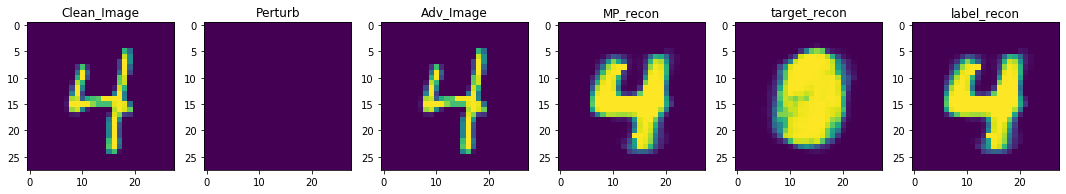

L2_distance: 52.46879196166992 Target:  1 Model_fooled : False : d <= theta False


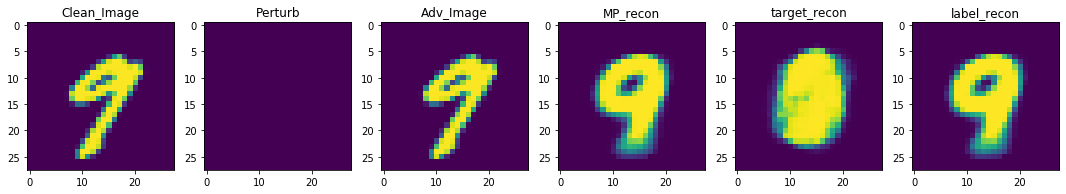

L2_distance: 54.46538162231445 Target:  8 Model_fooled : False : d <= theta False


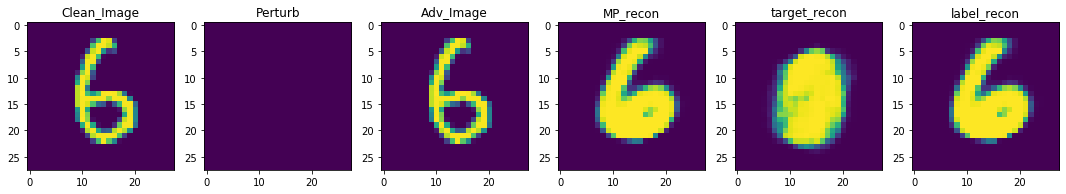

L2_distance: 64.69863891601562 Target:  8 Model_fooled : False : d <= theta False


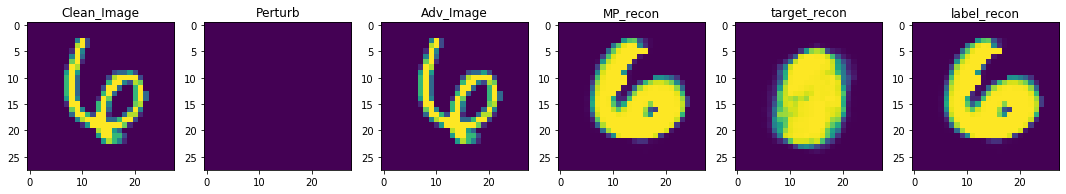

L2_distance: 102.47506713867188 Target:  7 Model_fooled : False : d <= theta False


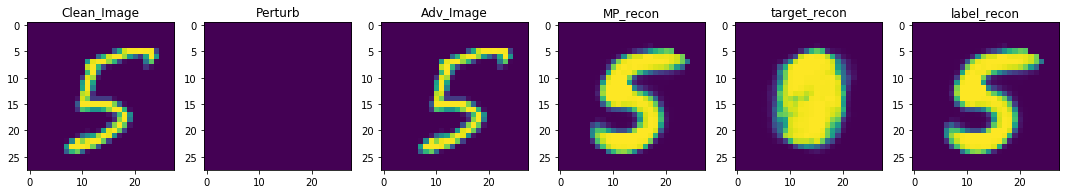

L2_distance: 61.502838134765625 Target:  3 Model_fooled : False : d <= theta False


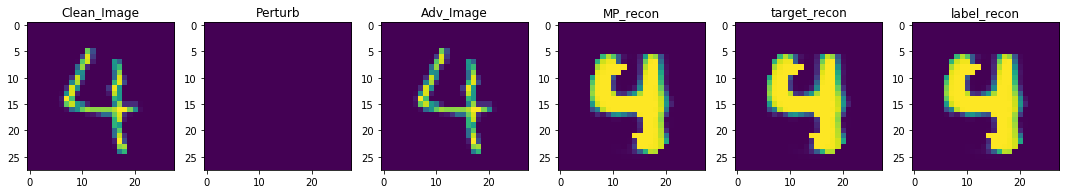

L2_distance: 74.43679809570312 Target:  4 Model_fooled : True : d <= theta False


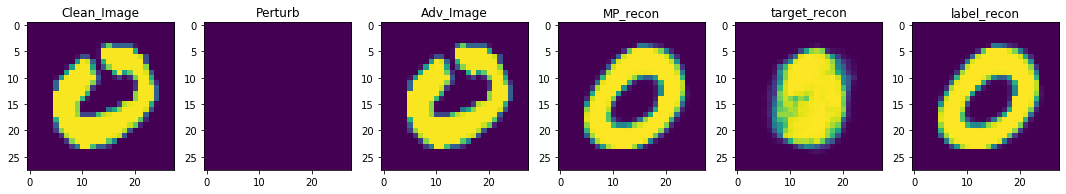

L2_distance: 39.5938720703125 Target:  5 Model_fooled : False : d <= theta True


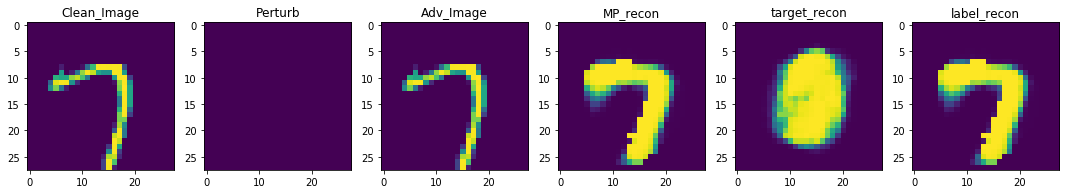

L2_distance: 67.02978515625 Target:  2 Model_fooled : False : d <= theta False


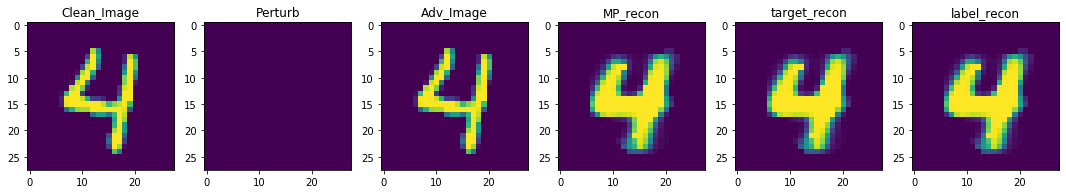

L2_distance: 42.838905334472656 Target:  4 Model_fooled : True : d <= theta True


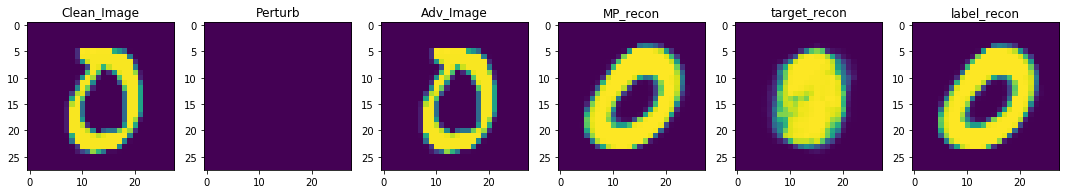

L2_distance: 73.9435043334961 Target:  7 Model_fooled : False : d <= theta False


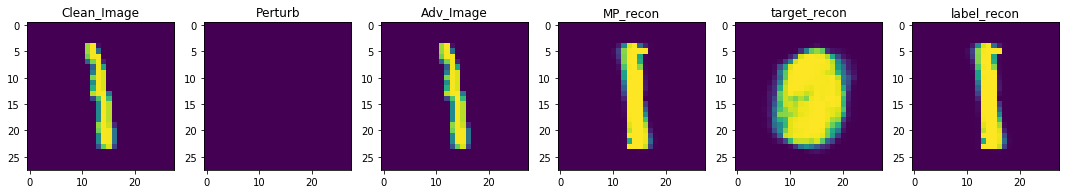

L2_distance: 21.263477325439453 Target:  0 Model_fooled : False : d <= theta True


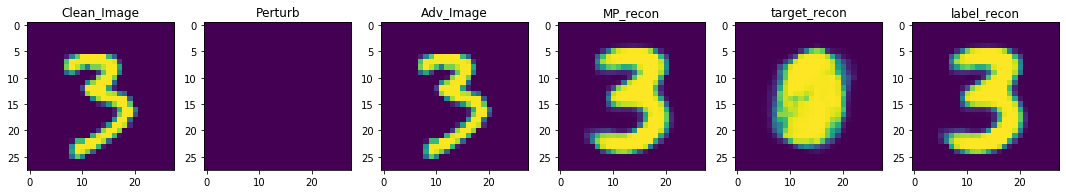

L2_distance: 58.509239196777344 Target:  5 Model_fooled : False : d <= theta False


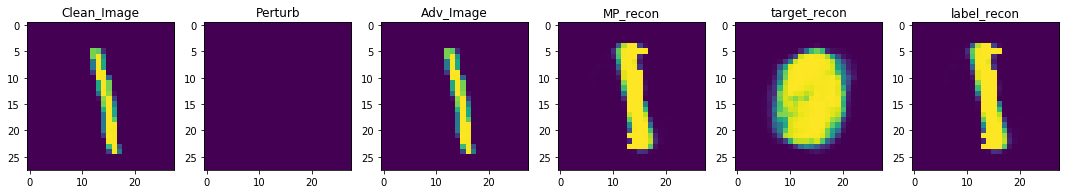







  0%|          | 0/40 [00:00<?, ?it/s]

L2_distance: 28.466632843017578 Target:  9 Model_fooled : False : d <= theta True


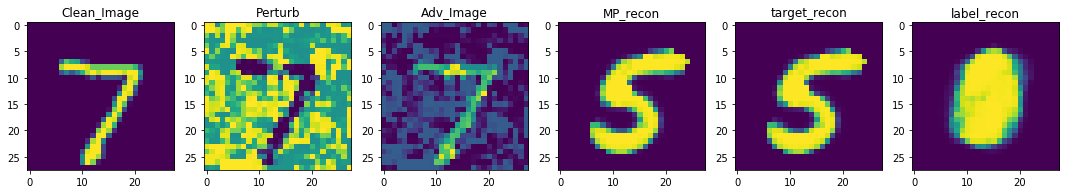

L2_distance: 98.6376953125 Target:  5 Model_fooled : True : d <= theta False


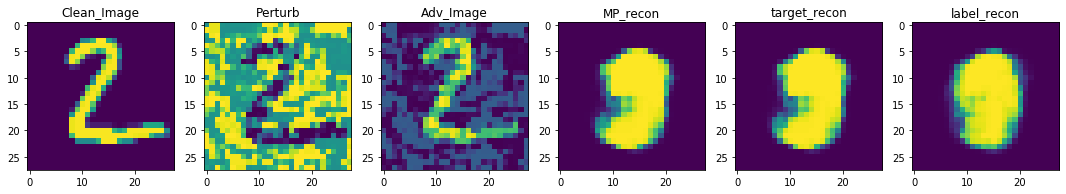

L2_distance: 118.95075988769531 Target:  6 Model_fooled : True : d <= theta False


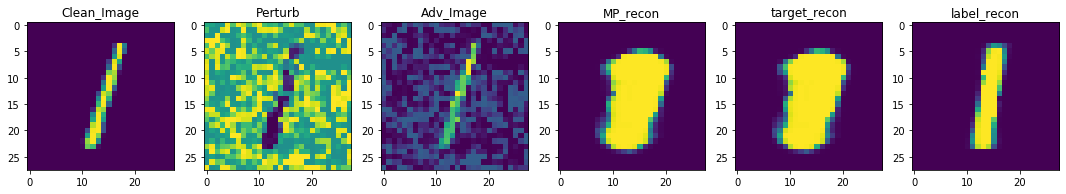

L2_distance: 114.75823974609375 Target:  6 Model_fooled : True : d <= theta False


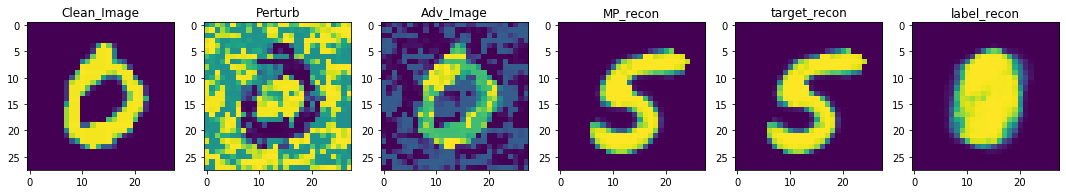

L2_distance: 96.08110046386719 Target:  5 Model_fooled : True : d <= theta False


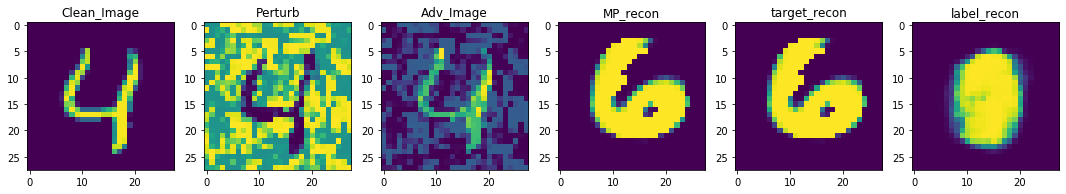

L2_distance: 118.95982360839844 Target:  6 Model_fooled : True : d <= theta False


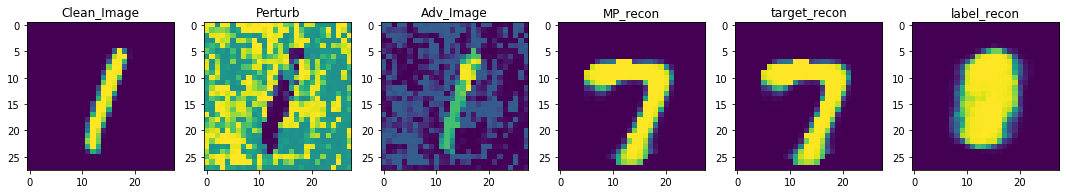

L2_distance: 108.54531860351562 Target:  7 Model_fooled : True : d <= theta False


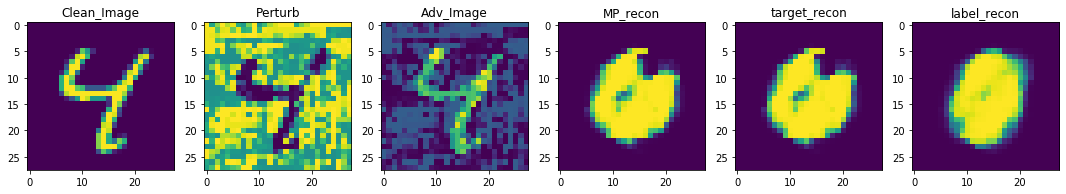

L2_distance: 123.13148498535156 Target:  3 Model_fooled : True : d <= theta False


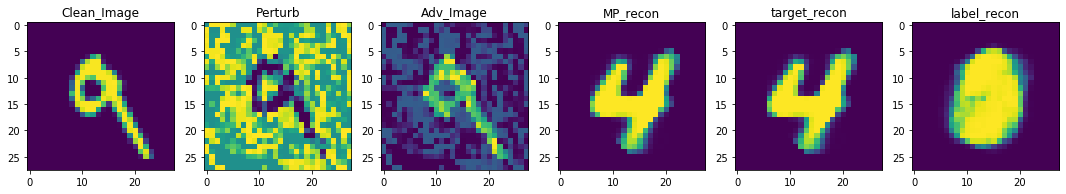

L2_distance: 88.81995391845703 Target:  4 Model_fooled : True : d <= theta False


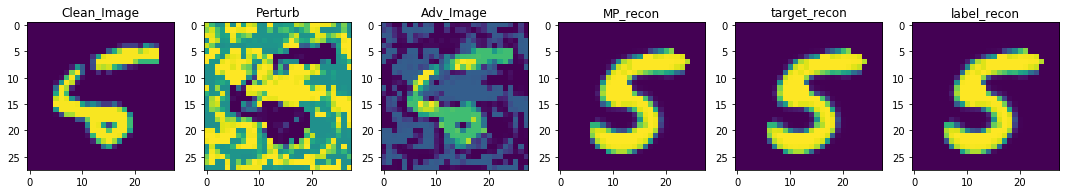

L2_distance: 95.71619415283203 Target:  5 Model_fooled : True : d <= theta False


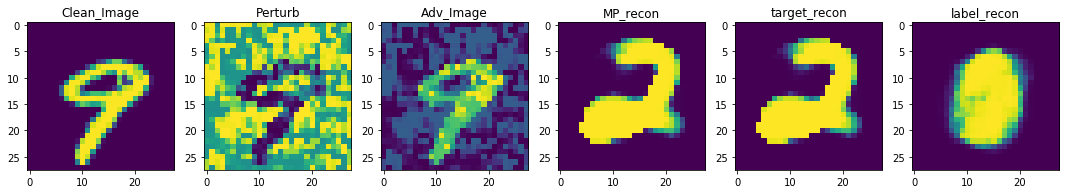

L2_distance: 119.7333984375 Target:  2 Model_fooled : True : d <= theta False


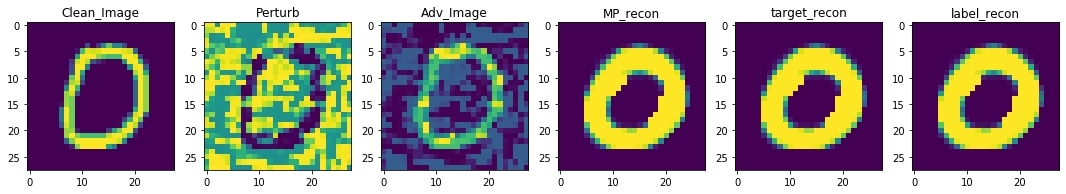

L2_distance: 90.61983489990234 Target:  0 Model_fooled : True : d <= theta False


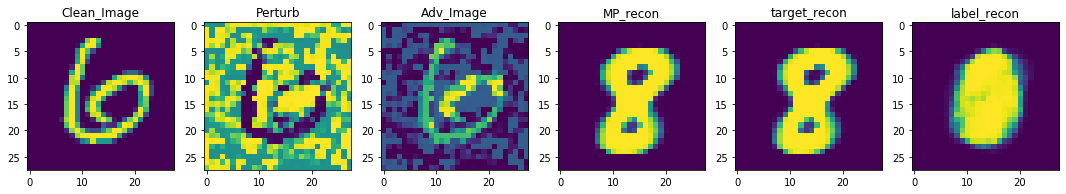

L2_distance: 112.54022216796875 Target:  8 Model_fooled : True : d <= theta False


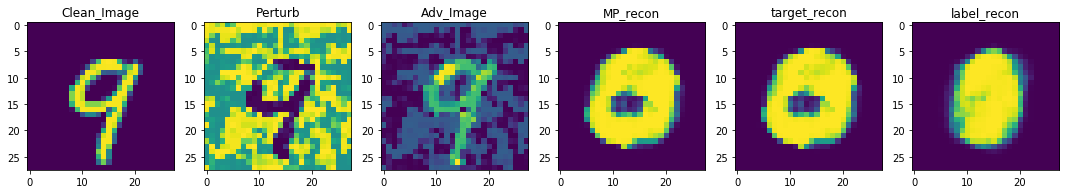

L2_distance: 119.63370513916016 Target:  1 Model_fooled : True : d <= theta False


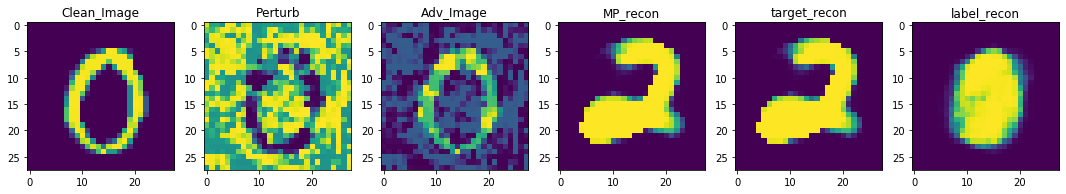

L2_distance: 123.4460220336914 Target:  2 Model_fooled : True : d <= theta False


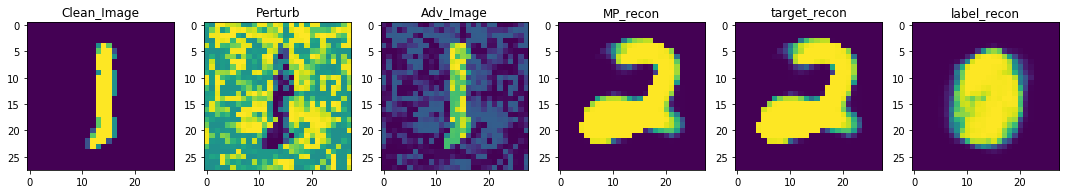

L2_distance: 137.21121215820312 Target:  2 Model_fooled : True : d <= theta False


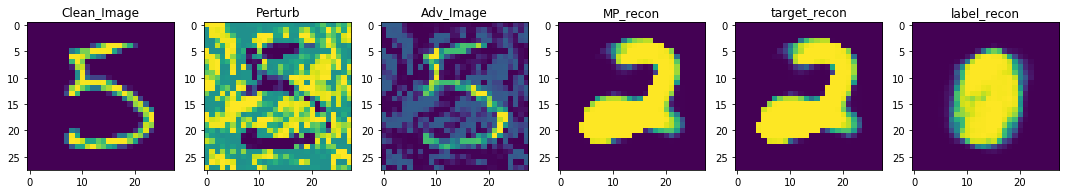

L2_distance: 155.92881774902344 Target:  2 Model_fooled : True : d <= theta False


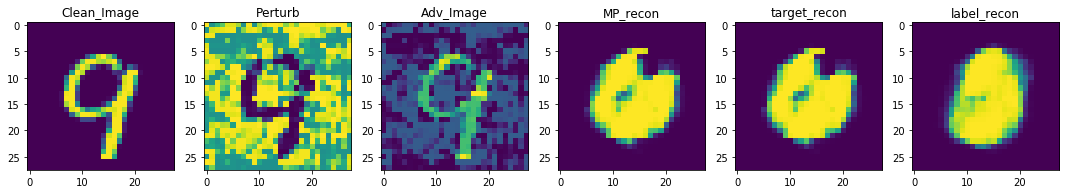

L2_distance: 103.98445892333984 Target:  3 Model_fooled : True : d <= theta False


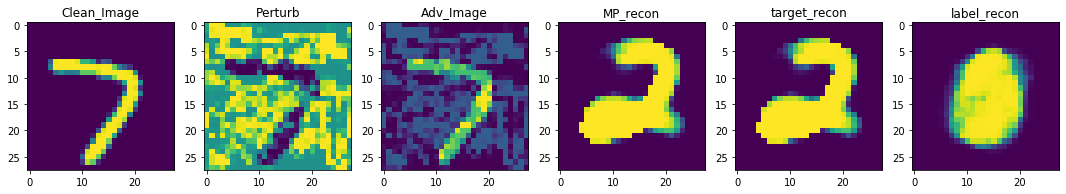

L2_distance: 143.43356323242188 Target:  2 Model_fooled : True : d <= theta False


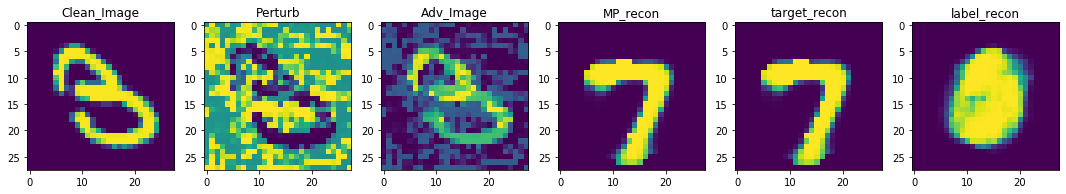

L2_distance: 121.55000305175781 Target:  7 Model_fooled : True : d <= theta False


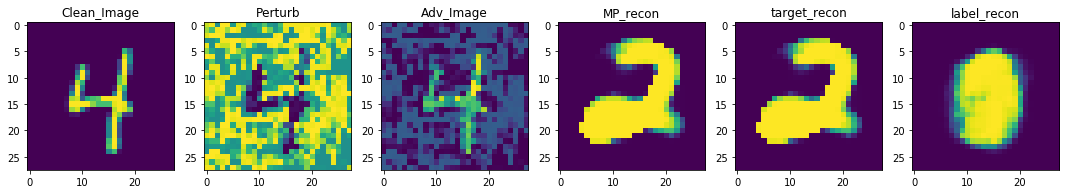

L2_distance: 132.1931610107422 Target:  2 Model_fooled : True : d <= theta False


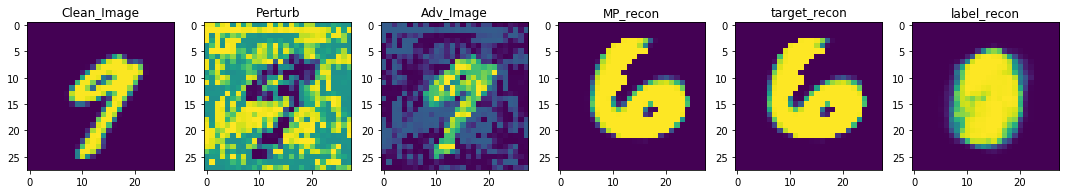

L2_distance: 148.62081909179688 Target:  6 Model_fooled : True : d <= theta False


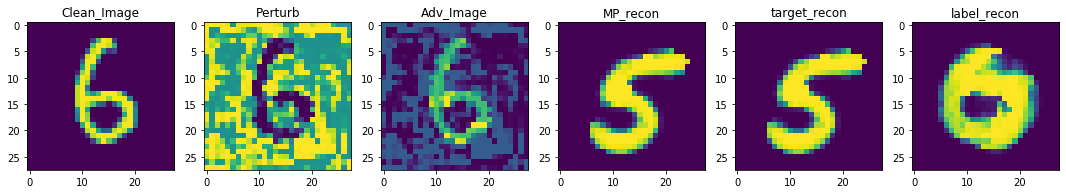

L2_distance: 103.88548278808594 Target:  5 Model_fooled : True : d <= theta False


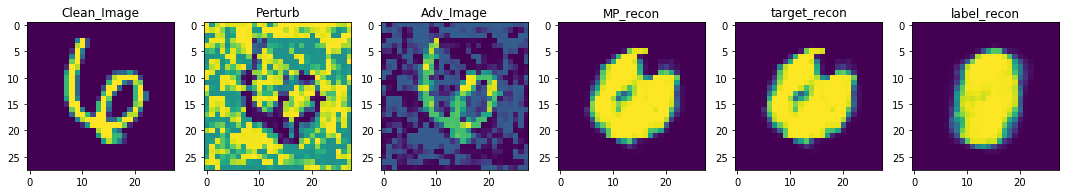

L2_distance: 101.82456970214844 Target:  3 Model_fooled : True : d <= theta False


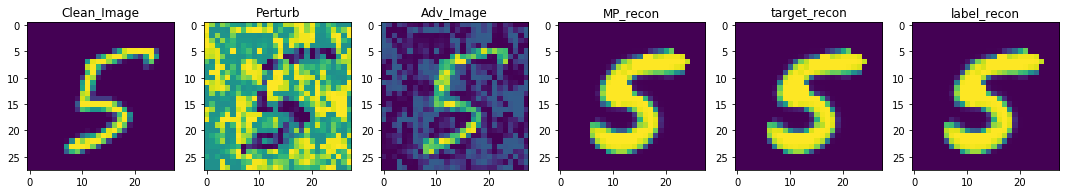

L2_distance: 76.48834991455078 Target:  5 Model_fooled : True : d <= theta False


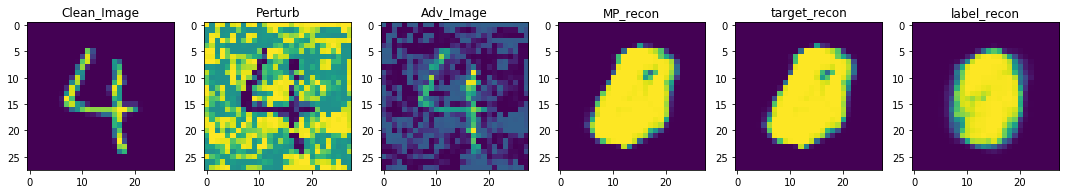

L2_distance: 146.99407958984375 Target:  7 Model_fooled : True : d <= theta False


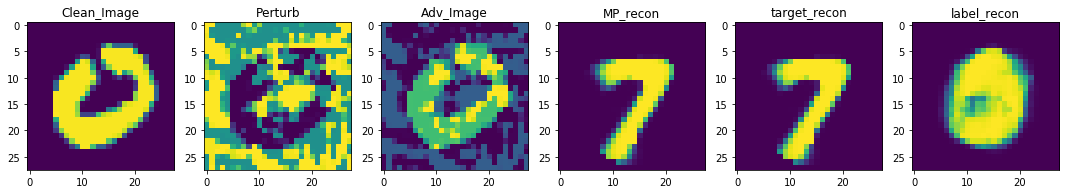

L2_distance: 123.00301361083984 Target:  7 Model_fooled : True : d <= theta False


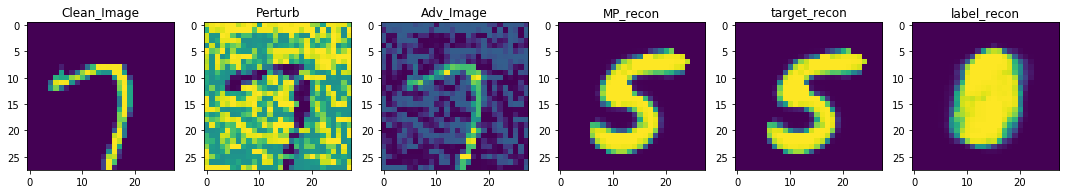

L2_distance: 107.13126373291016 Target:  5 Model_fooled : True : d <= theta False


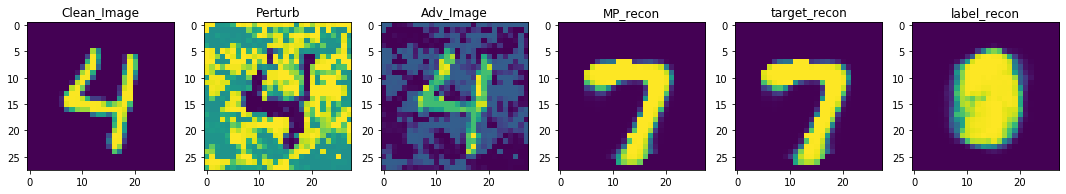

L2_distance: 85.88626098632812 Target:  7 Model_fooled : True : d <= theta False


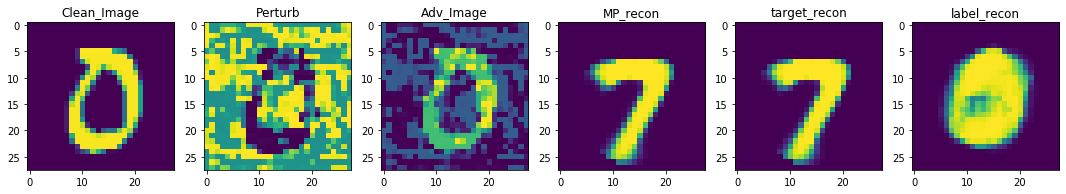

L2_distance: 103.24679565429688 Target:  7 Model_fooled : True : d <= theta False


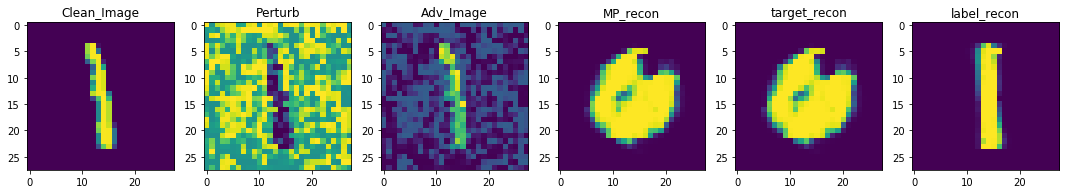

L2_distance: 119.37701416015625 Target:  3 Model_fooled : True : d <= theta False


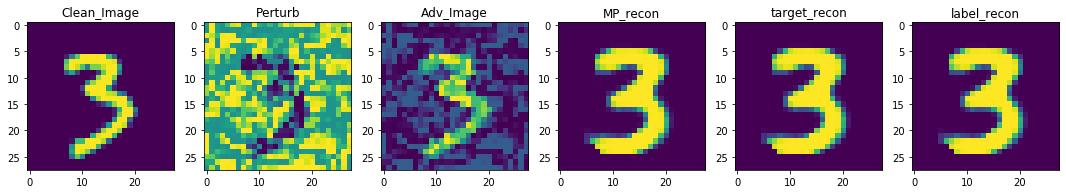

L2_distance: 76.04499816894531 Target:  3 Model_fooled : True : d <= theta False


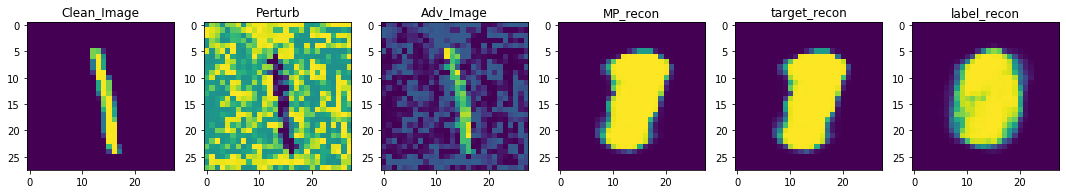








  0%|          | 0/40 [00:00<?, ?it/s]

L2_distance: 113.35183715820312 Target:  6 Model_fooled : True : d <= theta False


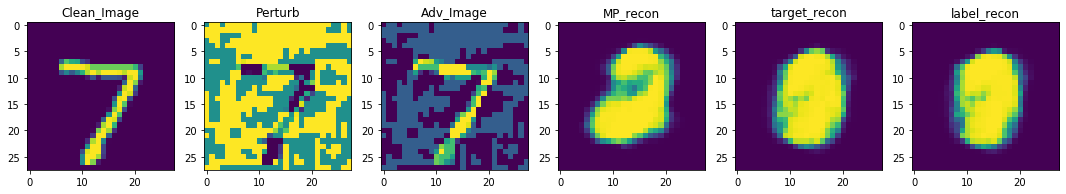

L2_distance: 124.91304779052734 Target:  1 Model_fooled : False : d <= theta False


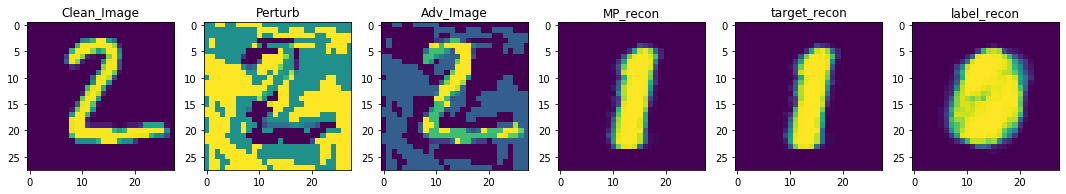

L2_distance: 102.52242279052734 Target:  1 Model_fooled : True : d <= theta False


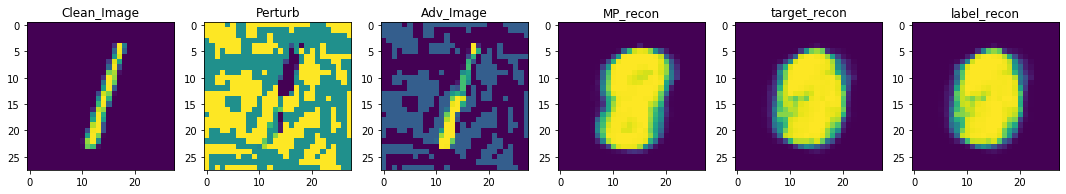

L2_distance: 122.93941497802734 Target:  0 Model_fooled : False : d <= theta False


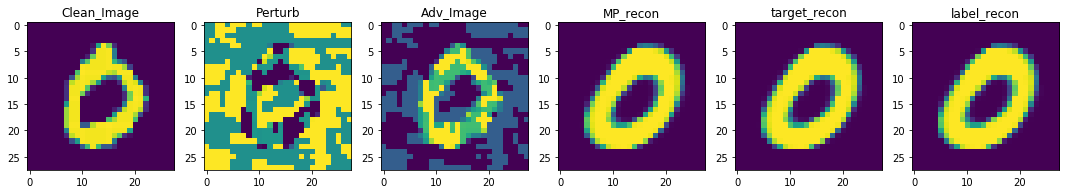

L2_distance: 56.7867317199707 Target:  0 Model_fooled : True : d <= theta False


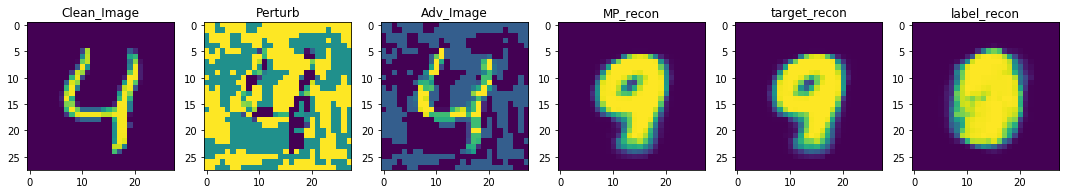

L2_distance: 100.13140106201172 Target:  9 Model_fooled : True : d <= theta False


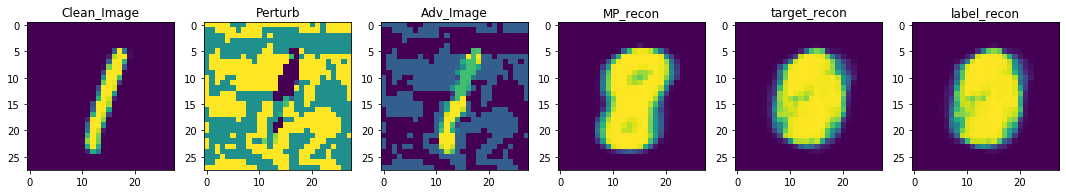

L2_distance: 98.34087371826172 Target:  3 Model_fooled : False : d <= theta False


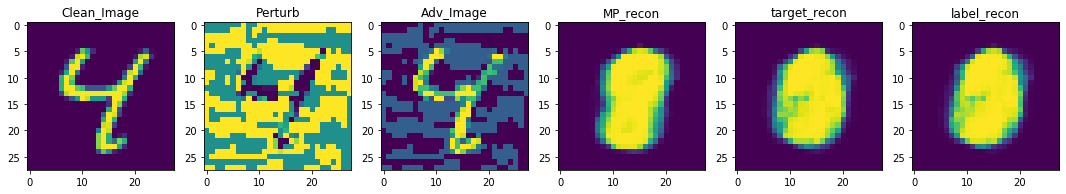

L2_distance: 124.3857650756836 Target:  0 Model_fooled : False : d <= theta False


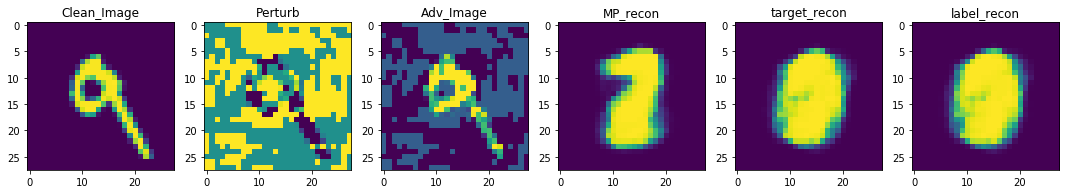

L2_distance: 108.68020629882812 Target:  5 Model_fooled : False : d <= theta False


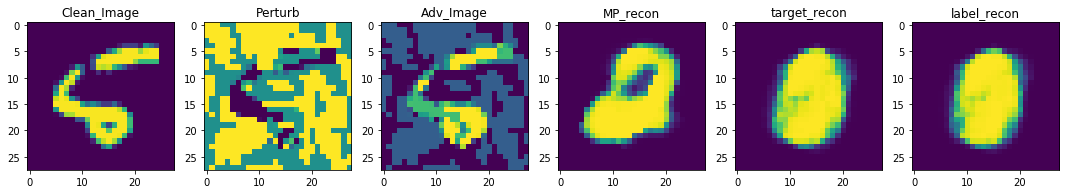

L2_distance: 109.77154541015625 Target:  4 Model_fooled : False : d <= theta False


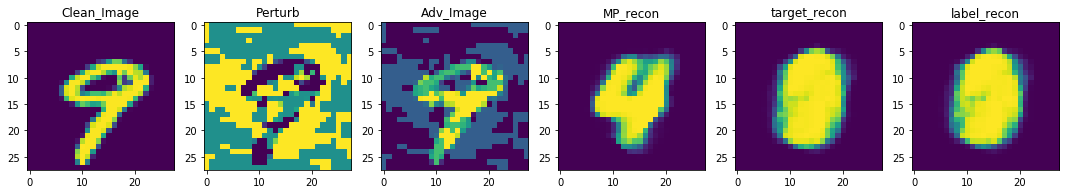

L2_distance: 66.59901428222656 Target:  8 Model_fooled : False : d <= theta False


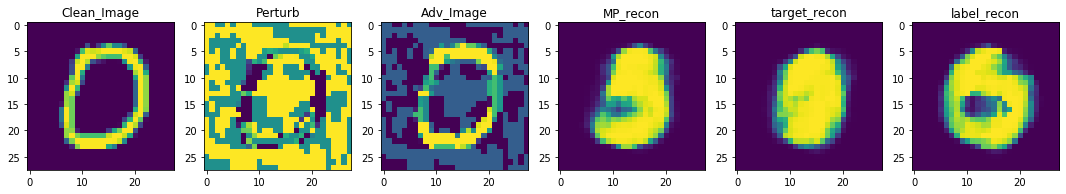

L2_distance: 125.01831817626953 Target:  9 Model_fooled : False : d <= theta False


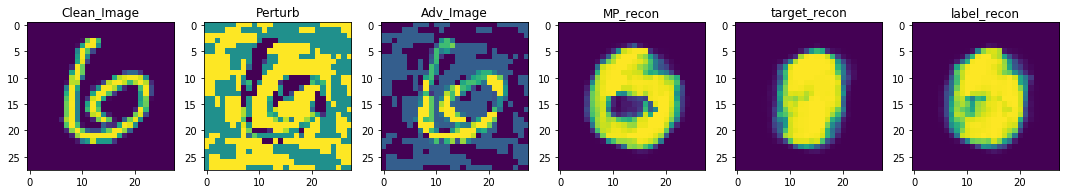

L2_distance: 96.7530517578125 Target:  7 Model_fooled : False : d <= theta False


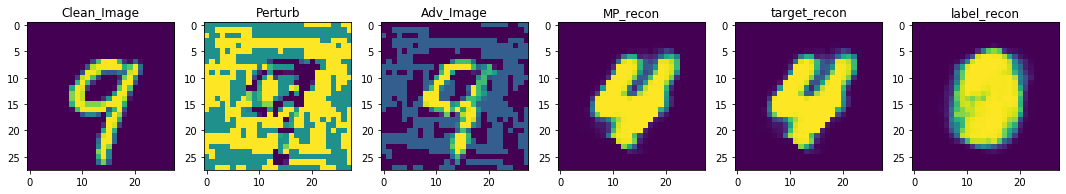

L2_distance: 83.55040740966797 Target:  4 Model_fooled : True : d <= theta False


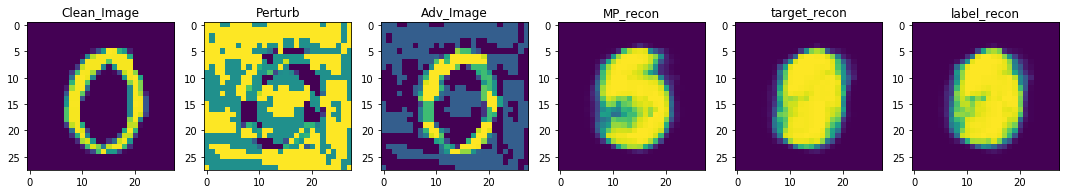

L2_distance: 116.18348693847656 Target:  8 Model_fooled : False : d <= theta False


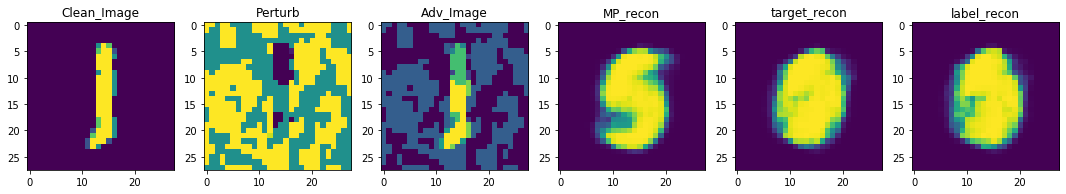

L2_distance: 100.23121643066406 Target:  3 Model_fooled : False : d <= theta False


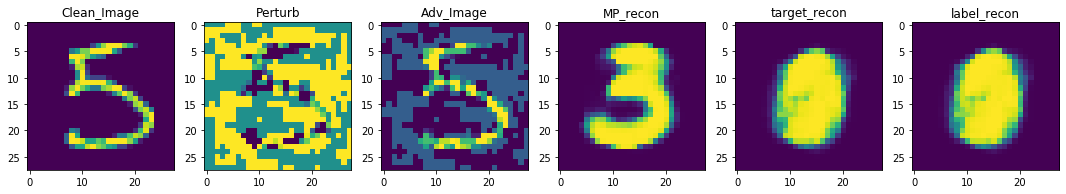

L2_distance: 133.99574279785156 Target:  8 Model_fooled : False : d <= theta False


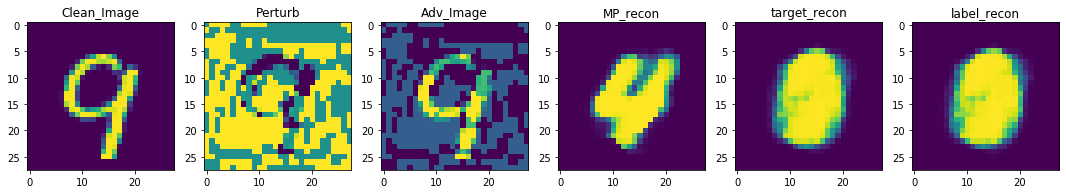

L2_distance: 101.369873046875 Target:  7 Model_fooled : False : d <= theta False


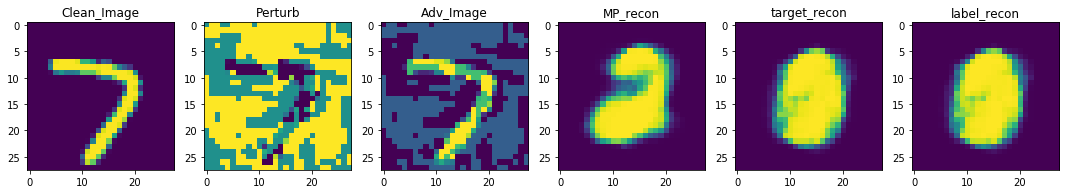

L2_distance: 123.88922119140625 Target:  3 Model_fooled : False : d <= theta False


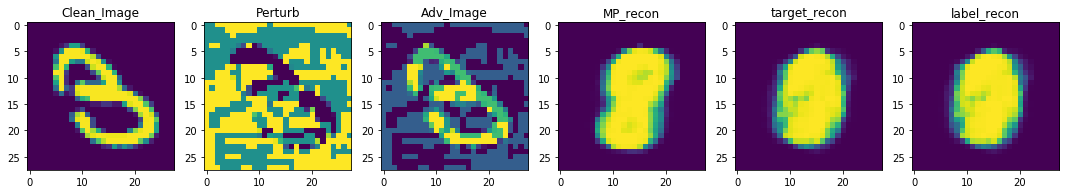

L2_distance: 129.21096801757812 Target:  9 Model_fooled : False : d <= theta False


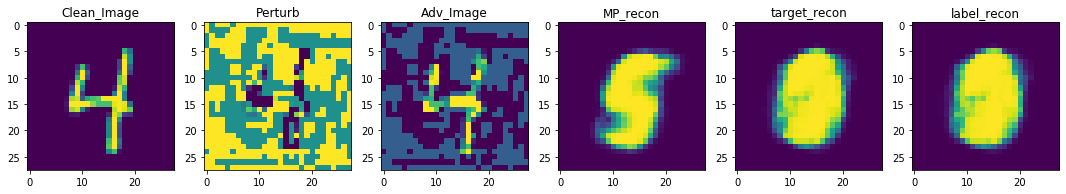

L2_distance: 102.68116760253906 Target:  7 Model_fooled : False : d <= theta False


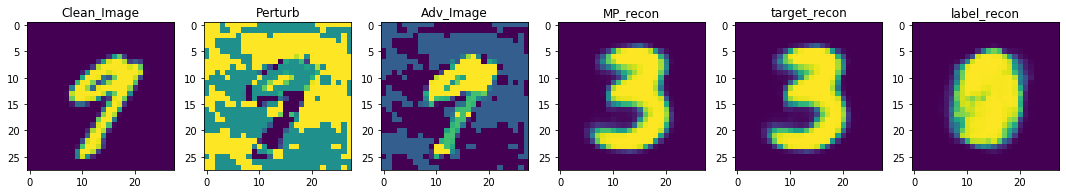

L2_distance: 97.8110580444336 Target:  3 Model_fooled : True : d <= theta False


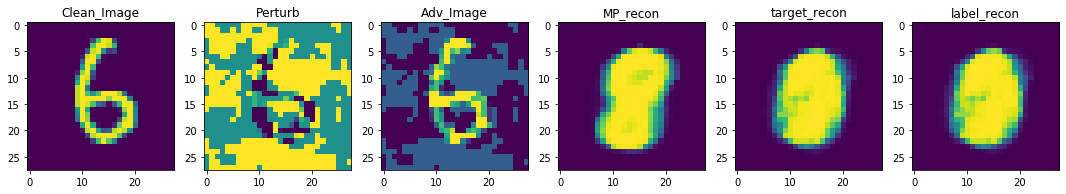

L2_distance: 108.17680358886719 Target:  1 Model_fooled : False : d <= theta False


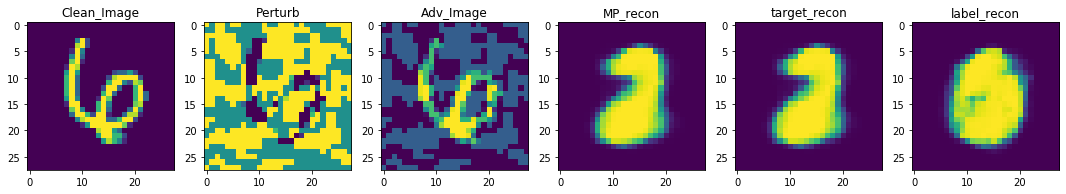

L2_distance: 106.88819122314453 Target:  2 Model_fooled : True : d <= theta False


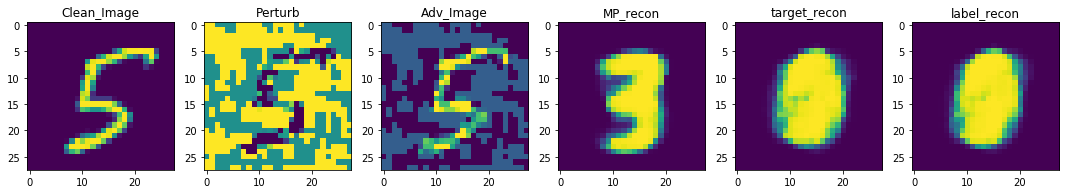

L2_distance: 98.98056030273438 Target:  0 Model_fooled : False : d <= theta False


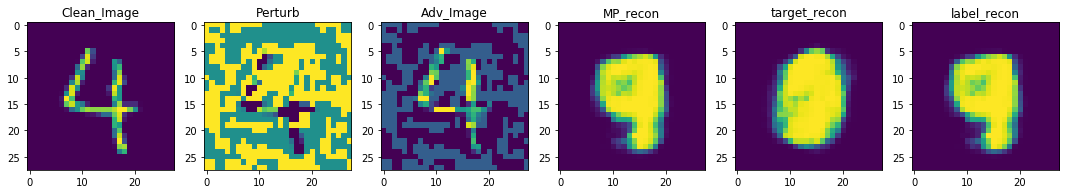

L2_distance: 96.92923736572266 Target:  1 Model_fooled : False : d <= theta False


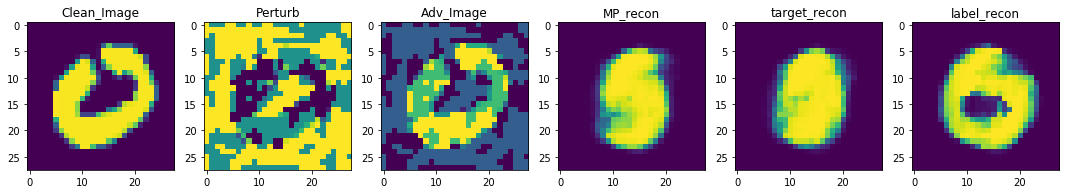

L2_distance: 121.08851623535156 Target:  3 Model_fooled : False : d <= theta False


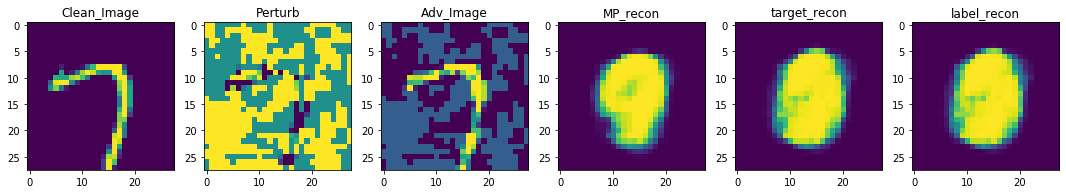

L2_distance: 120.2806167602539 Target:  6 Model_fooled : False : d <= theta False


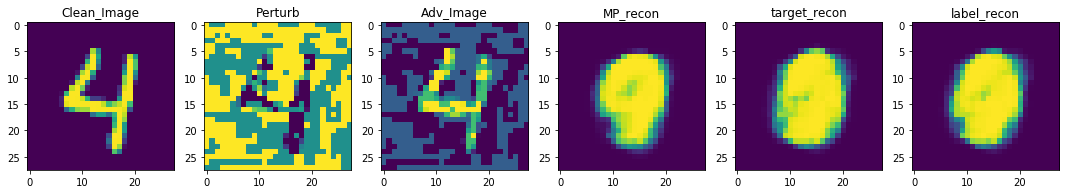

L2_distance: 89.20475769042969 Target:  1 Model_fooled : False : d <= theta False


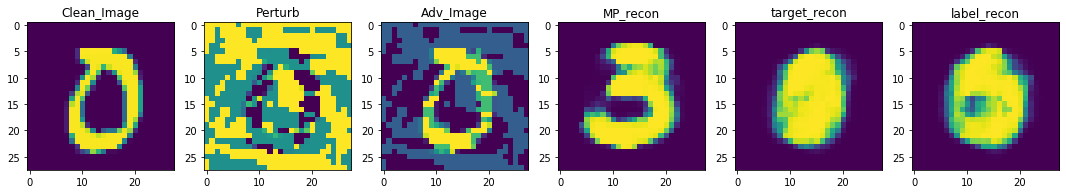

L2_distance: 85.70887756347656 Target:  2 Model_fooled : False : d <= theta False


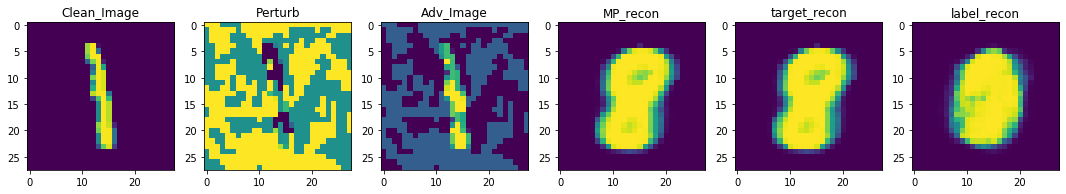

L2_distance: 119.84358215332031 Target:  8 Model_fooled : True : d <= theta False


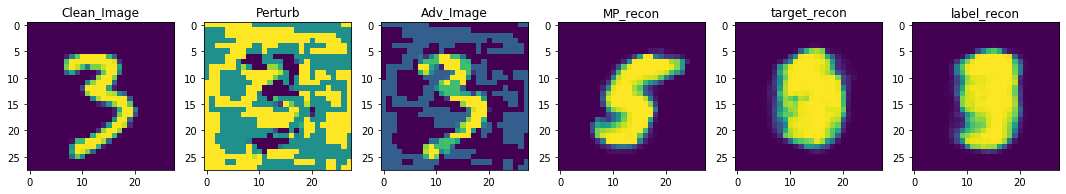

L2_distance: 107.95207214355469 Target:  0 Model_fooled : False : d <= theta False


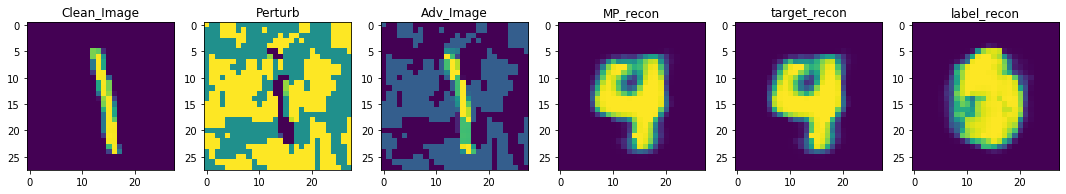









  0%|          | 0/40 [00:00<?, ?it/s]

L2_distance: 92.45931243896484 Target:  4 Model_fooled : True : d <= theta False


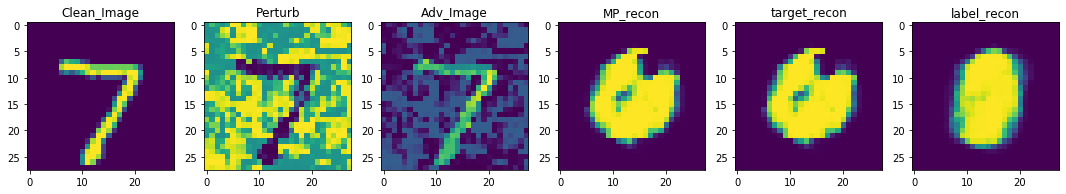

L2_distance: 123.65119171142578 Target:  3 Model_fooled : True : d <= theta False


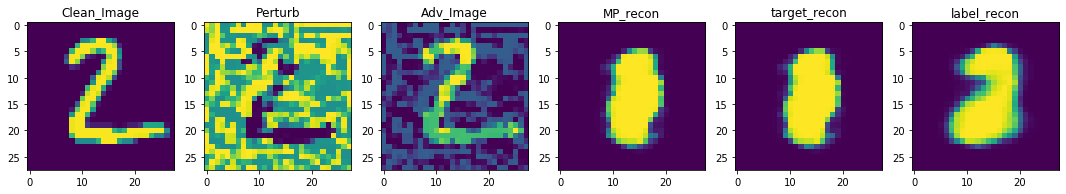

L2_distance: 105.72110748291016 Target:  0 Model_fooled : True : d <= theta False


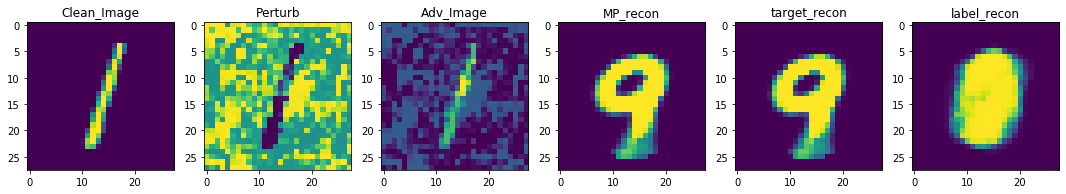

L2_distance: 97.88426208496094 Target:  9 Model_fooled : True : d <= theta False


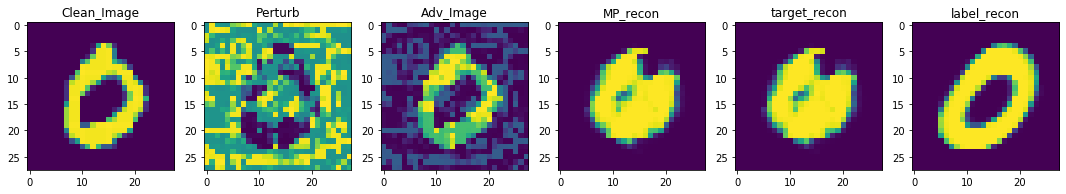

L2_distance: 80.95346069335938 Target:  3 Model_fooled : True : d <= theta False


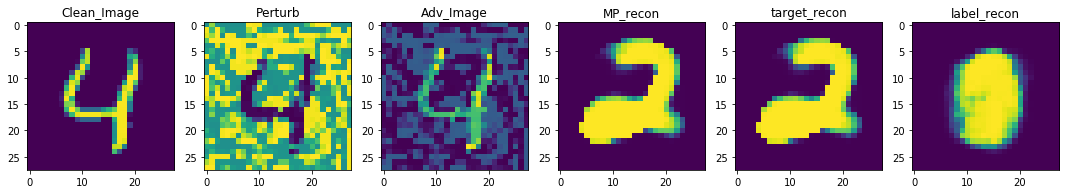

L2_distance: 127.342529296875 Target:  2 Model_fooled : True : d <= theta False


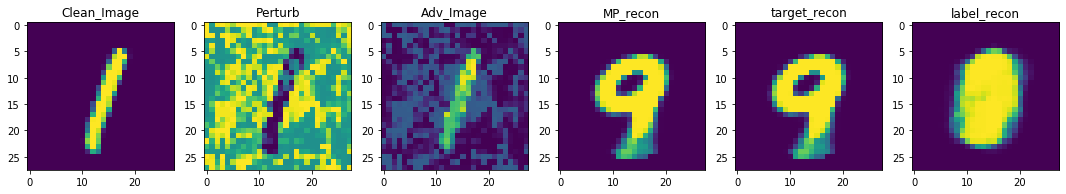

L2_distance: 89.74884796142578 Target:  9 Model_fooled : True : d <= theta False


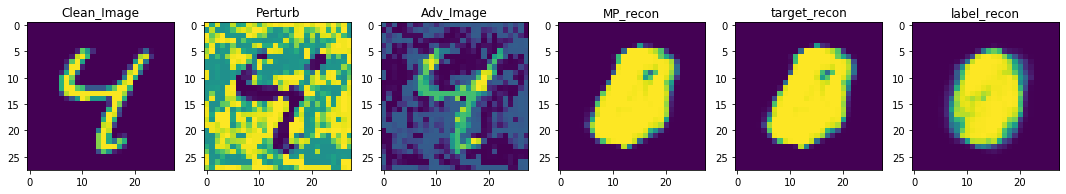

L2_distance: 142.18927001953125 Target:  7 Model_fooled : True : d <= theta False


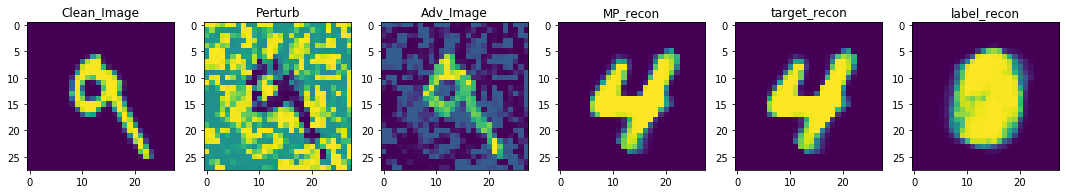

L2_distance: 91.53024291992188 Target:  4 Model_fooled : True : d <= theta False


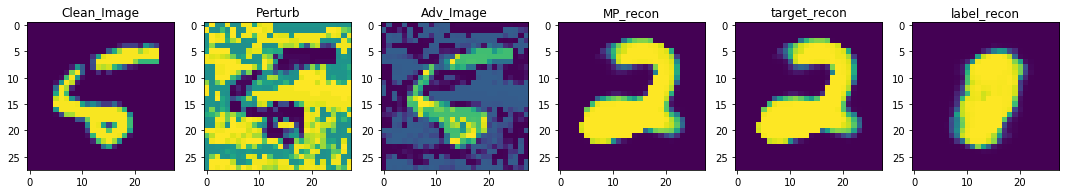

L2_distance: 107.84664154052734 Target:  2 Model_fooled : True : d <= theta False


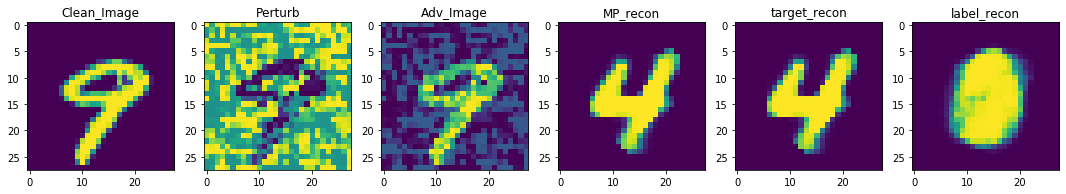

L2_distance: 69.23623657226562 Target:  4 Model_fooled : True : d <= theta False


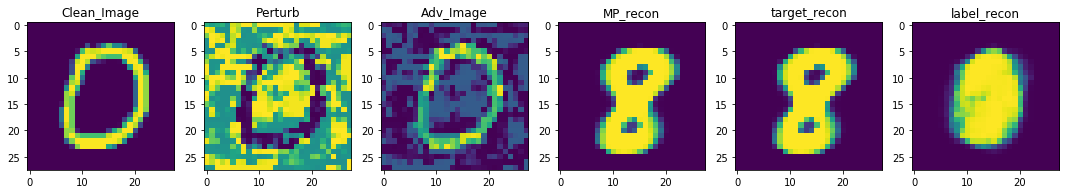

L2_distance: 111.871826171875 Target:  8 Model_fooled : True : d <= theta False


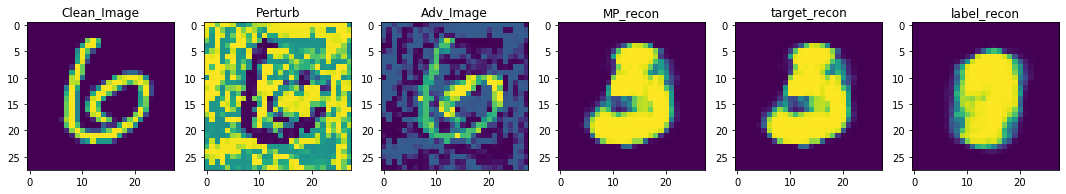

L2_distance: 124.01197052001953 Target:  9 Model_fooled : True : d <= theta False


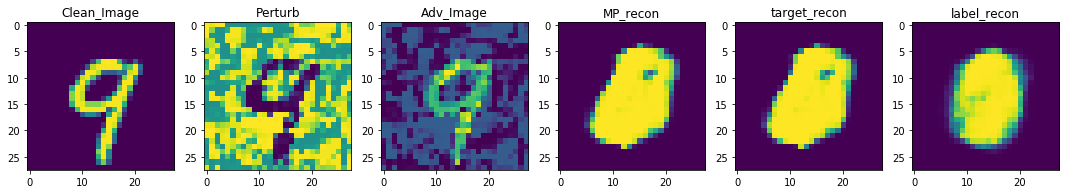

L2_distance: 103.20161437988281 Target:  7 Model_fooled : True : d <= theta False


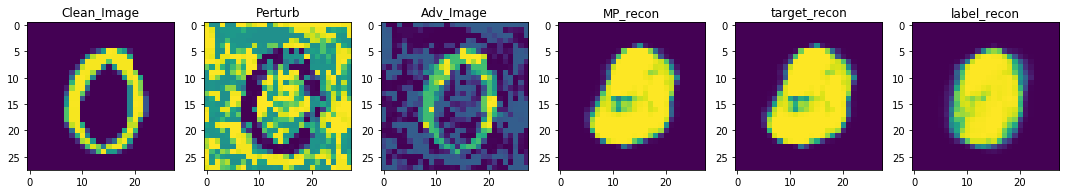

L2_distance: 112.37549591064453 Target:  4 Model_fooled : True : d <= theta False


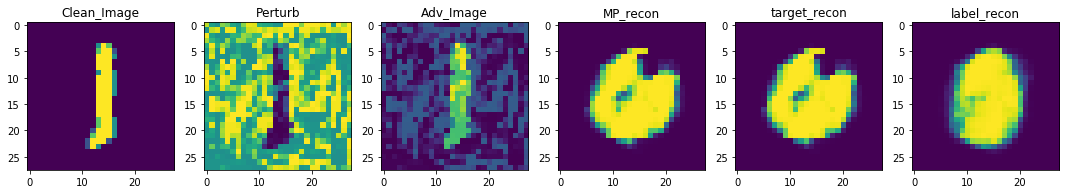

L2_distance: 111.0416259765625 Target:  3 Model_fooled : True : d <= theta False


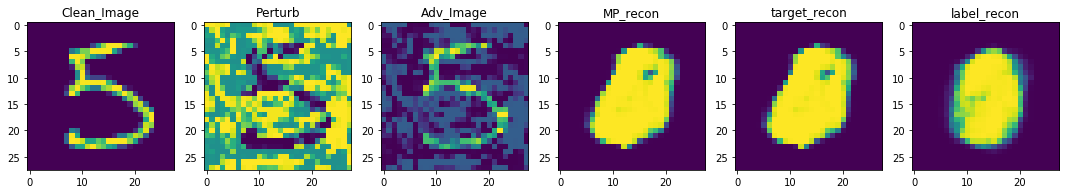

L2_distance: 161.47593688964844 Target:  7 Model_fooled : True : d <= theta False


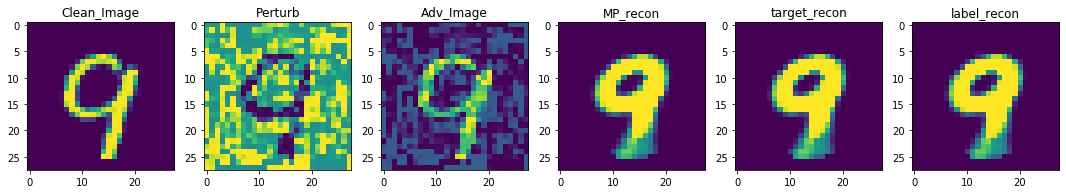

L2_distance: 72.75800323486328 Target:  9 Model_fooled : True : d <= theta False


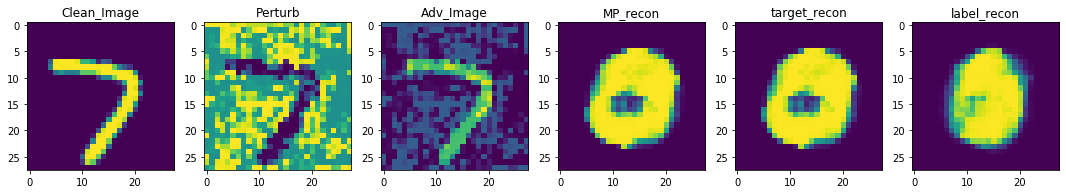

L2_distance: 130.2552032470703 Target:  1 Model_fooled : True : d <= theta False


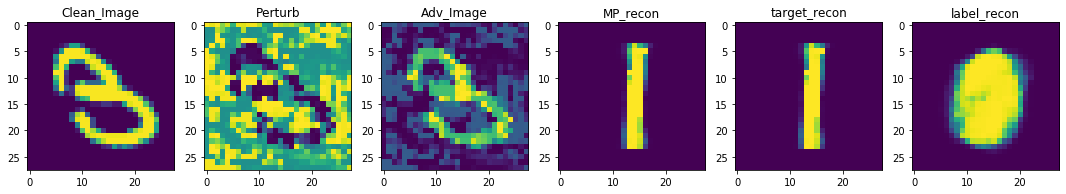

L2_distance: 104.65642547607422 Target:  1 Model_fooled : True : d <= theta False


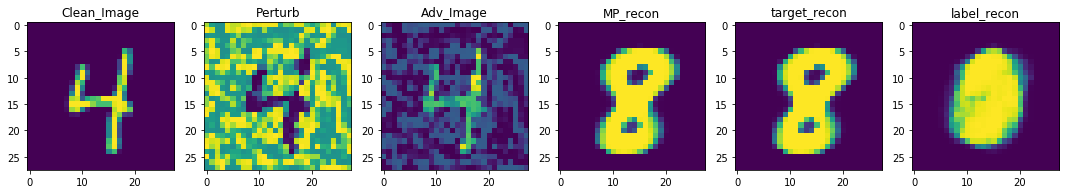

L2_distance: 113.93275451660156 Target:  8 Model_fooled : True : d <= theta False


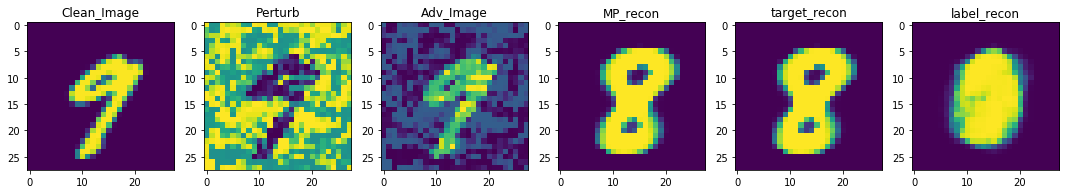

L2_distance: 92.33785247802734 Target:  8 Model_fooled : True : d <= theta False


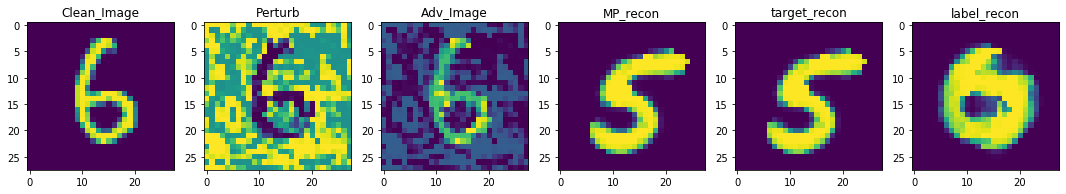

L2_distance: 110.74713134765625 Target:  5 Model_fooled : True : d <= theta False


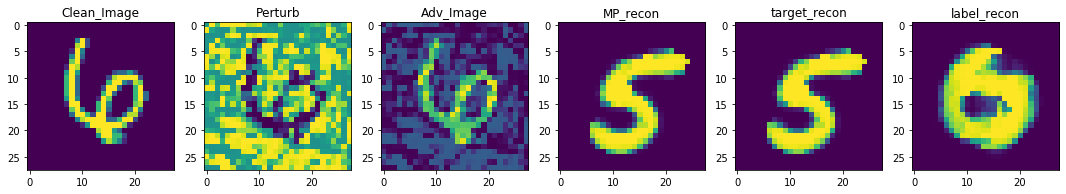

L2_distance: 126.29037475585938 Target:  5 Model_fooled : True : d <= theta False


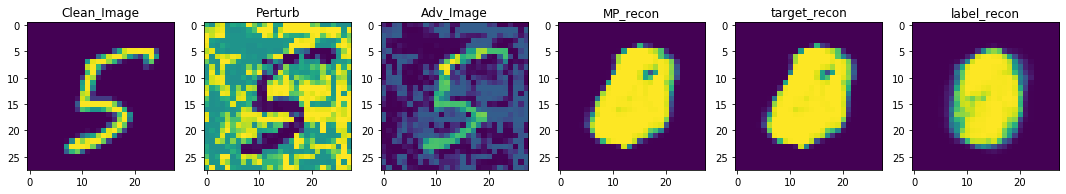

L2_distance: 123.7707748413086 Target:  7 Model_fooled : True : d <= theta False


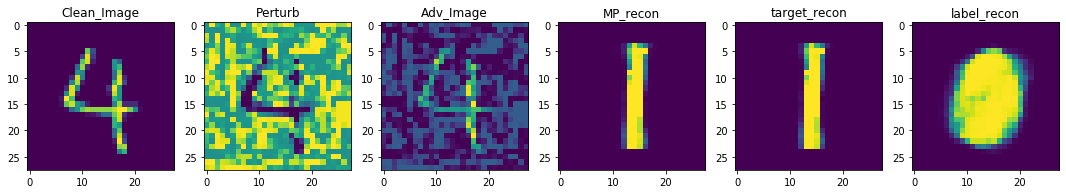

L2_distance: 82.16958618164062 Target:  1 Model_fooled : True : d <= theta False


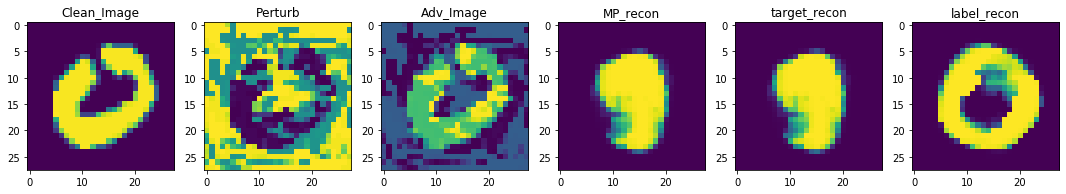

L2_distance: 121.07862854003906 Target:  2 Model_fooled : True : d <= theta False


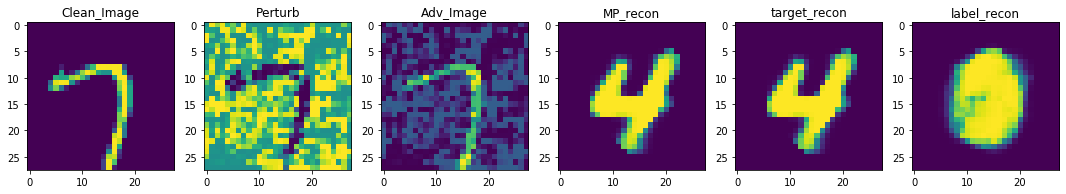

L2_distance: 107.78883361816406 Target:  4 Model_fooled : True : d <= theta False


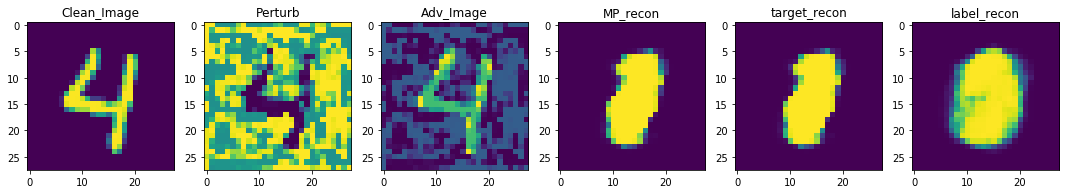

L2_distance: 109.95065307617188 Target:  0 Model_fooled : True : d <= theta False


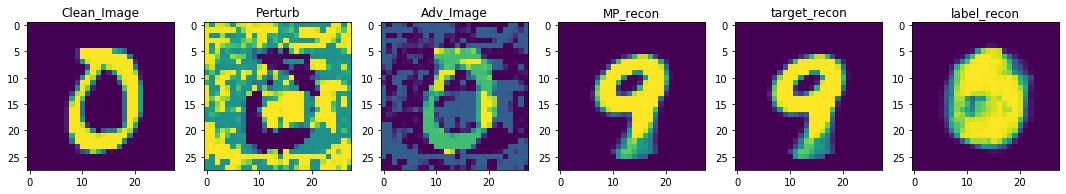

L2_distance: 99.7273178100586 Target:  9 Model_fooled : True : d <= theta False


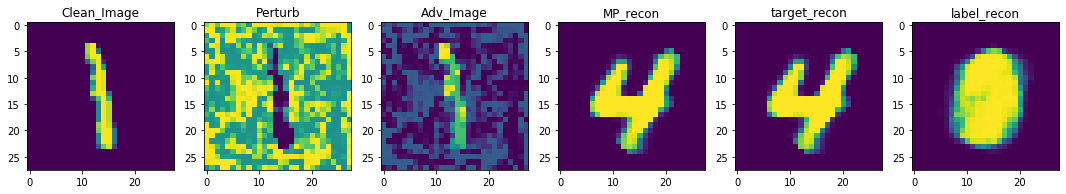

L2_distance: 102.28054809570312 Target:  4 Model_fooled : True : d <= theta False


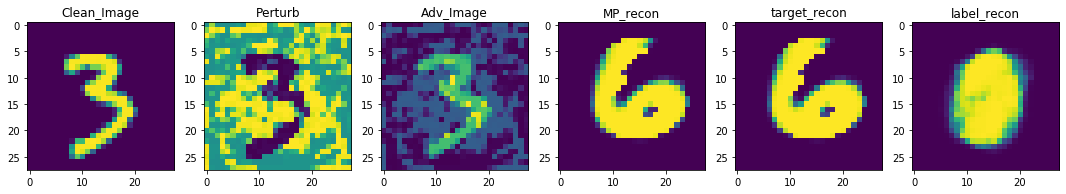

L2_distance: 117.46470642089844 Target:  6 Model_fooled : True : d <= theta False


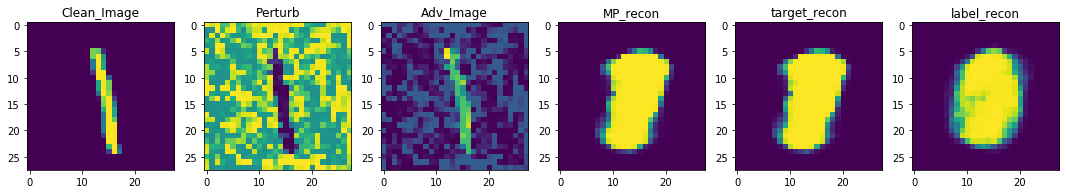

L2_distance: 113.16265106201172 Target:  6 Model_fooled : True : d <= theta False


In [13]:
model_for_adversary = Model_for_Adversary(net)

linf_eps = 0.3
fgsm_step = 0.05
bim_pgd_step = 0.01

adversary_dict = {}
adversary_dict['Clean'] = CleanAttack(clip_min=-0.4242, clip_max=2.8215)
adversary_dict['PGD'] = LinfPGDAttack(
    model_for_adversary, loss_fn=nn.CrossEntropyLoss(reduction="sum"), eps=(linf_eps/0.3081),
    nb_iter=1000, eps_iter=(bim_pgd_step/0.3081), rand_init=True, clip_min=-0.4242, clip_max=2.8215,
    targeted=True)

adversary_dict['FGSM'] = GradientSignAttack(model_for_adversary, loss_fn=nn.CrossEntropyLoss(reduction="sum"), eps=(linf_eps/0.3081), clip_min=-0.4242, clip_max=2.8215, targeted=True)
adversary_dict['BIM'] = LinfBasicIterativeAttack(model_for_adversary, loss_fn=nn.CrossEntropyLoss(reduction="sum"), eps=(linf_eps/0.3081), nb_iter=1000, eps_iter=(bim_pgd_step/0.3081), clip_min=-0.4242, clip_max=2.8215, targeted=True)
# adversary_dict['CW'] = CarliniWagnerL2Attack(model_for_adversary, num_classes=args['num_classes'], confidence=0, targeted=False, learning_rate=0.01, binary_search_steps=9, max_iterations=1000, abort_early=True, initial_const=0.001, clip_min=-0.4242, clip_max=2.8215, loss_fn=None)

WhiteBox_Attacks_Targeted(net, dataloader['val'], adversary_dict, args, 44)